In [51]:
import pandas as pd
import os


In [52]:
df_pbp_2023 = pd.DataFrame()
root = '/Users/jamiewerther/Desktop/2023Hoops/2022-23/pbp_logs'
for subdir, dirs, files in os.walk(root):
    for file in files:
        # check if the file is a CSV file
        if file.endswith('.csv'):
            # read the CSV file into a DataFrame
            filepath = os.path.join(subdir, file)
            csv_df = pd.read_csv(filepath)
            
            # concatenate the DataFrame to the combined DataFrame
            df_pbp_2023 = pd.concat([df_pbp_2023, csv_df], ignore_index=True)

In [90]:
teams_h = df_pbp_2023['home'].to_list()
teams_a = df_pbp_2023['away'].to_list()
teams = set(teams_h)
teams = set(teams_a)
print(len(teams))
team_rpg = {team: [0,0,0]  for team in teams}


707


In [91]:

def analyze_game(game_id):
    df_game = df_pbp_2023[df_pbp_2023.game_id == game_id]
    #only analyze plays with made shots
    df_game = df_game[df_game.shot_outcome == 'made']
    if len(df_game) > 0:
        #identify teams, establish point_differential column
        homename = df_game.iloc[0].home
        awayname = df_game.iloc[0].away
        team_rpg[homename][0] += 1
        team_rpg[awayname][0] += 1
            
        
        #sliding window approach to calculate runs
        #a run is defined as a gain of at least 10 in point differential over a 3 minute span
        window_size = 180
        last_run = None
        interval_data = pd.DataFrame(columns=['start_time', 'end_time', 'point_differential'])

        # iterate over all possible 3min windows
        for start_time in df_game['secs_remaining_absolute']:
            end_time = start_time - window_size

            # filter for the rows within the current window
            window = df_game[(df_game['secs_remaining_absolute'] <= start_time) & (df_game['secs_remaining_absolute'] > end_time)]

            # calculate the point differential at the start and end of the window
            start_diff = window.iloc[0]['score_diff']
            end_diff = window.iloc[-1]['score_diff']
            run_size = end_diff - start_diff

            # check if the point differential is 10 or more
            #prevent overlap by making sure the current run is sufficiently spaced from the last
            if abs(run_size) >= 10 and (last_run is None or abs(start_time - last_run) > 180):
                team_name = ''
                if run_size < 0:
                    team_name = awayname
                    team_rpg[awayname][1] += 1
                    team_rpg[homename][2] += 1
                else:
                    team_name = homename
                    team_rpg[homename][1] += 1
                    team_rpg[awayname][2] += 1
                    
                interval_data = interval_data.append({
                    'team_name': team_name,
                    'start_time': start_time/60,
                    'end_time': end_time/60,
                    'point_differential': abs(run_size)
                }, ignore_index=True)
                last_run = start_time


        for _, row in interval_data.iterrows():
            print(f"{row['team_name']} run from {row['start_time']} to {row['end_time']} with a point differential of {row['point_differential']}")

In [66]:
# root = '/Users/jamiewerther/Desktop/2023Hoops/2022-23/pbp_logs'
# df_demo = pd.read_csv(f"{root}/2022-11-07/401482889.csv")

# print(df_demo.head(5))

     game_id        date            home     away  play_id  half  \
0  401482889  2022-11-07  Boston College  Cornell        1     1   
1  401482889  2022-11-07  Boston College  Cornell        2     1   
2  401482889  2022-11-07  Boston College  Cornell        3     1   
3  401482889  2022-11-07  Boston College  Cornell        4     1   
4  401482889  2022-11-07  Boston College  Cornell        5     1   

  time_remaining_half  secs_remaining  secs_remaining_absolute  \
0               19:49            2389                     2389   
1               19:45            2385                     2385   
2               19:38            2378                     2378   
3               19:38            2378                     2378   
4               19:33            2373                     2373   

                                         description  ... shot_y  \
0           Prince Aligbe missed Three Point Jumper.  ...    NaN   
1                      Greg Dolan Defensive Rebound.  ... 

In [73]:
#analyze_game(401482889)
# print(team_rpg)


Boston College run from 4.75 to 1.75 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/3065580281.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


In [93]:
team_rpg = {team: [0,0,0]  for team in teams}
games = df_pbp_2023['game_id'].dropna()
games = games.to_list()
games = set(games)
print(len(games))

idx = 0
for game in games:
    game = int(game)
    analyze_game(game)



5881


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Buffalo run from 38.53333333333333 to 35.53333333333333 with a point differential of 10.0
Akron run from 31.566666666666666 to 28.566666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Toledo run from 6.85 to 3.85 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Akron run from 26.733333333333334 to 23.733333333333334 with a point differential of 10.0
Toledo run from 19.483333333333334 to 16.483333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Ball State run from 38.333333333333336 to 35.333333333333336 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Kent State run from 8.916666666666666 to 5.916666666666667 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Toledo run from 26.133333333333333 to 23.133333333333333 with a point differential of 10.0
Bowling Green run from 13.466666666666667 to 10.466666666666667 with a point differential of 10.0
Kent State run from 10.133333333333333 to 7.133333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Buffalo run from 15.116666666666667 to 12.116666666666667 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Ohio run from 14.95 to 11.95 with a point differential of 10.0
Akron run from 3.5833333333333335 to 0.5833333333333334 with a point differential of 11.0
Kent State run from 30.883333333333333 to 27.883333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bowling Green run from 13.083333333333334 to 10.083333333333334 with a point differential of 12.0
Central Michigan run from 4.966666666666667 to 1.9666666666666666 with a point differential of 10.0
Ball State run from 22.383333333333333 to 19.383333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Akron run from 7.283333333333333 to 4.283333333333333 with a point differential of 11.0
Central Michigan run from 38.75 to 35.75 with a point differential of 11.0
Ohio run from 30.45 to 27.45 with a point differential of 10.0
Ohio run from 15.616666666666667 to 12.616666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Western Michigan run from 26.883333333333333 to 23.883333333333333 with a point differential of 10.0
Kent State run from 25.883333333333333 to 22.883333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Ball State run from 20.116666666666667 to 17.116666666666667 with a point differential of 10.0
Buffalo run from 25.666666666666668 to 22.666666666666668 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Toledo run from 18.483333333333334 to 15.483333333333333 with a point differential of 10.0
Akron run from 5.5 to 2.5 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Miami (OH) run from 3.5 to 0.5 with a point differential of 10.0
Kent State run from 26.933333333333334 to 23.933333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Toledo run from 8.216666666666667 to 5.216666666666667 with a point differential of 10.0
Ohio run from 26.25 to 23.25 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Grand Canyon run from 21.066666666666666 to 18.066666666666666 with a point differential of 10.0
Southern Utah run from 30.8 to 27.8 with a point differential of 10.0
Southern Utah run from 24.566666666666666 to 21.566666666666666 with a point differential of 10.0
Southern Utah run from 12.733333333333333 to 9.733333333333333 with a point differential of 11.0
Southern Utah run from 9.233333333333333 to 6.233333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


San Diego run from 28.85 to 25.85 with a point differential of 10.0
San Diego run from 23.033333333333335 to 20.033333333333335 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Nicholls run from 28.233333333333334 to 25.233333333333334 with a point differential of 12.0
Nicholls run from 24.783333333333335 to 21.783333333333335 with a point differential of 11.0
Trinity Baptist College run from 7.5 to 4.5 with a point differential of 10.0
Alabama State run from 39.71666666666667 to 36.71666666666667 with a point differential of 13.0
Lane College run from 21.916666666666668 to 18.916666666666668 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Furman run from 6.683333333333334 to 3.683333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Furman run from 30.316666666666666 to 27.316666666666666 with a point differential of 11.0
Chattanooga run from 22.116666666666667 to 19.116666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


The Citadel run from 10.083333333333334 to 7.083333333333333 with a point differential of 10.0
UNC Greensboro run from 13.05 to 10.05 with a point differential of 10.0
East Tennessee State run from 35.05 to 32.05 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Illinois run from 8.6 to 5.6 with a point differential of 11.0
Illinois run from 3.3666666666666667 to 0.36666666666666664 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Notre Dame run from 27.416666666666668 to 24.416666666666668 with a point differential of 10.0
Marquette run from 36.11666666666667 to 33.11666666666667 with a point differential of 12.0
Marquette run from 29.666666666666668 to 26.666666666666668 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas Tech run from 27.85 to 24.85 with a point differential of 10.0
Georgetown run from 10.85 to 7.85 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UConn run from 27.45 to 24.45 with a point differential of 11.0
Kansas run from 14.166666666666666 to 11.166666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Penn State run from 7.883333333333334 to 4.883333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Arkansas run from 24.216666666666665 to 21.216666666666665 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas Tech run from 34.78333333333333 to 31.783333333333335 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Furman run from 23.8 to 20.8 with a point differential of 11.0
VMI run from 2.75 to -0.25 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Chattanooga run from 14.366666666666667 to 11.366666666666667 with a point differential of 10.0
Furman run from 38.15 to 35.15 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Samford run from 13.6 to 10.6 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Samford run from 21.983333333333334 to 18.983333333333334 with a point differential of 10.0
VMI run from 36.4 to 33.4 with a point differential of 10.0
UNC Greensboro run from 30.5 to 27.5 with a point differential of 10.0
The Citadel run from 5.616666666666666 to 2.6166666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

The Citadel run from 10.583333333333334 to 7.583333333333333 with a point differential of 10.0
Chattanooga run from 32.1 to 29.1 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Furman run from 35.016666666666666 to 32.016666666666666 with a point differential of 14.0
Wofford run from 20.5 to 17.5 with a point differential of 10.0
Furman run from 10.916666666666666 to 7.916666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Samford run from 25.8 to 22.8 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Furman run from 39.233333333333334 to 36.233333333333334 with a point differential of 11.0
East Tennessee State run from 39.166666666666664 to 36.166666666666664 with a point differential of 10.0
Chattanooga run from 13.2 to 10.2 with a point differential of 10.0
Furman run from 10.083333333333334 to 7.083333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Samford run from 31.05 to 28.05 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Chattanooga run from 15.516666666666667 to 12.516666666666667 with a point differential of 11.0
Furman run from 26.233333333333334 to 23.233333333333334 with a point differential of 12.0
Furman run from 22.966666666666665 to 19.966666666666665 with a point differential of 11.0
UNC Greensboro run from 33.55 to 30.55 with a point differential of 11.0
UNC Greensboro run from 29.933333333333334 to 26.933333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Samford run from 15.65 to 12.65 with a point differential of 11.0
Western Carolina run from 14.6 to 11.6 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Furman run from 39.06666666666667 to 36.06666666666667 with a point differential of 11.0
Furman run from 18.533333333333335 to 15.533333333333333 with a point differential of 10.0
Chattanooga run from 17.8 to 14.8 with a point differential of 12.0
Samford run from 31.933333333333334 to 28.933333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UNC Greensboro run from 13.483333333333333 to 10.483333333333333 with a point differential of 10.0
Samford run from 7.333333333333333 to 4.333333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Western Carolina run from 10.75 to 7.75 with a point differential of 10.0
Chattanooga run from 28.983333333333334 to 25.983333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


East Tennessee State run from 9.833333333333334 to 6.833333333333333 with a point differential of 10.0
The Citadel run from 4.65 to 1.65 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Furman run from 35.06666666666667 to 32.06666666666667 with a point differential of 10.0
Western Carolina run from 22.15 to 19.15 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Gardner-Webb run from 38.083333333333336 to 35.083333333333336 with a point differential of 11.0
Longwood run from 3.033333333333333 to 0.03333333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Longwood run from 32.983333333333334 to 29.983333333333334 with a point differential of 10.0
Gardner-Webb run from 35.666666666666664 to 32.666666666666664 with a point differential of 12.0
High Point run from 13.216666666666667 to 10.216666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Presbyterian run from 2.8833333333333333 to -0.11666666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Winthrop run from 25.3 to 22.3 with a point differential of 11.0
Charleston Southern run from 38.81666666666667 to 35.81666666666667 with a point differential of 10.0
Charleston Southern run from 30.383333333333333 to 27.383333333333333 with a point differential of 13.0
Charleston Southern run from 11.6 to 8.6 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Winthrop run from 18.733333333333334 to 15.733333333333333 with a point differential of 10.0
High Point run from 11.966666666666667 to 8.966666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Radford run from 12.766666666666667 to 9.766666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Gardner-Webb run from 20.316666666666666 to 17.316666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UNC Asheville run from 28.35 to 25.35 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UNC Asheville run from 34.61666666666667 to 31.616666666666667 with a point differential of 10.0
Longwood run from 35.46666666666667 to 32.46666666666667 with a point differential of 10.0
Winthrop run from 19.066666666666666 to 16.066666666666666 with a point differential of 10.0
Radford run from 25.266666666666666 to 22.266666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Charleston Southern run from 16.15 to 13.15 with a point differential of 10.0
Gardner-Webb run from 19.233333333333334 to 16.233333333333334 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UNC Asheville run from 16.216666666666665 to 13.216666666666667 with a point differential of 10.0
Winthrop run from 9.4 to 6.4 with a point differential of 10.0
Radford run from 19.4 to 16.4 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Presbyterian run from 22.783333333333335 to 19.783333333333335 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


High Point run from 33.733333333333334 to 30.733333333333334 with a point differential of 10.0
High Point run from 20.433333333333334 to 17.433333333333334 with a point differential of 10.0
Campbell run from 36.35 to 33.35 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Charleston Southern run from 35.483333333333334 to 32.483333333333334 with a point differential of 10.0
Longwood run from 29.083333333333332 to 26.083333333333332 with a point differential of 11.0
Radford run from 30.516666666666666 to 27.516666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


South Carolina Upstate run from 17.966666666666665 to 14.966666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Winthrop run from 33.43333333333333 to 30.433333333333334 with a point differential of 11.0
UNC Asheville run from 19.566666666666666 to 16.566666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Southern Utah run from 29.9 to 26.9 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


New Mexico State run from 22.516666666666666 to 19.516666666666666 with a point differential of 11.0
California Baptist run from 5.783333333333333 to 2.783333333333333 with a point differential of 10.0
Tarleton run from 21.133333333333333 to 18.133333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UT Arlington run from 15.133333333333333 to 12.133333333333333 with a point differential of 11.0
UT Rio Grande Valley run from 26.2 to 23.2 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Sam Houston run from 31.85 to 28.85 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Utah Valley run from 2.8 to -0.2 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Southern Utah run from 34.4 to 31.4 with a point differential of 12.0
Sam Houston run from 20.583333333333332 to 17.583333333333332 with a point differential of 11.0
Grand Canyon run from 19.533333333333335 to 16.533333333333335 with a point differential of 10.0
Grand Canyon run from 14.366666666666667 to 11.366666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tarleton run from 14.566666666666666 to 11.566666666666666 with a point differential of 11.0
Utah Tech run from 29.983333333333334 to 26.983333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UT Rio Grande Valley run from 4.783333333333333 to 1.7833333333333334 with a point differential of 13.0
Seattle U run from 10.75 to 7.75 with a point differential of 10.0
Seattle U run from 6.9 to 3.9 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


California Baptist run from 21.583333333333332 to 18.583333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Stephen F. Austin run from 14.366666666666667 to 11.366666666666667 with a point differential of 10.0
Utah Valley run from 25.7 to 22.7 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Utah Tech run from 2.966666666666667 to -0.03333333333333333 with a point differential of 10.0
Sam Houston run from 33.85 to 30.85 with a point differential of 10.0
Utah Valley run from 36.13333333333333 to 33.13333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Utah Tech run from 4.1 to 1.1 with a point differential of 10.0
Tarleton run from 31.183333333333334 to 28.183333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Utah Tech run from 35.06666666666667 to 32.06666666666667 with a point differential of 10.0
Southern Utah run from 18.483333333333334 to 15.483333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UT Rio Grande Valley run from 29.116666666666667 to 26.116666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Utah Valley run from 12.25 to 9.25 with a point differential of 11.0
Southern Utah run from 4.266666666666667 to 1.2666666666666666 with a point differential of 11.0
Grand Canyon run from 27.216666666666665 to 24.216666666666665 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tarleton run from 29.5 to 26.5 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Stephen F. Austin run from 19.1 to 16.1 with a point differential of 10.0
California Baptist run from 11.483333333333333 to 8.483333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Stephen F. Austin run from 33.266666666666666 to 30.266666666666666 with a point differential of 10.0
UT Arlington run from 17.783333333333335 to 14.783333333333333 with a point differential of 10.0
Abilene Christian run from 19.833333333333332 to 16.833333333333332 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Sam Houston run from 22.7 to 19.7 with a point differential of 11.0
UT Rio Grande Valley run from 6.633333333333334 to 3.6333333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


California Baptist run from 23.2 to 20.2 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Grand Canyon run from 28.516666666666666 to 25.516666666666666 with a point differential of 10.0
Grand Canyon run from 7.816666666666666 to 4.816666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Utah Valley run from 29.833333333333332 to 26.833333333333332 with a point differential of 10.0
Utah Valley run from 16.55 to 13.55 with a point differential of 11.0
Grand Canyon run from 35.6 to 32.6 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Sam Houston run from 13.316666666666666 to 10.316666666666666 with a point differential of 10.0
Oral Roberts run from 10.55 to 7.55 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Lipscomb run from 4.55 to 1.55 with a point differential of 11.0
Eastern Kentucky run from 14.433333333333334 to 11.433333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Liberty run from 36.666666666666664 to 33.666666666666664 with a point differential of 12.0
Lipscomb run from 10.516666666666667 to 7.516666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Campbell run from 11.833333333333334 to 8.833333333333334 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Monmouth run from 31.9 to 28.9 with a point differential of 10.0
Monmouth run from 14.65 to 11.65 with a point differential of 13.0
Stony Brook run from 34.28333333333333 to 31.283333333333335 with a point differential of 10.0
Delaware run from 23.616666666666667 to 20.616666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


IUPUI run from 3.316666666666667 to 0.31666666666666665 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Milwaukee run from 39.28333333333333 to 36.28333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Murray State run from 19.016666666666666 to 16.016666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Drake run from 11.6 to 8.6 with a point differential of 10.0
Bradley run from 16.733333333333334 to 13.733333333333333 with a point differential of 10.0
Drake run from 30.7 to 27.7 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Sacred Heart run from 19.25 to 16.25 with a point differential of 10.0
St. Francis (PA) run from 12.6 to 9.6 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Merrimack run from 29.683333333333334 to 26.683333333333334 with a point differential of 10.0
Merrimack run from 21.433333333333334 to 18.433333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UT Martin run from 2.8833333333333333 to -0.11666666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Southeast Missouri State run from 2.7 to -0.3 with a point differential of 11.0
Lafayette run from 28.266666666666666 to 25.266666666666666 with a point differential of 10.0
Lehigh run from 15.683333333333334 to 12.683333333333334 with a point differential of 10.0
American University run from 23.65 to 20.65 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Chattanooga run from 39.8 to 36.8 with a point differential of 10.0
Furman run from 16.966666666666665 to 13.966666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Samford run from 36.516666666666666 to 33.516666666666666 with a point differential of 10.0
Chattanooga run from 20.266666666666666 to 17.266666666666666 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Omaha run from 23.383333333333333 to 20.383333333333333 with a point differential of 11.0
South Dakota State run from 37.38333333333333 to 34.38333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Arkansas State run from 32.3 to 29.3 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Southern Miss run from 28.933333333333334 to 25.933333333333334 with a point differential of 10.0
South Alabama run from 7.533333333333333 to 4.533333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Portland run from 36.95 to 33.95 with a point differential of 11.0
BYU run from 18.066666666666666 to 15.066666666666666 with a point differential of 13.0
San Francisco run from 21.65 to 18.65 with a point differential of 10.0
San Francisco run from 17.616666666666667 to 14.616666666666667 with a point differential of 11.0
BYU run from 38.166666666666664 to 35.166666666666664 with a point differential of 10.0
BYU run from 22.916666666666668 to 19.916666666666668 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

New Mexico run from 38.25 to 35.25 with a point differential of 14.0
Colorado State run from 20.0 to 17.0 with a point differential of 10.0
San JosÃ© State run from 30.183333333333334 to 27.183333333333334 with a point differential of 12.0
Fresno State run from 26.6 to 23.6 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UNLV run from 35.86666666666667 to 32.86666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Fresno State run from 8.383333333333333 to 5.383333333333334 with a point differential of 10.0
Utah State run from 18.233333333333334 to 15.233333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


New Mexico run from 8.333333333333334 to 5.333333333333333 with a point differential of 10.0
Nevada run from 8.1 to 5.1 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Utah State run from 39.15 to 36.15 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Colorado State run from 9.5 to 6.5 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UNLV run from 24.3 to 21.3 with a point differential of 10.0
Boise State run from 28.9 to 25.9 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


San Diego State run from 4.666666666666667 to 1.6666666666666667 with a point differential of 10.0
Utah State run from 21.366666666666667 to 18.366666666666667 with a point differential of 10.0
Wyoming run from 29.283333333333335 to 26.283333333333335 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Colorado State run from 5.033333333333333 to 2.033333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Utah State run from 39.65 to 36.65 with a point differential of 11.0
Colorado State run from 36.5 to 33.5 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


New Mexico run from 2.8833333333333333 to -0.11666666666666667 with a point differential of 10.0
UNLV run from 3.5833333333333335 to 0.5833333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wyoming run from 2.9166666666666665 to -0.08333333333333333 with a point differential of 12.0
Boise State run from 25.133333333333333 to 22.133333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wyoming run from 28.783333333333335 to 25.783333333333335 with a point differential of 11.0
Fresno State run from 18.466666666666665 to 15.466666666666667 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Nevada run from 39.36666666666667 to 36.36666666666667 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wyoming run from 23.683333333333334 to 20.683333333333334 with a point differential of 10.0
Nevada run from 9.766666666666667 to 6.766666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Colorado State run from 34.85 to 31.85 with a point differential of 10.0
New Mexico run from 19.166666666666668 to 16.166666666666668 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Boise State run from 4.816666666666666 to 1.8166666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Air Force run from 27.683333333333334 to 24.683333333333334 with a point differential of 10.0
San JosÃ© State run from 7.1 to 4.1 with a point differential of 10.0
UNLV run from 44.56666666666667 to 41.56666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Boston College run from 4.75 to 1.75 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Boston College run from 38.95 to 35.95 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Boston College run from 26.983333333333334 to 23.983333333333334 with a point differential of 13.0
The Citadel run from 17.0 to 14.0 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Clemson run from 5.866666666666666 to 2.8666666666666667 with a point differential of 11.0
Loyola Chicago run from 4.866666666666666 to 1.8666666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Duke run from 30.483333333333334 to 27.483333333333334 with a point differential of 10.0
Kansas run from 36.916666666666664 to 33.916666666666664 with a point differential of 10.0
Duke run from 12.183333333333334 to 9.183333333333334 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Duke run from 27.666666666666668 to 24.666666666666668 with a point differential of 10.0
Stetson run from 30.966666666666665 to 27.966666666666665 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida run from 13.666666666666666 to 10.666666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northern Illinois run from 16.966666666666665 to 13.966666666666667 with a point differential of 10.0
Utah run from 33.61666666666667 to 30.616666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Georgia Tech run from 39.71666666666667 to 36.71666666666667 with a point differential of 11.0
Georgia Tech run from 26.183333333333334 to 23.183333333333334 with a point differential of 10.0
Miami run from 21.633333333333333 to 18.633333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Miami run from 17.5 to 14.5 with a point differential of 10.0
Miami run from 22.033333333333335 to 19.033333333333335 with a point differential of 10.0
Miami run from 34.583333333333336 to 31.583333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


NC State run from 34.733333333333334 to 31.733333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

NC State run from 24.85 to 21.85 with a point differential of 10.0
NC State run from 13.4 to 10.4 with a point differential of 12.0
William & Mary run from 4.533333333333333 to 1.5333333333333334 with a point differential of 12.0
NC State run from 32.86666666666667 to 29.866666666666667 with a point differential of 16.0
NC State run from 3.9166666666666665 to 0.9166666666666666 with a point differential of 10.0
NC State run from 19.033333333333335 to 16.033333333333335 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Portland run from 33.166666666666664 to 30.166666666666668 with a point differential of 10.0
North Carolina run from 39.516666666666666 to 36.516666666666666 with a point differential of 11.0
North Carolina run from 43.61666666666667 to 40.61666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Carolina run from 24.383333333333333 to 21.383333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Notre Dame run from 30.266666666666666 to 27.266666666666666 with a point differential of 11.0
Boston University run from 20.633333333333333 to 17.633333333333333 with a point differential of 11.0
Notre Dame run from 16.933333333333334 to 13.933333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Pittsburgh run from 14.333333333333334 to 11.333333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Pittsburgh run from 10.283333333333333 to 7.283333333333333 with a point differential of 10.0
Pittsburgh run from 16.616666666666667 to 13.616666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Pittsburgh run from 28.933333333333334 to 25.933333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Syracuse run from 28.9 to 25.9 with a point differential of 10.0
Syracuse run from 10.133333333333333 to 7.133333333333334 with a point differential of 10.0
Syracuse run from 43.083333333333336 to 40.083333333333336 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Oakland run from 3.7666666666666666 to 0.7666666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

North Carolina Central run from 17.966666666666665 to 14.966666666666667 with a point differential of 10.0
Virginia run from 14.35 to 11.35 with a point differential of 11.0
Virginia run from 30.45 to 27.45 with a point differential of 10.0
Virginia run from 17.5 to 14.5 with a point differential of 11.0
Virginia run from 18.316666666666666 to 15.316666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Virginia run from 35.46666666666667 to 32.46666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Virginia Tech run from 39.166666666666664 to 36.166666666666664 with a point differential of 12.0
William & Mary run from 8.116666666666667 to 5.116666666666666 with a point differential of 10.0
Virginia Tech run from 34.46666666666667 to 31.466666666666665 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Oklahoma State run from 19.433333333333334 to 16.433333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wake Forest run from 9.483333333333333 to 6.483333333333333 with a point differential of 10.0
Wake Forest run from 30.85 to 27.85 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


South Carolina State run from 18.333333333333332 to 15.333333333333334 with a point differential of 11.0
Wake Forest run from 38.31666666666667 to 35.31666666666667 with a point differential of 14.0
Wake Forest run from 37.1 to 34.1 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wake Forest run from 20.033333333333335 to 17.033333333333335 with a point differential of 10.0
Wake Forest run from 16.2 to 13.2 with a point differential of 10.0
Florida run from 17.8 to 14.8 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Florida run from 4.8 to 1.8 with a point differential of 10.0
Xavier run from 14.483333333333333 to 11.483333333333333 with a point differential of 10.0
Florida run from 37.81666666666667 to 34.81666666666667 with a point differential of 12.0
Florida run from 14.766666666666667 to 11.766666666666667 with a point differential of 11.0
Florida run from 8.166666666666666 to 5.166666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Auburn run from 39.666666666666664 to 36.666666666666664 with a point differential of 10.0
Auburn run from 16.2 to 13.2 with a point differential of 11.0
Auburn run from 18.4 to 15.4 with a point differential of 11.0
Auburn run from 7.4 to 4.4 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Auburn run from 9.05 to 6.05 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Georgia run from 13.05 to 10.05 with a point differential of 10.0
Georgia run from 29.5 to 26.5 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Southern Indiana run from 17.5 to 14.5 with a point differential of 11.0
Southern Indiana run from 5.066666666666666 to 2.066666666666667 with a point differential of 10.0
Missouri run from 39.666666666666664 to 36.666666666666664 with a point differential of 10.0
Pennsylvania run from 35.75 to 32.75 with a point differential of 12.0
Missouri run from 23.766666666666666 to 20.766666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Missouri run from 17.366666666666667 to 14.366666666666667 with a point differential of 10.0
Missouri run from 13.533333333333333 to 10.533333333333333 with a point differential of 10.0
Missouri run from 29.933333333333334 to 26.933333333333334 with a point differential of 12.0
Missouri run from 16.783333333333335 to 13.783333333333333 with a point differential of 10.0
Missouri run from 4.383333333333334 to 1.3833333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Missouri run from 5.95 to 2.95 with a point differential of 10.0
Wichita State run from 24.233333333333334 to 21.233333333333334 with a point differential of 12.0
Southeast Missouri State run from 25.383333333333333 to 22.383333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Kansas run from 36.733333333333334 to 33.733333333333334 with a point differential of 11.0
Kansas run from 21.7 to 18.7 with a point differential of 11.0
Kansas run from 5.0 to 2.0 with a point differential of 10.0
Missouri run from 35.88333333333333 to 32.88333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Ole Miss run from 12.466666666666667 to 9.466666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Ole Miss run from 31.416666666666668 to 28.416666666666668 with a point differential of 11.0
Ole Miss run from 12.85 to 9.85 with a point differential of 10.0
UCF run from 39.7 to 36.7 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


South Carolina State run from 27.683333333333334 to 24.683333333333334 with a point differential of 11.0
South Carolina run from 19.383333333333333 to 16.383333333333333 with a point differential of 10.0
South Carolina run from 19.75 to 16.75 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


George Washington run from 30.516666666666666 to 27.516666666666666 with a point differential of 10.0
George Washington run from 19.3 to 16.3 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


South Carolina run from 9.716666666666667 to 6.716666666666667 with a point differential of 10.0
Maryland run from 11.45 to 8.45 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Tennessee run from 36.96666666666667 to 33.96666666666667 with a point differential of 10.0
Tennessee run from 28.266666666666666 to 25.266666666666666 with a point differential of 12.0
Tennessee run from 27.3 to 24.3 with a point differential of 11.0
Tennessee run from 19.783333333333335 to 16.783333333333335 with a point differential of 10.0
Tennessee run from 6.25 to 3.25 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tennessee run from 21.816666666666666 to 18.816666666666666 with a point differential of 11.0
Tennessee run from 13.483333333333333 to 10.483333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Memphis run from 32.81666666666667 to 29.816666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas A&M run from 25.15 to 22.15 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Baylor run from 8.2 to 5.2 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Baylor run from 11.516666666666667 to 8.516666666666667 with a point differential of 10.0
McNeese run from 36.71666666666667 to 33.71666666666667 with a point differential of 12.0
Baylor run from 14.0 to 11.0 with a point differential of 10.0
Baylor run from 6.0 to 3.0 with a point differential of 10.0
Baylor run from 30.483333333333334 to 27.483333333333334 with a point differential of 14.0
Baylor run from 25.833333333333332 to 22.833333333333332 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Iowa State run from 30.1 to 27.1 with a point differential of 11.0
Iowa State run from 8.35 to 5.35 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Iowa State run from 23.016666666666666 to 20.016666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Kansas run from 8.966666666666667 to 5.966666666666667 with a point differential of 12.0
Kansas run from 26.85 to 23.85 with a point differential of 11.0
Kansas run from 37.333333333333336 to 34.333333333333336 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Kansas run from 20.066666666666666 to 17.066666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Kansas State run from 36.88333333333333 to 33.88333333333333 with a point differential of 10.0
Kansas State run from 33.483333333333334 to 30.483333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Kansas State run from 38.75 to 35.75 with a point differential of 12.0
Wichita State run from 38.43333333333333 to 35.43333333333333 with a point differential of 11.0
Abilene Christian run from 34.75 to 31.75 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Kansas State run from 35.18333333333333 to 32.18333333333333 with a point differential of 10.0
Kansas State run from 20.733333333333334 to 17.733333333333334 with a point differential of 10.0
Kansas State run from 17.583333333333332 to 14.583333333333334 with a point differential of 13.0
Radford run from 4.066666666666666 to 1.0666666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Oklahoma run from 23.783333333333335 to 20.783333333333335 with a point differential of 10.0
Oklahoma run from 6.583333333333333 to 3.5833333333333335 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Oklahoma run from 25.233333333333334 to 22.233333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


TCU run from 27.483333333333334 to 24.483333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


TCU run from 37.733333333333334 to 34.733333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

TCU run from 31.666666666666668 to 28.666666666666668 with a point differential of 10.0
TCU run from 10.816666666666666 to 7.816666666666666 with a point differential of 13.0
Texas run from 30.233333333333334 to 27.233333333333334 with a point differential of 11.0
Texas run from 38.916666666666664 to 35.916666666666664 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas run from 32.666666666666664 to 29.666666666666668 with a point differential of 10.0
Texas run from 28.916666666666668 to 25.916666666666668 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas run from 22.033333333333335 to 19.033333333333335 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas run from 7.783333333333333 to 4.783333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Louisiana Tech run from 21.933333333333334 to 18.933333333333334 with a point differential of 10.0
Creighton run from 33.81666666666667 to 30.816666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas Tech run from 3.0166666666666666 to 0.016666666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas Tech run from 9.1 to 6.1 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


West Virginia run from 14.7 to 11.7 with a point differential of 12.0
West Virginia run from 34.333333333333336 to 31.333333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Illinois run from 30.283333333333335 to 27.283333333333335 with a point differential of 11.0
Illinois run from 30.866666666666667 to 27.866666666666667 with a point differential of 11.0
UCLA run from 22.716666666666665 to 19.716666666666665 with a point differential of 10.0
Illinois run from 10.166666666666666 to 7.166666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Illinois run from 27.316666666666666 to 24.316666666666666 with a point differential of 10.0
Illinois run from 38.61666666666667 to 35.61666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Indiana run from 12.883333333333333 to 9.883333333333333 with a point differential of 10.0
Indiana run from 32.016666666666666 to 29.016666666666666 with a point differential of 10.0
Indiana run from 19.316666666666666 to 16.316666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Indiana run from 9.066666666666666 to 6.066666666666666 with a point differential of 12.0
Arizona run from 35.266666666666666 to 32.266666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Indiana run from 22.883333333333333 to 19.883333333333333 with a point differential of 10.0
Iowa run from 20.016666666666666 to 17.016666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Iowa run from 38.4 to 35.4 with a point differential of 10.0
Iowa run from 23.733333333333334 to 20.733333333333334 with a point differential of 11.0
Iowa run from 20.0 to 17.0 with a point differential of 12.0
Iowa run from 32.0 to 29.0 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Iowa run from 28.55 to 25.55 with a point differential of 10.0
Iowa run from 18.583333333333332 to 15.583333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Maryland run from 10.466666666666667 to 7.466666666666667 with a point differential of 11.0
Western Carolina run from 3.466666666666667 to 0.4666666666666667 with a point differential of 10.0
Maryland run from 27.716666666666665 to 24.716666666666665 with a point differential of 10.0
Maryland run from 22.833333333333332 to 19.833333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Maryland run from 30.2 to 27.2 with a point differential of 10.0
Michigan run from 35.28333333333333 to 32.28333333333333 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Michigan run from 34.083333333333336 to 31.083333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Nebraska run from 13.0 to 10.0 with a point differential of 11.0
Omaha run from 27.933333333333334 to 24.933333333333334 with a point differential of 11.0
Arkansas-Pine Bluff run from 26.8 to 23.8 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northwestern run from 34.266666666666666 to 31.266666666666666 with a point differential of 11.0
Northwestern run from 8.0 to 5.0 with a point differential of 10.0
Northwestern run from 13.066666666666666 to 10.066666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Ohio State run from 5.65 to 2.65 with a point differential of 12.0
Ohio State run from 34.0 to 31.0 with a point differential of 10.0
Ohio State run from 32.53333333333333 to 29.533333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Ohio State run from 13.433333333333334 to 10.433333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Penn State run from 35.983333333333334 to 32.983333333333334 with a point differential of 10.0
Penn State run from 30.083333333333332 to 27.083333333333332 with a point differential of 10.0
Penn State run from 32.21666666666667 to 29.216666666666665 with a point differential of 10.0
Penn State run from 18.533333333333335 to 15.533333333333333 with a point differential of 10.0
Penn State run from 10.916666666666666 to 7.916666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Purdue run from 18.183333333333334 to 15.183333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Purdue run from 27.833333333333332 to 24.833333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Rutgers run from 37.583333333333336 to 34.583333333333336 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Rutgers run from 8.733333333333333 to 5.733333333333333 with a point differential of 10.0
Rutgers run from 33.666666666666664 to 30.666666666666668 with a point differential of 10.0
Rutgers run from 5.333333333333333 to 2.3333333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Rutgers run from 8.9 to 5.9 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wisconsin run from 27.066666666666666 to 24.066666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wisconsin run from 29.633333333333333 to 26.633333333333333 with a point differential of 10.0
Wisconsin run from 8.316666666666666 to 5.316666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Arizona run from 36.583333333333336 to 33.583333333333336 with a point differential of 10.0
Arizona State run from 27.283333333333335 to 24.283333333333335 with a point differential of 11.0
Arizona State run from 22.183333333333334 to 19.183333333333334 with a point differential of 10.0
Northern Arizona run from 7.416666666666667 to 4.416666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas Southern run from 25.716666666666665 to 22.716666666666665 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Arizona State run from 6.116666666666666 to 3.1166666666666667 with a point differential of 10.0
Creighton run from 15.6 to 12.6 with a point differential of 10.0
Arizona State run from 5.35 to 2.35 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Arizona State run from 7.233333333333333 to 4.233333333333333 with a point differential of 10.0
San Francisco run from 26.966666666666665 to 23.966666666666665 with a point differential of 10.0
San Francisco run from 20.716666666666665 to 17.716666666666665 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Colorado run from 31.233333333333334 to 28.233333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Colorado run from 33.36666666666667 to 30.366666666666667 with a point differential of 11.0
Colorado run from 9.133333333333333 to 6.133333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UCLA run from 30.6 to 27.6 with a point differential of 10.0
UCLA run from 17.033333333333335 to 14.033333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UCLA run from 36.88333333333333 to 33.88333333333333 with a point differential of 13.0
UCLA run from 21.0 to 18.0 with a point differential of 11.0
UCLA run from 11.216666666666667 to 8.216666666666667 with a point differential of 10.0
Florida Gulf Coast run from 11.516666666666667 to 8.516666666666667 with a point differential of 10.0
USC run from 4.016666666666667 to 1.0166666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Cal State Fullerton run from 6.166666666666667 to 3.1666666666666665 with a point differential of 10.0
Utah run from 21.583333333333332 to 18.583333333333332 with a point differential of 10.0
Utah run from 6.133333333333334 to 3.1333333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Utah run from 39.7 to 36.7 with a point differential of 11.0
UTSA run from 30.3 to 27.3 with a point differential of 12.0
Utah run from 6.1 to 3.1 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Villanova run from 26.366666666666667 to 23.366666666666667 with a point differential of 10.0
Gonzaga run from 28.783333333333335 to 25.783333333333335 with a point differential of 10.0
Gonzaga run from 25.483333333333334 to 22.483333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Saint Louis run from 35.7 to 32.7 with a point differential of 10.0
Memphis run from 3.933333333333333 to 0.9333333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Duquesne run from 25.6 to 22.6 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Fordham run from 29.483333333333334 to 26.483333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Davidson run from 14.3 to 11.3 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Davidson run from 6.45 to 3.45 with a point differential of 10.0
UMass run from 11.166666666666666 to 8.166666666666666 with a point differential of 10.0
Duquesne run from 31.266666666666666 to 28.266666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Rhode Island run from 19.433333333333334 to 16.433333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Dayton run from 6.8 to 3.8 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Saint Joseph's run from 39.733333333333334 to 36.733333333333334 with a point differential of 11.0
Saint Joseph's run from 27.916666666666668 to 24.916666666666668 with a point differential of 10.0
Fordham run from 29.783333333333335 to 26.783333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UMass run from 19.783333333333335 to 16.783333333333335 with a point differential of 12.0
George Washington run from 25.083333333333332 to 22.083333333333332 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Dayton run from 19.033333333333335 to 16.033333333333335 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


VCU run from 8.783333333333333 to 5.783333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Fordham run from 6.45 to 3.45 with a point differential of 13.0
Saint Joseph's run from 28.816666666666666 to 25.816666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Rhode Island run from 26.633333333333333 to 23.633333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UMass run from 3.1 to 0.1 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Fordham run from 8.066666666666666 to 5.066666666666666 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Fordham run from 3.3 to 0.3 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


George Washington run from 19.4 to 16.4 with a point differential of 11.0
George Mason run from 23.0 to 20.0 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Davidson run from 14.5 to 11.5 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Duquesne run from 31.45 to 28.45 with a point differential of 10.0
Duquesne run from 27.866666666666667 to 24.866666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


La Salle run from 28.65 to 25.65 with a point differential of 13.0
George Washington run from 11.116666666666667 to 8.116666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Saint Joseph's run from 3.3333333333333335 to 0.3333333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Saint Joseph's run from 38.86666666666667 to 35.86666666666667 with a point differential of 10.0
George Washington run from 18.166666666666668 to 15.166666666666666 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Saint Louis run from 25.166666666666668 to 22.166666666666668 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Duquesne run from 34.68333333333333 to 31.683333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


St. Bonaventure run from 8.3 to 5.3 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Duquesne run from 14.2 to 11.2 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


La Salle run from 3.2333333333333334 to 0.23333333333333334 with a point differential of 12.0
St. Bonaventure run from 39.36666666666667 to 36.36666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Dayton run from 10.1 to 7.1 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Loyola Chicago run from 15.816666666666666 to 12.816666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


George Washington run from 5.333333333333333 to 2.3333333333333335 with a point differential of 10.0
Fordham run from 25.016666666666666 to 22.016666666666666 with a point differential of 13.0
Fordham run from 11.883333333333333 to 8.883333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tennessee run from 25.633333333333333 to 22.633333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Vanderbilt run from 12.95 to 9.95 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida run from 23.916666666666668 to 20.916666666666668 with a point differential of 10.0
Alabama run from 17.033333333333335 to 14.033333333333333 with a point differential of 10.0
Tennessee run from 14.15 to 11.15 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Alabama run from 4.916666666666667 to 1.9166666666666667 with a point differential of 11.0
Missouri run from 13.45 to 10.45 with a point differential of 10.0
Texas A&M run from 8.583333333333334 to 5.583333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Alabama run from 27.866666666666667 to 24.866666666666667 with a point differential of 13.0
Vanderbilt run from 10.433333333333334 to 7.433333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas A&M run from 26.983333333333334 to 23.983333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Missouri run from 5.466666666666667 to 2.466666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Vanderbilt run from 36.53333333333333 to 33.53333333333333 with a point differential of 10.0
Georgia run from 4.85 to 1.85 with a point differential of 11.0
Tennessee run from 24.166666666666668 to 21.166666666666668 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida run from 38.333333333333336 to 35.333333333333336 with a point differential of 10.0
Missouri run from 38.7 to 35.7 with a point differential of 10.0
Arkansas run from 30.633333333333333 to 27.633333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas A&M run from 30.35 to 27.35 with a point differential of 11.0
Florida run from 8.55 to 5.55 with a point differential of 10.0
Georgia run from 11.516666666666667 to 8.516666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas A&M run from 11.833333333333334 to 8.833333333333334 with a point differential of 10.0
Alabama run from 14.933333333333334 to 11.933333333333334 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Kentucky run from 34.833333333333336 to 31.833333333333332 with a point differential of 10.0
Auburn run from 10.783333333333333 to 7.783333333333333 with a point differential of 10.0
Florida run from 9.016666666666667 to 6.016666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Missouri run from 13.583333333333334 to 10.583333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas A&M run from 24.683333333333334 to 21.683333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Alabama run from 33.2 to 30.2 with a point differential of 12.0
Alabama run from 8.666666666666666 to 5.666666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tennessee run from 10.6 to 7.6 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Auburn run from 36.083333333333336 to 33.083333333333336 with a point differential of 14.0
Auburn run from 17.883333333333333 to 14.883333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Ole Miss run from 31.416666666666668 to 28.416666666666668 with a point differential of 10.0
Texas A&M run from 20.433333333333334 to 17.433333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Alabama run from 39.31666666666667 to 36.31666666666667 with a point differential of 11.0
Alabama run from 36.21666666666667 to 33.21666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Arkansas run from 18.25 to 15.25 with a point differential of 10.0
Florida run from 27.55 to 24.55 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Alabama run from 24.25 to 21.25 with a point differential of 10.0
Auburn run from 6.35 to 3.35 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Kentucky run from 6.166666666666667 to 3.1666666666666665 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tennessee run from 8.15 to 5.15 with a point differential of 10.0
Auburn run from 23.4 to 20.4 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Missouri run from 20.35 to 17.35 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida run from 6.566666666666666 to 3.566666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Purdue run from 25.65 to 22.65 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Michigan run from 34.45 to 31.45 with a point differential of 11.0
Minnesota run from 26.366666666666667 to 23.366666666666667 with a point differential of 10.0
Minnesota run from 6.216666666666667 to 3.216666666666667 with a point differential of 10.0
Ohio State run from 36.016666666666666 to 33.016666666666666 with a point differential of 12.0
Penn State run from 13.133333333333333 to 10.133333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Purdue run from 30.966666666666665 to 27.966666666666665 with a point differential of 10.0
Nebraska run from 20.0 to 17.0 with a point differential of 10.0
Iowa run from 24.266666666666666 to 21.266666666666666 with a point differential of 10.0
Iowa run from 7.216666666666667 to 4.216666666666667 with a point differential of 11.0
Michigan run from 39.583333333333336 to 36.583333333333336 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Ohio State run from 36.766666666666666 to 33.766666666666666 with a point differential of 10.0
Ohio State run from 27.466666666666665 to 24.466666666666665 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Michigan State run from 19.75 to 16.75 with a point differential of 10.0
Buffalo run from 20.283333333333335 to 17.283333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Furman run from 30.316666666666666 to 27.316666666666666 with a point differential of 12.0
Furman run from 22.683333333333334 to 19.683333333333334 with a point differential of 11.0
Furman run from 5.45 to 2.45 with a point differential of 11.0
Appalachian State run from 10.95 to 7.95 with a point differential of 10.0
Furman run from 11.783333333333333 to 8.783333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Furman run from 29.216666666666665 to 26.216666666666665 with a point differential of 10.0
Stephen F. Austin run from 19.883333333333333 to 16.883333333333333 with a point differential of 12.0
Furman run from 11.433333333333334 to 8.433333333333334 with a point differential of 11.0
Seton Hall run from 27.816666666666666 to 24.816666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Michigan State run from 32.78333333333333 to 29.783333333333335 with a point differential of 10.0
Northwestern run from 12.766666666666667 to 9.766666666666667 with a point differential of 10.0
Michigan run from 36.71666666666667 to 33.71666666666667 with a point differential of 10.0
Michigan run from 15.1 to 12.1 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Indiana run from 37.96666666666667 to 34.96666666666667 with a point differential of 10.0
Iowa run from 29.983333333333334 to 26.983333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Nebraska run from 21.483333333333334 to 18.483333333333334 with a point differential of 10.0
Purdue run from 20.0 to 17.0 with a point differential of 12.0
Northwestern run from 37.166666666666664 to 34.166666666666664 with a point differential of 10.0
Indiana run from 28.466666666666665 to 25.466666666666665 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Michigan run from 18.766666666666666 to 15.766666666666667 with a point differential of 10.0
Iowa run from 5.483333333333333 to 2.4833333333333334 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northwestern run from 29.1 to 26.1 with a point differential of 10.0
Iowa run from 27.366666666666667 to 24.366666666666667 with a point differential of 11.0
Maryland run from 22.05 to 19.05 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Ohio State run from 33.11666666666667 to 30.116666666666667 with a point differential of 11.0
Michigan State run from 36.36666666666667 to 33.36666666666667 with a point differential of 10.0
Indiana run from 24.016666666666666 to 21.016666666666666 with a point differential of 11.0
Indiana run from 13.566666666666666 to 10.566666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Maryland run from 9.1 to 6.1 with a point differential of 10.0
Northwestern run from 34.15 to 31.15 with a point differential of 11.0
Northwestern run from 26.716666666666665 to 23.716666666666665 with a point differential of 10.0
Indiana run from 36.35 to 33.35 with a point differential of 11.0
Indiana run from 23.516666666666666 to 20.516666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Penn State run from 24.566666666666666 to 21.566666666666666 with a point differential of 12.0
Purdue run from 34.36666666666667 to 31.366666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Purdue run from 16.916666666666668 to 13.916666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Maryland run from 20.016666666666666 to 17.016666666666666 with a point differential of 11.0
Illinois run from 18.683333333333334 to 15.683333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Indiana run from 30.866666666666667 to 27.866666666666667 with a point differential of 10.0
Michigan State run from 39.85 to 36.85 with a point differential of 13.0
Maryland run from 15.933333333333334 to 12.933333333333334 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Michigan run from 34.56666666666667 to 31.566666666666666 with a point differential of 11.0
Michigan run from 5.366666666666666 to 2.3666666666666667 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Nebraska run from 3.2 to 0.2 with a point differential of 10.0
Northwestern run from 3.9166666666666665 to 0.9166666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Iowa run from 22.95 to 19.95 with a point differential of 12.0
Maryland run from 10.866666666666667 to 7.866666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Michigan run from 3.216666666666667 to 0.21666666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Maryland run from 34.9 to 31.9 with a point differential of 10.0
Michigan State run from 21.016666666666666 to 18.016666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Maryland run from 29.8 to 26.8 with a point differential of 10.0
Illinois run from 17.8 to 14.8 with a point differential of 10.0
Illinois run from 10.116666666666667 to 7.116666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Indiana run from 18.883333333333333 to 15.883333333333333 with a point differential of 10.0
Iowa run from 7.35 to 4.35 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Illinois run from 17.683333333333334 to 14.683333333333334 with a point differential of 10.0
Ohio State run from 6.883333333333334 to 3.8833333333333333 with a point differential of 10.0
Michigan run from 2.7333333333333334 to -0.26666666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Iowa run from 19.35 to 16.35 with a point differential of 10.0
Michigan State run from 17.75 to 14.75 with a point differential of 10.0
Ohio State run from 38.416666666666664 to 35.416666666666664 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Minnesota run from 1.25 to -1.75 with a point differential of 10.0
Michigan run from 20.5 to 17.5 with a point differential of 10.0
Illinois run from 6.633333333333334 to 3.6333333333333333 with a point differential of 10.0
Wisconsin run from 17.283333333333335 to 14.283333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Norfolk State run from 23.7 to 20.7 with a point differential of 10.0
Cornell run from 26.383333333333333 to 23.383333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Monmouth run from 31.833333333333332 to 28.833333333333332 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Princeton run from 15.933333333333334 to 12.933333333333334 with a point differential of 10.0
Yale run from 17.883333333333333 to 14.883333333333333 with a point differential of 10.0
San Diego State run from 35.7 to 32.7 with a point differential of 10.0
Stanford run from 37.03333333333333 to 34.03333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

VMI run from 38.666666666666664 to 35.666666666666664 with a point differential of 11.0
SIU Edwardsville run from 30.416666666666668 to 27.416666666666668 with a point differential of 12.0
Fairleigh Dickinson run from 12.816666666666666 to 9.816666666666666 with a point differential of 11.0
VMI run from 39.583333333333336 to 36.583333333333336 with a point differential of 10.0
VMI run from 34.45 to 31.45 with a point differential of 11.0
VMI run from 14.15 to 11.15 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


VMI run from 17.416666666666668 to 14.416666666666666 with a point differential of 12.0
VMI run from 8.516666666666667 to 5.516666666666667 with a point differential of 10.0
American University run from 21.166666666666668 to 18.166666666666668 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Radford run from 16.45 to 13.45 with a point differential of 10.0
Radford run from 5.783333333333333 to 2.783333333333333 with a point differential of 10.0
Butler run from 23.3 to 20.3 with a point differential of 11.0
St. John's run from 8.183333333333334 to 5.183333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Creighton run from 34.8 to 31.8 with a point differential of 12.0
Creighton run from 30.7 to 27.7 with a point differential of 12.0
Creighton run from 7.016666666666667 to 4.016666666666667 with a point differential of 10.0
Marquette run from 33.25 to 30.25 with a point differential of 12.0
Marquette run from 6.433333333333334 to 3.433333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Western Illinois run from 27.6 to 24.6 with a point differential of 10.0
Georgetown run from 20.133333333333333 to 17.133333333333333 with a point differential of 10.0
Georgetown run from 11.916666666666666 to 8.916666666666666 with a point differential of 10.0
Seton Hall run from 16.916666666666668 to 13.916666666666666 with a point differential of 10.0
Seton Hall run from 8.85 to 5.85 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


St. John's run from 13.35 to 10.35 with a point differential of 10.0
Creighton run from 22.533333333333335 to 19.533333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UConn run from 25.383333333333333 to 22.383333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Xavier run from 29.583333333333332 to 26.583333333333332 with a point differential of 10.0
Creighton run from 7.783333333333333 to 4.783333333333333 with a point differential of 10.0
Butler run from 8.566666666666666 to 5.566666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Loyola Marymount run from 11.483333333333333 to 8.483333333333333 with a point differential of 11.0
UConn run from 16.0 to 13.0 with a point differential of 12.0
DePaul run from 36.6 to 33.6 with a point differential of 12.0
Butler run from 36.86666666666667 to 33.86666666666667 with a point differential of 11.0
Butler run from 23.116666666666667 to 20.116666666666667 with a point differential of 10.0
Seton Hall run from 10.883333333333333 to 7.883333333333334 with a point differential of 10.0
UConn run from 38.43333333333333 to 35.43333333333333 with a point differential of 10.0
UConn run from 30.333333333333332 to 27.333333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

St. John's run from 23.733333333333334 to 20.733333333333334 with a point differential of 10.0
St. John's run from 16.383333333333333 to 13.383333333333333 with a point differential of 11.0
Georgetown run from 32.1 to 29.1 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Niagara run from 11.983333333333333 to 8.983333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Xavier run from 34.36666666666667 to 31.366666666666667 with a point differential of 10.0
SE Louisiana run from 2.1166666666666667 to -0.8833333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Butler run from 35.6 to 32.6 with a point differential of 14.0
Butler run from 33.666666666666664 to 30.666666666666668 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Carolina Central run from 18.9 to 15.9 with a point differential of 10.0
Georgetown run from 10.766666666666667 to 7.766666666666667 with a point differential of 12.0
Seton Hall run from 8.65 to 5.65 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Providence run from 17.283333333333335 to 14.283333333333333 with a point differential of 11.0
Xavier run from 39.483333333333334 to 36.483333333333334 with a point differential of 10.0
Cincinnati run from 3.1 to 0.1 with a point differential of 11.0
UConn run from 37.86666666666667 to 34.86666666666667 with a point differential of 10.0
UConn run from 27.883333333333333 to 24.883333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Creighton run from 17.95 to 14.95 with a point differential of 10.0
Creighton run from 3.433333333333333 to 0.43333333333333335 with a point differential of 10.0
DePaul run from 24.933333333333334 to 21.933333333333334 with a point differential of 10.0
DePaul run from 20.066666666666666 to 17.066666666666666 with a point differential of 10.0
DePaul run from 12.466666666666667 to 9.466666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Southern run from 3.066666666666667 to 0.06666666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UConn run from 7.55 to 4.55 with a point differential of 13.0
Georgetown run from 19.0 to 16.0 with a point differential of 11.0
UConn run from 11.833333333333334 to 8.833333333333334 with a point differential of 10.0
Providence run from 44.266666666666666 to 41.266666666666666 with a point differential of 10.0
Marquette run from 35.63333333333333 to 32.63333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Villanova run from 24.05 to 21.05 with a point differential of 11.0
Seton Hall run from 23.65 to 20.65 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Xavier run from 36.13333333333333 to 33.13333333333333 with a point differential of 11.0
Providence run from 29.9 to 26.9 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UConn run from 21.616666666666667 to 18.616666666666667 with a point differential of 10.0
Seton Hall run from 21.866666666666667 to 18.866666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Butler run from 27.266666666666666 to 24.266666666666666 with a point differential of 10.0
Butler run from 13.183333333333334 to 10.183333333333334 with a point differential of 10.0
Creighton run from 31.116666666666667 to 28.116666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Xavier run from 36.7 to 33.7 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UConn run from 30.05 to 27.05 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Marquette run from 39.75 to 36.75 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UConn run from 26.35 to 23.35 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UConn run from 16.233333333333334 to 13.233333333333333 with a point differential of 10.0
Providence run from 32.333333333333336 to 29.333333333333332 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Creighton run from 10.466666666666667 to 7.466666666666667 with a point differential of 10.0
Marquette run from 7.366666666666666 to 4.366666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Villanova run from 26.583333333333332 to 23.583333333333332 with a point differential of 10.0
UConn run from 26.2 to 23.2 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Seton Hall run from 24.316666666666666 to 21.316666666666666 with a point differential of 10.0
Seton Hall run from 17.85 to 14.85 with a point differential of 10.0
Seton Hall run from 11.15 to 8.15 with a point differential of 14.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Seton Hall run from 18.433333333333334 to 15.433333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Villanova run from 28.483333333333334 to 25.483333333333334 with a point differential of 10.0
Villanova run from 3.716666666666667 to 0.7166666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Xavier run from 33.8 to 30.8 with a point differential of 11.0
DePaul run from 2.2666666666666666 to -0.7333333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Seton Hall run from 11.483333333333333 to 8.483333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Providence run from 13.683333333333334 to 10.683333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Providence run from 26.016666666666666 to 23.016666666666666 with a point differential of 10.0
UConn run from 38.13333333333333 to 35.13333333333333 with a point differential of 10.0
UConn run from 34.8 to 31.8 with a point differential of 10.0
UConn run from 28.4 to 25.4 with a point differential of 10.0
Creighton run from 38.483333333333334 to 35.483333333333334 with a point differential of 13.0
Creighton run from 30.866666666666667 to 27.866666666666667 with a point differential of 12.0
Creighton run from 17.033333333333335 to 14.033333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Marquette run from 37.266666666666666 to 34.266666666666666 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Creighton run from 25.8 to 22.8 with a point differential of 10.0
Liberty run from 28.733333333333334 to 25.733333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wichita State run from 28.75 to 25.75 with a point differential of 10.0
San Diego run from 9.616666666666667 to 6.616666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Alabama run from 34.55 to 31.55 with a point differential of 10.0
Alabama run from 7.166666666666667 to 4.166666666666667 with a point differential of 12.0
Central Arkansas run from 14.0 to 11.0 with a point differential of 11.0
Central Arkansas run from 4.333333333333333 to 1.3333333333333333 with a point differential of 13.0
Lipscomb run from 31.816666666666666 to 28.816666666666666 with a point differential of 11.0
Lipscomb run from 27.95 to 24.95 with a point differential of 10.0
Lipscomb run from 11.066666666666666 to 8.066666666666666 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida Gulf Coast run from 39.733333333333334 to 36.733333333333334 with a point differential of 13.0
Florida Gulf Coast run from 35.68333333333333 to 32.68333333333333 with a point differential of 10.0
Bellarmine run from 31.166666666666668 to 28.166666666666668 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Belmont run from 20.55 to 17.55 with a point differential of 10.0
Southern Miss run from 37.483333333333334 to 34.483333333333334 with a point differential of 10.0
Liberty run from 16.566666666666666 to 13.566666666666666 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida Gulf Coast run from 30.183333333333334 to 27.183333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Queens University run from 37.03333333333333 to 34.03333333333333 with a point differential of 10.0
George Mason run from 29.183333333333334 to 26.183333333333334 with a point differential of 12.0
Liberty run from 37.333333333333336 to 34.333333333333336 with a point differential of 10.0
Liberty run from 29.916666666666668 to 26.916666666666668 with a point differential of 10.0
Central Arkansas run from 29.966666666666665 to 26.966666666666665 with a point differential of 12.0
Idaho State run from 16.55 to 13.55 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Liberty run from 36.3 to 33.3 with a point differential of 10.0
Liberty run from 26.95 to 23.95 with a point differential of 11.0
Queens University run from 19.266666666666666 to 16.266666666666666 with a point differential of 10.0
Queens University run from 15.683333333333334 to 12.683333333333334 with a point differential of 11.0
Bellarmine run from 25.55 to 22.55 with a point differential of 11.0
Bellarmine run from 17.566666666666666 to 14.566666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Liberty run from 29.533333333333335 to 26.533333333333335 with a point differential of 10.0
Liberty run from 12.633333333333333 to 9.633333333333333 with a point differential of 10.0
Florida Atlantic run from 12.366666666666667 to 9.366666666666667 with a point differential of 11.0
Florida Atlantic run from 6.65 to 3.65 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Murray State run from 10.133333333333333 to 7.133333333333334 with a point differential of 10.0
Oral Roberts run from 12.133333333333333 to 9.133333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Lipscomb run from 24.016666666666666 to 21.016666666666666 with a point differential of 13.0
Oral Roberts run from 18.283333333333335 to 15.283333333333333 with a point differential of 11.0
East Tennessee State run from 25.5 to 22.5 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Liberty run from 9.583333333333334 to 6.583333333333333 with a point differential of 10.0
Liberty run from 23.033333333333335 to 20.033333333333335 with a point differential of 13.0
Little Rock run from 29.383333333333333 to 26.383333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Liberty run from 22.066666666666666 to 19.066666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Nicholls run from 34.583333333333336 to 31.583333333333332 with a point differential of 10.0
Nicholls run from 22.933333333333334 to 19.933333333333334 with a point differential of 10.0
SE Louisiana run from 10.35 to 7.35 with a point differential of 10.0
Houston Christian run from 37.8 to 34.8 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


McNeese run from 25.816666666666666 to 22.816666666666666 with a point differential of 11.0
McNeese run from 16.066666666666666 to 13.066666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


McNeese run from 38.56666666666667 to 35.56666666666667 with a point differential of 11.0
McNeese run from 31.05 to 28.05 with a point differential of 10.0
New Orleans run from 6.716666666666667 to 3.716666666666667 with a point differential of 12.0
SE Louisiana run from 7.7 to 4.7 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Texas run from 4.383333333333334 to 1.3833333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northwestern State run from 10.766666666666667 to 7.766666666666667 with a point differential of 10.0
Texas A&M-Corpus Christi run from 33.78333333333333 to 30.783333333333335 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas A&M-Corpus Christi run from 25.883333333333333 to 22.883333333333333 with a point differential of 10.0
Texas A&M-Corpus Christi run from 15.616666666666667 to 12.616666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Nicholls run from 38.983333333333334 to 35.983333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas A&M-Commerce run from 17.316666666666666 to 14.316666666666666 with a point differential of 10.0
Northwestern State run from 19.45 to 16.45 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Nicholls run from 34.7 to 31.7 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas A&M-Corpus Christi run from 5.183333333333334 to 2.183333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northwestern State run from 26.3 to 23.3 with a point differential of 10.0
Lamar run from 19.85 to 16.85 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


McNeese run from 33.1 to 30.1 with a point differential of 12.0
Nicholls run from 11.266666666666667 to 8.266666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


SE Louisiana run from 38.266666666666666 to 35.266666666666666 with a point differential of 11.0
Nicholls run from 31.933333333333334 to 28.933333333333334 with a point differential of 13.0
SE Louisiana run from 25.016666666666666 to 22.016666666666666 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


McNeese run from 30.3 to 27.3 with a point differential of 10.0
Northwestern State run from 7.483333333333333 to 4.483333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


McNeese run from 16.366666666666667 to 13.366666666666667 with a point differential of 10.0
SE Louisiana run from 26.8 to 23.8 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


McNeese run from 32.03333333333333 to 29.033333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Incarnate Word run from 6.25 to 3.25 with a point differential of 10.0
New Orleans run from 33.916666666666664 to 30.916666666666668 with a point differential of 11.0
Lamar run from 28.65 to 25.65 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas A&M-Corpus Christi run from 28.0 to 25.0 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Winthrop run from 36.21666666666667 to 33.21666666666667 with a point differential of 10.0
Norfolk State run from 22.116666666666667 to 19.116666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Norfolk State run from 39.233333333333334 to 36.233333333333334 with a point differential of 12.0
Norfolk State run from 14.45 to 11.45 with a point differential of 10.0
Cairn University run from 9.816666666666666 to 6.816666666666666 with a point differential of 14.0
Norfolk State run from 36.36666666666667 to 33.36666666666667 with a point differential of 12.0
Houston run from 37.36666666666667 to 34.36666666666667 with a point differential of 10.0
Houston run from 32.43333333333333 to 29.433333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Norfolk State run from 31.583333333333332 to 28.583333333333332 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Norfolk State run from 26.95 to 23.95 with a point differential of 10.0
Penn State Wilkes-Barre run from 3.05 to 0.05 with a point differential of 11.0
Delaware State run from 37.083333333333336 to 34.083333333333336 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Howard run from 29.65 to 26.65 with a point differential of 10.0
Howard run from 9.716666666666667 to 6.716666666666667 with a point differential of 10.0
Norfolk State run from 35.81666666666667 to 32.81666666666667 with a point differential of 16.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Norfolk State run from 18.366666666666667 to 15.366666666666667 with a point differential of 10.0
Norfolk State run from 11.616666666666667 to 8.616666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Norfolk State run from 15.45 to 12.45 with a point differential of 12.0
Norfolk State run from 4.2 to 1.2 with a point differential of 10.0
Coppin State run from 19.016666666666666 to 16.016666666666666 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

North Carolina Central run from 23.9 to 20.9 with a point differential of 10.0
Norfolk State run from 18.2 to 15.2 with a point differential of 12.0
Norfolk State run from 14.016666666666667 to 11.016666666666667 with a point differential of 10.0
Howard run from 24.583333333333332 to 21.583333333333332 with a point differential of 10.0
East Tennessee State run from 33.766666666666666 to 30.766666666666666 with a point differential of 14.0
East Tennessee State run from 23.916666666666668 to 20.916666666666668 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


East Tennessee State run from 22.55 to 19.55 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


New Mexico run from 29.033333333333335 to 26.033333333333335 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Harvard run from 30.883333333333333 to 27.883333333333333 with a point differential of 12.0
Harvard run from 15.766666666666667 to 12.766666666666667 with a point differential of 11.0
St. Bonaventure run from 16.833333333333332 to 13.833333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Davidson run from 17.05 to 14.05 with a point differential of 11.0
Old Dominion run from 14.533333333333333 to 11.533333333333333 with a point differential of 10.0
Furman run from 8.683333333333334 to 5.683333333333334 with a point differential of 10.0
Charleston run from 26.05 to 23.05 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Virginia Tech run from 19.65 to 16.65 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


South Dakota run from 5.316666666666666 to 2.316666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tulsa run from 15.283333333333333 to 12.283333333333333 with a point differential of 10.0
Tulsa run from 7.033333333333333 to 4.033333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Ball State run from 25.233333333333334 to 22.233333333333334 with a point differential of 11.0
North Texas run from 32.95 to 29.95 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Vermont run from 27.416666666666668 to 24.416666666666668 with a point differential of 10.0
UNC Wilmington run from 12.333333333333334 to 9.333333333333334 with a point differential of 10.0
North Texas run from 7.383333333333334 to 4.383333333333334 with a point differential of 10.0
Oakland run from 35.016666666666666 to 32.016666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Auburn run from 12.033333333333333 to 9.033333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Southern Miss run from 5.233333333333333 to 2.2333333333333334 with a point differential of 10.0
Southern run from 26.566666666666666 to 23.566666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UL Monroe run from 5.316666666666666 to 2.316666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


TCU run from 10.366666666666667 to 7.366666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Queens University run from 38.7 to 35.7 with a point differential of 12.0
Loyola Marymount run from 35.416666666666664 to 32.416666666666664 with a point differential of 12.0
La Salle run from 5.566666666666666 to 2.566666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tarleton run from 39.35 to 36.35 with a point differential of 10.0
Tarleton run from 31.033333333333335 to 28.033333333333335 with a point differential of 10.0
Howard run from 20.65 to 17.65 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Belmont run from 6.1 to 3.1 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Maryland run from 33.5 to 30.5 with a point differential of 11.0
Providence run from 22.2 to 19.2 with a point differential of 11.0
Little Rock run from 23.733333333333334 to 20.733333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Little Rock run from 17.416666666666668 to 14.416666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Illinois State run from 35.25 to 32.25 with a point differential of 11.0
Rhode Island run from 33.96666666666667 to 30.966666666666665 with a point differential of 11.0
Tulane run from 16.266666666666666 to 13.266666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Kansas City run from 4.216666666666667 to 1.2166666666666666 with a point differential of 13.0
Drexel run from 7.3 to 4.3 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Toledo run from 29.55 to 26.55 with a point differential of 11.0
Florida Gulf Coast run from 36.333333333333336 to 33.333333333333336 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


East Carolina run from 19.8 to 16.8 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UT Rio Grande Valley run from 27.85 to 24.85 with a point differential of 10.0
Arkansas run from 7.883333333333334 to 4.883333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


San Diego State run from 22.6 to 19.6 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Arizona run from 15.066666666666666 to 12.066666666666666 with a point differential of 10.0
Ohio State run from 35.36666666666667 to 32.36666666666667 with a point differential of 10.0
Cincinnati run from 15.666666666666666 to 12.666666666666666 with a point differential of 10.0
Central Michigan run from 10.533333333333333 to 7.533333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UNLV run from 27.05 to 24.05 with a point differential of 10.0
High Point run from 22.283333333333335 to 19.283333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Saint Joseph's run from 37.7 to 34.7 with a point differential of 10.0
Saint Joseph's run from 30.816666666666666 to 27.816666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


NC State run from 13.8 to 10.8 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Dayton run from 36.766666666666666 to 33.766666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Nebraska run from 17.833333333333332 to 14.833333333333334 with a point differential of 11.0
Portland run from 20.3 to 17.3 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Iowa State run from 3.95 to 0.95 with a point differential of 11.0
Michigan State run from 24.033333333333335 to 21.033333333333335 with a point differential of 11.0
UConn run from 7.7 to 4.7 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Oregon run from 2.45 to -0.55 with a point differential of 10.0
Michigan State run from 19.85 to 16.85 with a point differential of 13.0
Portland run from 3.0166666666666666 to 0.016666666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida run from 30.116666666666667 to 27.116666666666667 with a point differential of 10.0
Duke run from 27.05 to 24.05 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Portland State run from 39.5 to 36.5 with a point differential of 10.0
Oregon State run from 34.3 to 31.3 with a point differential of 10.0
West Virginia run from 35.35 to 32.35 with a point differential of 10.0
West Virginia run from 18.333333333333332 to 15.333333333333334 with a point differential of 14.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Gonzaga run from 3.783333333333333 to 0.7833333333333333 with a point differential of 10.0
UMass run from 31.316666666666666 to 28.316666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Iona run from 39.766666666666666 to 36.766666666666666 with a point differential of 10.0
Iona run from 20.066666666666666 to 17.066666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Utah State run from 12.916666666666666 to 9.916666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tulane run from 30.1 to 27.1 with a point differential of 10.0
Tulane run from 8.416666666666666 to 5.416666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Saint Mary's run from 34.86666666666667 to 31.866666666666667 with a point differential of 11.0
UC Santa Barbara run from 6.266666666666667 to 3.2666666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Detroit Mercy run from 39.516666666666666 to 36.516666666666666 with a point differential of 12.0
Appalachian State run from 38.35 to 35.35 with a point differential of 17.0
Charlotte run from 42.166666666666664 to 39.166666666666664 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Charlotte run from 2.3666666666666667 to -0.6333333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Charlotte run from 13.95 to 10.95 with a point differential of 10.0
Manhattan run from 16.416666666666668 to 13.416666666666666 with a point differential of 10.0
Iona run from 27.983333333333334 to 24.983333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Siena run from 6.383333333333334 to 3.3833333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Iona run from 13.8 to 10.8 with a point differential of 12.0
Manhattan run from 38.21666666666667 to 35.21666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Quinnipiac run from 26.2 to 23.2 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Saint Peter's run from 24.566666666666666 to 21.566666666666666 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Canisius run from 3.1166666666666667 to 0.11666666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Marist run from 18.466666666666665 to 15.466666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Canisius run from 14.2 to 11.2 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Manhattan run from 24.883333333333333 to 21.883333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Rider run from 3.0 to 0.0 with a point differential of 11.0
Quinnipiac run from 37.8 to 34.8 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Iona run from 31.683333333333334 to 28.683333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Rider run from 33.81666666666667 to 30.816666666666666 with a point differential of 10.0
Rider run from 30.7 to 27.7 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Iona run from 32.833333333333336 to 29.833333333333332 with a point differential of 10.0
Iona run from 10.55 to 7.55 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Canisius run from 5.033333333333333 to 2.033333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Iona run from 21.95 to 18.95 with a point differential of 10.0
Marist run from 12.866666666666667 to 9.866666666666667 with a point differential of 10.0
Fairfield run from 22.816666666666666 to 19.816666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Marist run from 3.8333333333333335 to 0.8333333333333334 with a point differential of 10.0
Quinnipiac run from 22.183333333333334 to 19.183333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Iona run from 31.05 to 28.05 with a point differential of 10.0
Canisius run from 5.65 to 2.65 with a point differential of 10.0
Marist run from 19.0 to 16.0 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Iona run from 36.85 to 33.85 with a point differential of 10.0
Iona run from 10.166666666666666 to 7.166666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Mount St. Mary's run from 35.7 to 32.7 with a point differential of 10.0
Fairfield run from 6.316666666666666 to 3.316666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Iona run from 36.06666666666667 to 33.06666666666667 with a point differential of 10.0
Marist run from 12.183333333333334 to 9.183333333333334 with a point differential of 10.0
Iona run from 8.133333333333333 to 5.133333333333334 with a point differential of 10.0
Rider run from 24.066666666666666 to 21.066666666666666 with a point differential of 10.0
Manhattan run from 18.116666666666667 to 15.116666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Mount St. Mary's run from 32.31666666666667 to 29.316666666666666 with a point differential of 11.0
Quinnipiac run from 30.433333333333334 to 27.433333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida Atlantic run from 13.25 to 10.25 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Pepperdine run from 20.533333333333335 to 17.533333333333335 with a point differential of 11.0
Pepperdine run from 11.733333333333333 to 8.733333333333333 with a point differential of 10.0
Rice run from 3.3333333333333335 to 0.3333333333333333 with a point differential of 13.0
Middle Tennessee run from 30.216666666666665 to 27.216666666666665 with a point differential of 11.0
Middle Tennessee run from 13.983333333333333 to 10.983333333333333 with a point differential of 11.0
Georgia Southern run from 22.183333333333334 to 19.183333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Rice run from 20.866666666666667 to 17.866666666666667 with a point differential of 11.0
Rice run from 3.1166666666666667 to 0.11666666666666667 with a point differential of 10.0
Houston Christian run from 37.78333333333333 to 34.78333333333333 with a point differential of 11.0
Rice run from 20.05 to 17.05 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Rice run from 13.316666666666666 to 10.316666666666666 with a point differential of 11.0
Rice run from 35.11666666666667 to 32.11666666666667 with a point differential of 10.0
Rice run from 21.516666666666666 to 18.516666666666666 with a point differential of 10.0
Rice run from 39.21666666666667 to 36.21666666666667 with a point differential of 10.0
Rice run from 12.366666666666667 to 9.366666666666667 with a point differential of 12.0
Western Kentucky run from 39.733333333333334 to 36.733333333333334 with a point differential of 10.0
UTEP run from 16.583333333333332 to 13.583333333333334 with a point differential of 12.0
UTEP run from 8.383333333333333 to 5.383333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Rice run from 7.083333333333333 to 4.083333333333333 with a point differential of 10.0
North Texas run from 39.13333333333333 to 36.13333333333333 with a point differential of 10.0
Louisiana Tech run from 36.71666666666667 to 33.71666666666667 with a point differential of 10.0
Rice run from 13.3 to 10.3 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Rice run from 3.5166666666666666 to 0.5166666666666667 with a point differential of 11.0
Western Kentucky run from 24.95 to 21.95 with a point differential of 10.0
UAB run from 38.31666666666667 to 35.31666666666667 with a point differential of 10.0
UAB run from 35.0 to 32.0 with a point differential of 11.0
UAB run from 29.4 to 26.4 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida Atlantic run from 29.25 to 26.25 with a point differential of 10.0
Florida Atlantic run from 15.983333333333333 to 12.983333333333333 with a point differential of 10.0
UAB run from 32.166666666666664 to 29.166666666666668 with a point differential of 11.0
UAB run from 8.65 to 5.65 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UAB run from 36.31666666666667 to 33.31666666666667 with a point differential of 11.0
UAB run from 32.483333333333334 to 29.483333333333334 with a point differential of 11.0
UAB run from 22.283333333333335 to 19.283333333333335 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UAB run from 38.56666666666667 to 35.56666666666667 with a point differential of 11.0
UAB run from 31.65 to 28.65 with a point differential of 10.0
UTEP run from 48.65 to 45.65 with a point differential of 10.0
UAB run from 35.5 to 32.5 with a point differential of 10.0
UAB run from 22.333333333333332 to 19.333333333333332 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UAB run from 20.916666666666668 to 17.916666666666668 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UAB run from 28.15 to 25.15 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UAB run from 28.716666666666665 to 25.716666666666665 with a point differential of 10.0
UAB run from 15.533333333333333 to 12.533333333333333 with a point differential of 13.0
UAB run from 13.266666666666667 to 10.266666666666667 with a point differential of 10.0
UAB run from 33.166666666666664 to 30.166666666666668 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UTEP run from 14.883333333333333 to 11.883333333333333 with a point differential of 11.0
UTEP run from 9.6 to 6.6 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas A&M-Corpus Christi run from 6.366666666666666 to 3.3666666666666667 with a point differential of 13.0
UTEP run from 23.333333333333332 to 20.333333333333332 with a point differential of 10.0
UTEP run from 12.316666666666666 to 9.316666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UTEP run from 3.1 to 0.1 with a point differential of 10.0
Florida International run from 13.316666666666666 to 10.316666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UTEP run from 11.216666666666667 to 8.216666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Dakota State run from 11.633333333333333 to 8.633333333333333 with a point differential of 10.0
New Mexico run from 8.883333333333333 to 5.883333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UTEP run from 20.283333333333335 to 17.283333333333335 with a point differential of 10.0
Florida Atlantic run from 35.21666666666667 to 32.21666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bowling Green run from 30.466666666666665 to 27.466666666666665 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Air Force run from 8.833333333333334 to 5.833333333333333 with a point differential of 11.0
Portland State run from 7.883333333333334 to 4.883333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Colorado State run from 23.916666666666668 to 20.916666666666668 with a point differential of 10.0
Colorado State run from 3.0833333333333335 to 0.08333333333333333 with a point differential of 11.0
Colorado State run from 16.833333333333332 to 13.833333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Colorado State run from 20.65 to 17.65 with a point differential of 10.0
Colorado State run from 11.133333333333333 to 8.133333333333333 with a point differential of 10.0
Colorado State run from 4.866666666666666 to 1.8666666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas A&M-Corpus Christi run from 11.55 to 8.55 with a point differential of 10.0
UTSA run from 20.7 to 17.7 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Grambling run from 33.5 to 30.5 with a point differential of 10.0
Incarnate Word run from 15.633333333333333 to 12.633333333333333 with a point differential of 10.0
New Mexico run from 37.75 to 34.75 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UTSA run from 27.433333333333334 to 24.433333333333334 with a point differential of 10.0
UTSA run from 8.45 to 5.45 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UTSA run from 15.083333333333334 to 12.083333333333334 with a point differential of 11.0
Florida Atlantic run from 29.116666666666667 to 26.116666666666667 with a point differential of 11.0
Florida Atlantic run from 12.616666666666667 to 9.616666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida International run from 36.03333333333333 to 33.03333333333333 with a point differential of 10.0
Florida International run from 27.866666666666667 to 24.866666666666667 with a point differential of 10.0
UTSA run from 18.75 to 15.75 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Middle Tennessee run from 21.533333333333335 to 18.533333333333335 with a point differential of 10.0
Florida Atlantic run from 17.9 to 14.9 with a point differential of 10.0
UTSA run from 14.133333333333333 to 11.133333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Nevada run from 13.466666666666667 to 10.466666666666667 with a point differential of 10.0
Nevada run from 10.366666666666667 to 7.366666666666666 with a point differential of 10.0
Sam Houston run from 38.833333333333336 to 35.833333333333336 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Colgate run from 17.95 to 14.95 with a point differential of 12.0
Loyola Maryland run from 14.083333333333334 to 11.083333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Brown run from 14.616666666666667 to 11.616666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Brown run from 29.55 to 26.55 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Brown run from 16.933333333333334 to 13.933333333333334 with a point differential of 10.0
Brown run from 15.566666666666666 to 12.566666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Yale run from 32.833333333333336 to 29.833333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

New Mexico run from 36.4 to 33.4 with a point differential of 10.0
New Mexico run from 7.266666666666667 to 4.266666666666667 with a point differential of 10.0
Fordham run from 37.68333333333333 to 34.68333333333333 with a point differential of 10.0
Dartmouth run from 13.016666666666667 to 10.016666666666667 with a point differential of 11.0
Bryant run from 6.333333333333333 to 3.3333333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Dartmouth run from 24.983333333333334 to 21.983333333333334 with a point differential of 10.0
Dartmouth run from 21.116666666666667 to 18.116666666666667 with a point differential of 11.0
Dartmouth run from 14.433333333333334 to 11.433333333333334 with a point differential of 10.0
Quinnipiac run from 31.683333333333334 to 28.683333333333334 with a point differential of 13.0
Incarnate Word run from 36.233333333333334 to 33.233333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Dartmouth run from 4.75 to 1.75 with a point differential of 11.0
Dartmouth run from 6.283333333333333 to 3.283333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Boston University run from 33.65 to 30.65 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Dartmouth run from 38.31666666666667 to 35.31666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Cornell run from 38.71666666666667 to 35.71666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UNLV run from 16.45 to 13.45 with a point differential of 10.0
UNLV run from 20.366666666666667 to 17.366666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UNLV run from 34.53333333333333 to 31.533333333333335 with a point differential of 11.0
UNLV run from 19.316666666666666 to 16.316666666666666 with a point differential of 15.0
UNLV run from 10.566666666666666 to 7.566666666666666 with a point differential of 13.0
UNLV run from 7.233333333333333 to 4.233333333333333 with a point differential of 12.0
UNLV run from 31.483333333333334 to 28.483333333333334 with a point differential of 11.0
UNLV run from 23.283333333333335 to 20.283333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UNLV run from 34.5 to 31.5 with a point differential of 10.0
Utah State run from 21.983333333333334 to 18.983333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Utah State run from 28.833333333333332 to 25.833333333333332 with a point differential of 12.0
San Francisco run from 11.866666666666667 to 8.866666666666667 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Utah State run from 26.85 to 23.85 with a point differential of 10.0
Utah State run from 6.2 to 3.2 with a point differential of 10.0
Harvard run from 36.93333333333333 to 33.93333333333333 with a point differential of 10.0
Morehouse College run from 16.233333333333334 to 13.233333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Harvard run from 10.583333333333334 to 7.583333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tufts run from 24.233333333333334 to 21.233333333333334 with a point differential of 14.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Princeton run from 11.616666666666667 to 8.616666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Iona run from 19.066666666666666 to 16.066666666666666 with a point differential of 10.0
Pennsylvania run from 10.466666666666667 to 7.466666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Pennsylvania run from 12.833333333333334 to 9.833333333333334 with a point differential of 10.0
Pennsylvania run from 41.63333333333333 to 38.63333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Pennsylvania run from 36.333333333333336 to 33.333333333333336 with a point differential of 11.0
Pennsylvania run from 25.616666666666667 to 22.616666666666667 with a point differential of 10.0
Pennsylvania run from 19.85 to 16.85 with a point differential of 10.0
Cornell run from 11.85 to 8.85 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Pennsylvania run from 36.78333333333333 to 33.78333333333333 with a point differential of 10.0
Pennsylvania run from 11.65 to 8.65 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Pennsylvania run from 23.716666666666665 to 20.716666666666665 with a point differential of 10.0
Cornell run from 28.233333333333334 to 25.233333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Pennsylvania run from 39.833333333333336 to 36.833333333333336 with a point differential of 10.0
Yale run from 21.3 to 18.3 with a point differential of 10.0
Yale run from 6.75 to 3.75 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Stony Brook run from 10.05 to 7.05 with a point differential of 11.0
Yale run from 16.583333333333332 to 13.583333333333334 with a point differential of 10.0
Yale run from 10.483333333333333 to 7.483333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Cornell run from 9.8 to 6.8 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Yale run from 34.733333333333334 to 31.733333333333334 with a point differential of 10.0
Columbia run from 23.383333333333333 to 20.383333333333333 with a point differential of 10.0
Yale run from 3.5 to 0.5 with a point differential of 10.0
Princeton run from 16.333333333333332 to 13.333333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UMass run from 22.95 to 19.95 with a point differential of 10.0
Lafayette run from 34.233333333333334 to 31.233333333333334 with a point differential of 10.0
Central Connecticut run from 18.266666666666666 to 15.266666666666667 with a point differential of 10.0
Maine run from 36.86666666666667 to 33.86666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Saint Joseph's run from 39.05 to 36.05 with a point differential of 11.0
Loyola Chicago run from 23.066666666666666 to 20.066666666666666 with a point differential of 11.0
Fairleigh Dickinson run from 7.55 to 4.55 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Fairleigh Dickinson run from 28.016666666666666 to 25.016666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Fairleigh Dickinson run from 7.1 to 4.1 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Richmond run from 32.233333333333334 to 29.233333333333334 with a point differential of 11.0
Richmond run from 23.116666666666667 to 20.116666666666667 with a point differential of 13.0
Long Island University run from 38.86666666666667 to 35.86666666666667 with a point differential of 10.0
Towson run from 6.783333333333333 to 3.783333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UMass Lowell run from 18.133333333333333 to 15.133333333333333 with a point differential of 10.0
Albany run from 12.0 to 9.0 with a point differential of 10.0
James Madison run from 37.55 to 34.55 with a point differential of 10.0
James Madison run from 25.283333333333335 to 22.283333333333335 with a point differential of 10.0
James Madison run from 21.516666666666666 to 18.516666666666666 with a point differential of 10.0
Long Island University run from 8.35 to 5.35 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Long Island University run from 7.366666666666666 to 4.366666666666666 with a point differential of 13.0
Santa Clara run from 1.8 to -1.2 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northern Iowa run from 4.3 to 1.3 with a point differential of 10.0
Princeton run from 12.316666666666666 to 9.316666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Princeton run from 5.783333333333333 to 2.783333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Dayton run from 7.666666666666667 to 4.666666666666667 with a point differential of 10.0
Dayton run from 36.65 to 33.65 with a point differential of 11.0
Dayton run from 2.6 to -0.4 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Dayton run from 4.016666666666667 to 1.0166666666666666 with a point differential of 10.0
Dayton run from 5.116666666666666 to 2.1166666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Duquesne run from 34.233333333333334 to 31.233333333333334 with a point differential of 14.0
Duquesne run from 10.5 to 7.5 with a point differential of 11.0
Duquesne run from 27.933333333333334 to 24.933333333333334 with a point differential of 10.0
Colgate run from 3.3666666666666667 to 0.36666666666666664 with a point differential of 10.0
Duquesne run from 12.716666666666667 to 9.716666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Duquesne run from 15.333333333333334 to 12.333333333333334 with a point differential of 11.0
Marshall run from 25.1 to 22.1 with a point differential of 12.0
Duquesne run from 18.083333333333332 to 15.083333333333334 with a point differential of 10.0
Duquesne run from 6.083333333333333 to 3.0833333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Arkansas run from 29.516666666666666 to 26.516666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Fordham run from 15.0 to 12.0 with a point differential of 10.0
Maine run from 11.05 to 8.05 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tulane run from 28.566666666666666 to 25.566666666666666 with a point differential of 10.0
Fordham run from 20.05 to 17.05 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


VMI run from 40.06666666666667 to 37.06666666666667 with a point differential of 12.0
VMI run from 19.9 to 16.9 with a point differential of 10.0
Hofstra run from 36.21666666666667 to 33.21666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


George Mason run from 7.466666666666667 to 4.466666666666667 with a point differential of 10.0
George Mason run from 26.9 to 23.9 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Maryland-Eastern Shore run from 2.216666666666667 to -0.7833333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Temple run from 10.083333333333334 to 7.083333333333333 with a point differential of 11.0
Temple run from 5.65 to 2.65 with a point differential of 10.0
Bucknell run from 30.933333333333334 to 27.933333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Rhode Island run from 14.8 to 11.8 with a point differential of 11.0
Rhode Island run from 33.266666666666666 to 30.266666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Charleston run from 39.28333333333333 to 36.28333333333333 with a point differential of 10.0
Toledo run from 18.7 to 15.7 with a point differential of 12.0
Richmond run from 36.03333333333333 to 33.03333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Saint Joseph's run from 37.53333333333333 to 34.53333333333333 with a point differential of 10.0
Saint Joseph's run from 8.716666666666667 to 5.716666666666667 with a point differential of 12.0
Sacred Heart run from 3.9166666666666665 to 0.9166666666666666 with a point differential of 10.0
Saint Louis run from 22.0 to 19.0 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Saint Louis run from 25.933333333333334 to 22.933333333333334 with a point differential of 10.0
Saint Louis run from 32.63333333333333 to 29.633333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Iona run from 31.833333333333332 to 28.833333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Saint Louis run from 16.516666666666666 to 13.516666666666667 with a point differential of 10.0
St. Bonaventure run from 37.5 to 34.5 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


South Dakota State run from 6.216666666666667 to 3.216666666666667 with a point differential of 12.0
Buffalo run from 27.716666666666665 to 24.716666666666665 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Siena run from 38.56666666666667 to 35.56666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UMass run from 25.883333333333333 to 22.883333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Memphis run from 6.416666666666667 to 3.4166666666666665 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


VCU run from 11.866666666666667 to 8.866666666666667 with a point differential of 10.0
VCU run from 36.583333333333336 to 33.583333333333336 with a point differential of 13.0
Northern Illinois run from 3.6333333333333333 to 0.6333333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Seattle U run from 38.43333333333333 to 35.43333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Youngstown State run from 20.85 to 17.85 with a point differential of 12.0
San Diego State run from 12.9 to 9.9 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Coppin State run from 32.28333333333333 to 29.283333333333335 with a point differential of 10.0
Navy run from 33.666666666666664 to 30.666666666666668 with a point differential of 10.0
Navy run from 16.783333333333335 to 13.783333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Towson run from 28.4 to 25.4 with a point differential of 10.0
Navy run from 25.95 to 22.95 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Holy Cross run from 32.21666666666667 to 29.216666666666665 with a point differential of 10.0
Navy run from 36.31666666666667 to 33.31666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Navy run from 17.716666666666665 to 14.716666666666667 with a point differential of 11.0
Navy run from 8.05 to 5.05 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northern Arizona run from 14.766666666666667 to 11.766666666666667 with a point differential of 10.0
UC Santa Barbara run from 36.833333333333336 to 33.833333333333336 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UC Irvine run from 26.883333333333333 to 23.883333333333333 with a point differential of 10.0
UC Irvine run from 29.383333333333333 to 26.383333333333333 with a point differential of 10.0
Loyola Marymount run from 16.316666666666666 to 13.316666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Pepperdine run from 30.033333333333335 to 27.033333333333335 with a point differential of 11.0
UC Irvine run from 15.0 to 12.0 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


South Dakota run from 1.6333333333333333 to -1.3666666666666667 with a point differential of 11.0
UC Davis run from 25.816666666666666 to 22.816666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Boston University run from 13.5 to 10.5 with a point differential of 10.0
UC Davis run from 3.75 to 0.75 with a point differential of 10.0
Southeast Missouri State run from 27.883333333333333 to 24.883333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UC Davis run from 39.733333333333334 to 36.733333333333334 with a point differential of 15.0
UC Davis run from 20.3 to 17.3 with a point differential of 12.0
UC Davis run from 15.3 to 12.3 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Long Beach State run from 17.766666666666666 to 14.766666666666667 with a point differential of 13.0
Utah Valley run from 37.53333333333333 to 34.53333333333333 with a point differential of 12.0
Long Beach State run from 27.9 to 24.9 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Long Beach State run from 37.31666666666667 to 34.31666666666667 with a point differential of 10.0
Delaware run from 15.633333333333333 to 12.633333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Georgia Southern run from 31.316666666666666 to 28.316666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Binghamton run from 39.083333333333336 to 36.083333333333336 with a point differential of 12.0
NJIT run from 34.733333333333334 to 31.733333333333334 with a point differential of 12.0
UMass Lowell run from 2.8666666666666667 to -0.13333333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Albany run from 18.083333333333332 to 15.083333333333334 with a point differential of 10.0
New Hampshire run from 34.71666666666667 to 31.716666666666665 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


New Hampshire run from 23.383333333333333 to 20.383333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Maine run from 36.15 to 33.15 with a point differential of 11.0
UMBC run from 6.833333333333333 to 3.8333333333333335 with a point differential of 10.0
UMBC run from 5.2 to 2.2 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UMass Lowell run from 22.583333333333332 to 19.583333333333332 with a point differential of 10.0
UMBC run from 34.516666666666666 to 31.516666666666666 with a point differential of 10.0
Vermont run from 36.63333333333333 to 33.63333333333333 with a point differential of 10.0
Vermont run from 17.783333333333335 to 14.783333333333333 with a point differential of 10.0
NJIT run from 2.5166666666666666 to -0.48333333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UMBC run from 20.433333333333334 to 17.433333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Binghamton run from 35.13333333333333 to 32.13333333333333 with a point differential of 10.0
Albany run from 31.683333333333334 to 28.683333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Albany run from 2.3 to -0.7 with a point differential of 10.0
UMBC run from 28.533333333333335 to 25.533333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Maine run from 20.75 to 17.75 with a point differential of 10.0
Bryant run from 19.45 to 16.45 with a point differential of 11.0
UMass Lowell run from 18.483333333333334 to 15.483333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Vermont run from 27.333333333333332 to 24.333333333333332 with a point differential of 10.0
Binghamton run from 7.666666666666667 to 4.666666666666667 with a point differential of 10.0
Bryant run from 39.666666666666664 to 36.666666666666664 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


NJIT run from 38.13333333333333 to 35.13333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Binghamton run from 6.25 to 3.25 with a point differential of 10.0
Binghamton run from 3.1166666666666667 to 0.11666666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UMass Lowell run from 38.25 to 35.25 with a point differential of 10.0
Bryant run from 20.316666666666666 to 17.316666666666666 with a point differential of 11.0
Binghamton run from 32.483333333333334 to 29.483333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Binghamton run from 33.516666666666666 to 30.516666666666666 with a point differential of 10.0
Bryant run from 12.766666666666667 to 9.766666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UMBC run from 16.633333333333333 to 13.633333333333333 with a point differential of 10.0
UMass Lowell run from 21.4 to 18.4 with a point differential of 10.0
UMass Lowell run from 5.283333333333333 to 2.283333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Albany run from 24.7 to 21.7 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


NC State run from 18.0 to 15.0 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Alabama run from 30.683333333333334 to 27.683333333333334 with a point differential of 10.0
Alabama run from 22.033333333333335 to 19.033333333333335 with a point differential of 10.0
Alabama run from 15.883333333333333 to 12.883333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Alabama run from 39.46666666666667 to 36.46666666666667 with a point differential of 10.0
Gonzaga run from 33.1 to 30.1 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Clemson run from 2.6 to -0.4 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Miami run from 37.916666666666664 to 34.916666666666664 with a point differential of 10.0
Miami run from 28.95 to 25.95 with a point differential of 10.0
North Carolina run from 23.2 to 20.2 with a point differential of 11.0
Miami run from 14.133333333333333 to 11.133333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Pittsburgh run from 35.45 to 32.45 with a point differential of 10.0
Notre Dame run from 35.233333333333334 to 32.233333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Duke run from 6.6 to 3.6 with a point differential of 12.0
Virginia run from 21.816666666666666 to 18.816666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Louisville run from 35.18333333333333 to 32.18333333333333 with a point differential of 13.0
Boston College run from 3.0 to 0.0 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


NC State run from 36.733333333333334 to 33.733333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


NC State run from 39.75 to 36.75 with a point differential of 11.0
Louisville run from 7.366666666666666 to 4.366666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Virginia run from 14.016666666666667 to 11.016666666666667 with a point differential of 11.0
Georgia Tech run from 18.316666666666666 to 15.316666666666666 with a point differential of 10.0
Miami run from 3.716666666666667 to 0.7166666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Duke run from 11.3 to 8.3 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Carolina run from 19.25 to 16.25 with a point differential of 10.0
Virginia run from 37.63333333333333 to 34.63333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wake Forest run from 28.333333333333332 to 25.333333333333332 with a point differential of 11.0
Wake Forest run from 14.733333333333333 to 11.733333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida State run from 39.6 to 36.6 with a point differential of 10.0
Florida State run from 35.15 to 32.15 with a point differential of 10.0
Pittsburgh run from 31.033333333333335 to 28.033333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Notre Dame run from 13.0 to 10.0 with a point differential of 13.0
Pittsburgh run from 15.516666666666667 to 12.516666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Syracuse run from 31.35 to 28.35 with a point differential of 12.0
Virginia run from 32.03333333333333 to 29.033333333333335 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Virginia Tech run from 34.86666666666667 to 31.866666666666667 with a point differential of 10.0
Miami run from 38.583333333333336 to 35.583333333333336 with a point differential of 18.0
Clemson run from 39.71666666666667 to 36.71666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


NC State run from 34.266666666666666 to 31.266666666666666 with a point differential of 12.0
Pittsburgh run from 36.983333333333334 to 33.983333333333334 with a point differential of 10.0
Pittsburgh run from 28.533333333333335 to 25.533333333333335 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Duke run from 16.55 to 13.55 with a point differential of 13.0
Notre Dame run from 36.71666666666667 to 33.71666666666667 with a point differential of 11.0
Pittsburgh run from 2.466666666666667 to -0.5333333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


NC State run from 39.11666666666667 to 36.11666666666667 with a point differential of 10.0
Miami run from 34.95 to 31.95 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Pittsburgh run from 12.833333333333334 to 9.833333333333334 with a point differential of 11.0
NC State run from 22.716666666666665 to 19.716666666666665 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Notre Dame run from 35.71666666666667 to 32.71666666666667 with a point differential of 11.0
Wake Forest run from 20.733333333333334 to 17.733333333333334 with a point differential of 10.0
Pittsburgh run from 20.05 to 17.05 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wake Forest run from 34.4 to 31.4 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Notre Dame run from 10.733333333333333 to 7.733333333333333 with a point differential of 10.0
Syracuse run from 10.85 to 7.85 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Boston College run from 34.05 to 31.05 with a point differential of 10.0
NC State run from 32.25 to 29.25 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Clemson run from 39.28333333333333 to 36.28333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Florida State run from 22.766666666666666 to 19.766666666666666 with a point differential of 10.0
Louisville run from 38.233333333333334 to 35.233333333333334 with a point differential of 10.0
Louisville run from 17.0 to 14.0 with a point differential of 10.0
Duke run from 26.3 to 23.3 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Virginia Tech run from 35.166666666666664 to 32.166666666666664 with a point differential of 10.0
Miami run from 27.25 to 24.25 with a point differential of 12.0
Miami run from 20.5 to 17.5 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


NC State run from 6.85 to 3.85 with a point differential of 11.0
Duke run from 33.25 to 30.25 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Miami run from 32.38333333333333 to 29.383333333333333 with a point differential of 10.0
Clemson run from 16.916666666666668 to 13.916666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Clemson run from 33.833333333333336 to 30.833333333333332 with a point differential of 10.0
Miami run from 28.233333333333334 to 25.233333333333334 with a point differential of 11.0
Florida State run from 17.95 to 14.95 with a point differential of 10.0
Georgia Tech run from 28.983333333333334 to 25.983333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

North Carolina run from 23.116666666666667 to 20.116666666666667 with a point differential of 11.0
Boston College run from 16.883333333333333 to 13.883333333333333 with a point differential of 10.0
Boston College run from 13.2 to 10.2 with a point differential of 10.0
Georgia Tech run from 33.7 to 30.7 with a point differential of 11.0
Georgia Tech run from 20.916666666666668 to 17.916666666666668 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Notre Dame run from 23.95 to 20.95 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Syracuse run from 30.533333333333335 to 27.533333333333335 with a point differential of 10.0
UT Martin run from 24.466666666666665 to 21.466666666666665 with a point differential of 10.0
UT Martin run from 15.733333333333333 to 12.733333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UT Martin run from 39.31666666666667 to 36.31666666666667 with a point differential of 11.0
UT Martin run from 23.05 to 20.05 with a point differential of 10.0
UT Martin run from 10.75 to 7.75 with a point differential of 11.0
UT Martin run from 3.3666666666666667 to 0.36666666666666664 with a point differential of 10.0
Prairie View A&M run from 34.6 to 31.6 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UT Martin run from 31.366666666666667 to 28.366666666666667 with a point differential of 10.0
UT Martin run from 35.7 to 32.7 with a point differential of 11.0
UT Martin run from 29.183333333333334 to 26.183333333333334 with a point differential of 10.0
Bowling Green run from 14.033333333333333 to 11.033333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UT Martin run from 28.366666666666667 to 25.366666666666667 with a point differential of 11.0
UT Martin run from 12.1 to 9.1 with a point differential of 10.0
UT Martin run from 5.45 to 2.45 with a point differential of 11.0
Georgia Tech run from 14.133333333333333 to 11.133333333333333 with a point differential of 10.0
Georgia Tech run from 10.983333333333333 to 7.983333333333333 with a point differential of 10.0
Georgia Tech run from 6.8 to 3.8 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Kennesaw State run from 2.8666666666666667 to -0.13333333333333333 with a point differential of 10.0
SE Louisiana run from 29.1 to 26.1 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

SE Louisiana run from 5.316666666666666 to 2.316666666666667 with a point differential of 10.0
Campbell run from 14.583333333333334 to 11.583333333333334 with a point differential of 11.0
Kennesaw State run from 23.166666666666668 to 20.166666666666668 with a point differential of 11.0
SE Louisiana run from 7.533333333333333 to 4.533333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


The Citadel run from 12.266666666666667 to 9.266666666666667 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bethune-Cookman run from 24.866666666666667 to 21.866666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Eastern Kentucky run from 36.833333333333336 to 33.833333333333336 with a point differential of 10.0
Louisville run from 22.6 to 19.6 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida A&M run from 17.0 to 14.0 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UCF run from 31.566666666666666 to 28.566666666666666 with a point differential of 10.0
Evansville run from 21.183333333333334 to 18.183333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas A&M-Commerce run from 4.683333333333334 to 1.6833333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Purdue Fort Wayne run from 6.383333333333334 to 3.3833333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Lindenwood run from 30.55 to 27.55 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Lindenwood run from 39.583333333333336 to 36.583333333333336 with a point differential of 11.0
Ohio run from 10.0 to 7.0 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Eastern Illinois run from 30.233333333333334 to 27.233333333333334 with a point differential of 10.0
New Mexico State run from 39.61666666666667 to 36.61666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wofford run from 14.733333333333333 to 11.733333333333333 with a point differential of 10.0
Wofford run from 31.916666666666668 to 28.916666666666668 with a point differential of 10.0
Gardner-Webb run from 3.1666666666666665 to 0.16666666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UMBC run from 14.983333333333333 to 11.983333333333333 with a point differential of 11.0
Texas A&M-Corpus Christi run from 33.86666666666667 to 30.866666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Army run from 32.483333333333334 to 29.483333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida International run from 26.65 to 23.65 with a point differential of 11.0
Florida International run from 16.216666666666665 to 13.216666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tulane run from 6.916666666666667 to 3.9166666666666665 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tulane run from 34.666666666666664 to 31.666666666666668 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


South Florida run from 10.5 to 7.5 with a point differential of 12.0
South Florida run from 27.05 to 24.05 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Memphis run from 33.18333333333333 to 30.183333333333334 with a point differential of 10.0
Santa Clara run from 22.233333333333334 to 19.233333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

North Dakota State run from 11.6 to 8.6 with a point differential of 10.0
South Dakota State run from 2.9166666666666665 to -0.08333333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Eastern Washington run from 33.166666666666664 to 30.166666666666668 with a point differential of 10.0
Eastern Washington run from 27.9 to 24.9 with a point differential of 10.0
Eastern Washington run from 21.266666666666666 to 18.266666666666666 with a point differential of 11.0
Eastern Washington run from 13.233333333333333 to 10.233333333333333 with a point differential of 10.0
Eastern Washington run from 5.816666666666666 to 2.816666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Mount St. Mary's run from 39.81666666666667 to 36.81666666666667 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Kent State run from 38.46666666666667 to 35.46666666666667 with a point differential of 11.0
Kent State run from 39.53333333333333 to 36.53333333333333 with a point differential of 11.0
Kent State run from 31.383333333333333 to 28.383333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Charleston run from 28.95 to 25.95 with a point differential of 11.0
Houston run from 16.183333333333334 to 13.183333333333334 with a point differential of 10.0
Kent State run from 39.516666666666666 to 36.516666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Gonzaga run from 3.683333333333333 to 0.6833333333333333 with a point differential of 10.0
Kent State run from 23.933333333333334 to 20.933333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Maryland-Eastern Shore run from 31.366666666666667 to 28.366666666666667 with a point differential of 10.0
Idaho run from 36.56666666666667 to 33.56666666666667 with a point differential of 12.0
Idaho run from 24.45 to 21.45 with a point differential of 10.0
Idaho run from 18.033333333333335 to 15.033333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Omaha run from 26.566666666666666 to 23.566666666666666 with a point differential of 10.0
Cal State Bakersfield run from 11.983333333333333 to 8.983333333333333 with a point differential of 10.0
Utah Tech run from 38.516666666666666 to 35.516666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Idaho run from 39.5 to 36.5 with a point differential of 11.0
Idaho run from 32.18333333333333 to 29.183333333333334 with a point differential of 11.0
Idaho run from 26.833333333333332 to 23.833333333333332 with a point differential of 10.0
Cal State Northridge run from 29.116666666666667 to 26.116666666666667 with a point differential of 10.0
Belmont run from 33.46666666666667 to 30.466666666666665 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Belmont run from 31.533333333333335 to 28.533333333333335 with a point differential of 10.0
Belmont run from 33.93333333333333 to 30.933333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bradley run from 17.716666666666665 to 14.716666666666667 with a point differential of 10.0
Bradley run from 11.333333333333334 to 8.333333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


SIU Edwardsville run from 29.366666666666667 to 26.366666666666667 with a point differential of 10.0
Bradley run from 7.766666666666667 to 4.766666666666667 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bradley run from 17.216666666666665 to 14.216666666666667 with a point differential of 12.0
Saint Mary's run from 28.083333333333332 to 25.083333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Saint Mary's run from 22.65 to 19.65 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Portland State run from 33.95 to 30.95 with a point differential of 11.0
Portland run from 29.133333333333333 to 26.133333333333333 with a point differential of 11.0
Portland run from 13.916666666666666 to 10.916666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Portland run from 21.8 to 18.8 with a point differential of 10.0
Portland run from 28.883333333333333 to 25.883333333333333 with a point differential of 11.0
Oregon run from 38.483333333333334 to 35.483333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Pepperdine run from 32.983333333333334 to 29.983333333333334 with a point differential of 10.0
Pepperdine run from 23.3 to 20.3 with a point differential of 10.0
Pepperdine run from 24.966666666666665 to 21.966666666666665 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Pacific run from 21.5 to 18.5 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Loyola Marymount run from 20.916666666666668 to 17.916666666666668 with a point differential of 10.0
Loyola Marymount run from 16.05 to 13.05 with a point differential of 10.0
UC Riverside run from 19.583333333333332 to 16.583333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Idaho State run from 18.033333333333335 to 15.033333333333333 with a point differential of 10.0
BYU run from 37.93333333333333 to 34.93333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


BYU run from 17.0 to 14.0 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Utah Valley run from 6.283333333333333 to 3.283333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Utah Valley run from 25.783333333333335 to 22.783333333333335 with a point differential of 11.0
Utah Valley run from 28.25 to 25.25 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Cal State Northridge run from 6.066666666666666 to 3.066666666666667 with a point differential of 10.0
Arizona run from 38.63333333333333 to 35.63333333333333 with a point differential of 11.0
Arizona run from 31.816666666666666 to 28.816666666666666 with a point differential of 10.0
Utah Tech run from 2.9833333333333334 to -0.016666666666666666 with a point differential of 12.0
North Dakota run from 33.233333333333334 to 30.233333333333334 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Utah Tech run from 33.2 to 30.2 with a point differential of 11.0
Utah Tech run from 17.933333333333334 to 14.933333333333334 with a point differential of 10.0
Utah Tech run from 14.35 to 11.35 with a point differential of 10.0
Utah Tech run from 27.8 to 24.8 with a point differential of 12.0
Utah Tech run from 2.75 to -0.25 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Utah Tech run from 8.566666666666666 to 5.566666666666666 with a point differential of 11.0
Utah Tech run from 26.633333333333333 to 23.633333333333333 with a point differential of 11.0
Utah Tech run from 18.9 to 15.9 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UT Rio Grande Valley run from 21.633333333333333 to 18.633333333333333 with a point differential of 12.0
UT Rio Grande Valley run from 8.4 to 5.4 with a point differential of 10.0
UT Rio Grande Valley run from 24.366666666666667 to 21.366666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Western Illinois run from 9.016666666666667 to 6.016666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UT Rio Grande Valley run from 4.933333333333334 to 1.9333333333333333 with a point differential of 10.0
UT Rio Grande Valley run from 36.13333333333333 to 33.13333333333333 with a point differential of 10.0
UT Rio Grande Valley run from 11.483333333333333 to 8.483333333333333 with a point differential of 11.0
Oklahoma State run from 14.8 to 11.8 with a point differential of 13.0
UT Arlington run from 10.95 to 7.95 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UT Arlington run from 28.2 to 25.2 with a point differential of 10.0
UT Arlington run from 6.55 to 3.55 with a point differential of 11.0
UT Arlington run from 21.75 to 18.75 with a point differential of 13.0
UT Arlington run from 7.5 to 4.5 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Southern Utah run from 9.366666666666667 to 6.366666666666666 with a point differential of 15.0
Southern Utah run from 27.266666666666666 to 24.266666666666666 with a point differential of 11.0
Southern Utah run from 24.15 to 21.15 with a point differential of 11.0
Southern Utah run from 13.333333333333334 to 10.333333333333334 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Seattle U run from 30.8 to 27.8 with a point differential of 10.0
Seattle U run from 20.183333333333334 to 17.183333333333334 with a point differential of 10.0
Seattle U run from 18.3 to 15.3 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Dakota run from 28.683333333333334 to 25.683333333333334 with a point differential of 11.0
Oregon State run from 6.883333333333334 to 3.8833333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Grand Canyon run from 39.75 to 36.75 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


California Baptist run from 24.866666666666667 to 21.866666666666667 with a point differential of 10.0
UC Riverside run from 26.3 to 23.3 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UL Monroe run from 27.75 to 24.75 with a point differential of 10.0
UL Monroe run from 13.933333333333334 to 10.933333333333334 with a point differential of 14.0
UL Monroe run from 32.733333333333334 to 29.733333333333334 with a point differential of 11.0
UL Monroe run from 3.6666666666666665 to 0.6666666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UL Monroe run from 14.4 to 11.4 with a point differential of 13.0
Northwestern State run from 32.233333333333334 to 29.233333333333334 with a point differential of 12.0
Northwestern State run from 8.983333333333333 to 5.983333333333333 with a point differential of 10.0
Sam Houston run from 12.283333333333333 to 9.283333333333333 with a point differential of 11.0
UL Monroe run from 5.65 to 2.65 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Southern Miss run from 38.13333333333333 to 35.13333333333333 with a point differential of 10.0
Southern Miss run from 14.916666666666666 to 11.916666666666666 with a point differential of 11.0
Southern Miss run from 19.533333333333335 to 16.533333333333335 with a point differential of 12.0
Southern Miss run from 9.5 to 6.5 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Old Dominion run from 30.5 to 27.5 with a point differential of 11.0
East Carolina run from 30.15 to 27.15 with a point differential of 10.0
Charleston run from 39.61666666666667 to 36.61666666666667 with a point differential of 11.0
Charleston run from 17.8 to 14.8 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Old Dominion run from 5.95 to 2.95 with a point differential of 10.0
James Madison run from 39.61666666666667 to 36.61666666666667 with a point differential of 16.0
James Madison run from 31.75 to 28.75 with a point differential of 11.0
James Madison run from 22.816666666666666 to 19.816666666666666 with a point differential of 10.0
James Madison run from 19.183333333333334 to 16.183333333333334 with a point differential of 10.0
James Madison run from 15.1 to 12.1 with a point differential of 10.0
James Madison run from 24.783333333333335 to 21.783333333333335 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

James Madison run from 39.15 to 36.15 with a point differential of 10.0
James Madison run from 12.566666666666666 to 9.566666666666666 with a point differential of 10.0
James Madison run from 19.266666666666666 to 16.266666666666666 with a point differential of 10.0
James Madison run from 15.633333333333333 to 12.633333333333333 with a point differential of 11.0
Coppin State run from 34.166666666666664 to 31.166666666666668 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Georgia State run from 14.366666666666667 to 11.366666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Georgia Southern run from 37.416666666666664 to 34.416666666666664 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Ball State run from 16.016666666666666 to 13.016666666666667 with a point differential of 12.0
Coastal Carolina run from 13.983333333333333 to 10.983333333333333 with a point differential of 11.0
Coastal Carolina run from 9.233333333333333 to 6.233333333333333 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Coastal Carolina run from 14.0 to 11.0 with a point differential of 12.0
Coastal Carolina run from 28.15 to 25.15 with a point differential of 10.0
Coastal Carolina run from 14.216666666666667 to 11.216666666666667 with a point differential of 13.0
South Dakota run from 7.133333333333334 to 4.133333333333334 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Arkansas State run from 16.966666666666665 to 13.966666666666667 with a point differential of 12.0
Arkansas State run from 12.3 to 9.3 with a point differential of 10.0
Arkansas State run from 3.8333333333333335 to 0.8333333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Appalachian State run from 35.71666666666667 to 32.71666666666667 with a point differential of 11.0
Appalachian State run from 28.916666666666668 to 25.916666666666668 with a point differential of 11.0
Appalachian State run from 23.266666666666666 to 20.266666666666666 with a point differential of 13.0
Appalachian State run from 8.833333333333334 to 5.833333333333333 with a point differential of 11.0
Appalachian State run from 39.65 to 36.65 with a point differential of 10.0
Appalachian State run from 22.7 to 19.7 with a point differential of 15.0
Appalachian State run from 7.066666666666666 to 4.066666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Appalachian State run from 18.783333333333335 to 15.783333333333333 with a point differential of 10.0
Appalachian State run from 4.15 to 1.15 with a point differential of 11.0
St. Thomas - Minnesota run from 16.666666666666668 to 13.666666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

St. Thomas - Minnesota run from 36.11666666666667 to 33.11666666666667 with a point differential of 10.0
St. Thomas - Minnesota run from 4.833333333333333 to 1.8333333333333333 with a point differential of 10.0
St. Thomas - Minnesota run from 10.066666666666666 to 7.066666666666666 with a point differential of 11.0
St. Thomas - Minnesota run from 33.03333333333333 to 30.033333333333335 with a point differential of 10.0
St. Thomas - Minnesota run from 27.6 to 24.6 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Merrimack run from 25.15 to 22.15 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Omaha run from 38.61666666666667 to 35.61666666666667 with a point differential of 10.0
Omaha run from 28.6 to 25.6 with a point differential of 10.0
Omaha run from 6.166666666666667 to 3.1666666666666665 with a point differential of 10.0
Arkansas run from 18.75 to 15.75 with a point differential of 11.0
North Dakota State run from 11.583333333333334 to 8.583333333333334 with a point differential of 10.0
Indiana State run from 18.666666666666668 to 15.666666666666666 with a point differential of 10.0
North Dakota State run from 15.166666666666666 to 12.166666666666666 with a point differential of 10.0
Indiana State run from 10.283333333333333 to 7.283333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

North Dakota State run from 18.9 to 15.9 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

North Dakota run from 27.216666666666665 to 24.216666666666665 with a point differential of 12.0
Kansas City run from 39.03333333333333 to 36.03333333333333 with a point differential of 10.0
Kansas City run from 35.1 to 32.1 with a point differential of 10.0
Kansas City run from 28.516666666666666 to 25.516666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Idaho State run from 20.866666666666667 to 17.866666666666667 with a point differential of 11.0
Denver run from 2.816666666666667 to -0.18333333333333332 with a point differential of 10.0
Texas A&M-Commerce run from 25.616666666666667 to 22.616666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Denver run from 31.816666666666666 to 28.816666666666666 with a point differential of 11.0
Colorado Christian run from 22.65 to 19.65 with a point differential of 10.0
Houston Christian run from 29.566666666666666 to 26.566666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Houston Christian run from 24.133333333333333 to 21.133333333333333 with a point differential of 11.0
Houston Christian run from 12.583333333333334 to 9.583333333333334 with a point differential of 11.0
Houston Christian run from 8.133333333333333 to 5.133333333333334 with a point differential of 11.0
Southwestern Adventist run from 3.8333333333333335 to 0.8333333333333334 with a point differential of 10.0
Houston Christian run from 36.583333333333336 to 33.583333333333336 with a point differential of 11.0
Houston Christian run from 21.45 to 18.45 with a point differential of 10.0
Houston Christian run from 15.333333333333334 to 12.333333333333334 with a point differential of 10.0
Incarnate Word run from 4.716666666666667 to 1.7166666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Valparaiso run from 35.083333333333336 to 32.083333333333336 with a point differential of 10.0
Incarnate Word run from 25.683333333333334 to 22.683333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Incarnate Word run from 36.833333333333336 to 33.833333333333336 with a point differential of 11.0
Incarnate Word run from 23.066666666666666 to 20.066666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Florida International run from 33.86666666666667 to 30.866666666666667 with a point differential of 10.0
Incarnate Word run from 29.116666666666667 to 26.116666666666667 with a point differential of 10.0
Florida International run from 25.1 to 22.1 with a point differential of 12.0
Incarnate Word run from 17.516666666666666 to 14.516666666666667 with a point differential of 12.0
Incarnate Word run from 8.083333333333334 to 5.083333333333333 with a point differential of 12.0
Lamar run from 15.966666666666667 to 12.966666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Lamar run from 16.816666666666666 to 13.816666666666666 with a point differential of 11.0
Lamar run from 9.1 to 6.1 with a point differential of 10.0
McNeese run from 26.583333333333332 to 23.583333333333332 with a point differential of 10.0
McNeese run from 17.35 to 14.35 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Houston run from 23.0 to 20.0 with a point differential of 10.0
Houston run from 17.366666666666667 to 14.366666666666667 with a point differential of 10.0
Louisiana run from 16.116666666666667 to 13.116666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Siena run from 13.366666666666667 to 10.366666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


American University run from 20.683333333333334 to 17.683333333333334 with a point differential of 10.0
Ouachita Baptist run from 36.65 to 33.65 with a point differential of 10.0
Ouachita Baptist run from 24.15 to 21.15 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Northwestern State run from 25.983333333333334 to 22.983333333333334 with a point differential of 10.0
SE Louisiana run from 31.1 to 28.1 with a point differential of 14.0
SE Louisiana run from 4.1 to 1.1 with a point differential of 11.0
Wyoming run from 26.9 to 23.9 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


SE Louisiana run from 37.916666666666664 to 34.916666666666664 with a point differential of 11.0
SE Louisiana run from 30.633333333333333 to 27.633333333333333 with a point differential of 13.0
SE Louisiana run from 27.216666666666665 to 24.216666666666665 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Texas A&M-Corpus Christi run from 19.516666666666666 to 16.516666666666666 with a point differential of 12.0
Texas A&M-Corpus Christi run from 15.65 to 12.65 with a point differential of 10.0
Arizona run from 27.416666666666668 to 24.416666666666668 with a point differential of 11.0
Arizona run from 6.3 to 3.3 with a point differential of 10.0
Texas A&M-Corpus Christi run from 34.36666666666667 to 31.366666666666667 with a point differential of 11.0
Texas A&M-Corpus Christi run from 6.716666666666667 to 3.716666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Texas A&M-Corpus Christi run from 38.6 to 35.6 with a point differential of 11.0
Texas A&M-Corpus Christi run from 26.883333333333333 to 23.883333333333333 with a point differential of 11.0
East Carolina run from 21.466666666666665 to 18.466666666666665 with a point differential of 11.0
Mercer run from 33.733333333333334 to 30.733333333333334 with a point differential of 11.0
Mercer run from 28.0 to 25.0 with a point differential of 10.0
Mercer run from 21.266666666666666 to 18.266666666666666 with a point differential of 13.0
Kennesaw State run from 25.05 to 22.05 with a point differential of 11.0
Mercer run from 32.583333333333336 to 29.583333333333332 with a point differential of 10.0
Mercer run from 26.466666666666665 to 23.466666666666665 with a point differential of 10.0
Mercer run from 14.1 to 11.1 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Houston run from 29.95 to 26.95 with a point differential of 10.0
Houston run from 20.033333333333335 to 17.033333333333335 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


East Carolina run from 13.95 to 10.95 with a point differential of 10.0
Hampton run from 37.61666666666667 to 34.61666666666667 with a point differential of 10.0
East Carolina run from 7.383333333333334 to 4.383333333333334 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


East Carolina run from 22.566666666666666 to 19.566666666666666 with a point differential of 11.0
Campbell run from 5.883333333333334 to 2.8833333333333333 with a point differential of 11.0
East Carolina run from 18.35 to 15.35 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Carolina A&T run from 3.8 to 0.8 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UNC Greensboro run from 18.716666666666665 to 15.716666666666667 with a point differential of 11.0
UNC Greensboro run from 15.633333333333333 to 12.633333333333333 with a point differential of 11.0
Cincinnati run from 18.95 to 15.95 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Cincinnati run from 28.216666666666665 to 25.216666666666665 with a point differential of 11.0
NJIT run from 32.9 to 29.9 with a point differential of 10.0
Cincinnati run from 27.65 to 24.65 with a point differential of 12.0
Bryant run from 6.266666666666667 to 3.2666666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Detroit Mercy run from 35.233333333333334 to 32.233333333333334 with a point differential of 10.0
Cincinnati run from 22.466666666666665 to 19.466666666666665 with a point differential of 11.0
Vermont run from 32.2 to 29.2 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Western Carolina run from 26.1 to 23.1 with a point differential of 10.0
Western Carolina run from 19.166666666666668 to 16.166666666666668 with a point differential of 12.0
Western Carolina run from 14.45 to 11.45 with a point differential of 12.0
Western Carolina run from 8.616666666666667 to 5.616666666666666 with a point differential of 14.0
UNC Asheville run from 14.733333333333333 to 11.733333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Davidson run from 14.05 to 11.05 with a point differential of 13.0
Western Carolina run from 37.166666666666664 to 34.166666666666664 with a point differential of 11.0
Western Carolina run from 28.166666666666668 to 25.166666666666668 with a point differential of 10.0
Western Carolina run from 22.816666666666666 to 19.816666666666666 with a point differential of 10.0
Western Carolina run from 17.266666666666666 to 14.266666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Western Carolina run from 19.4 to 16.4 with a point differential of 14.0
Western Carolina run from 12.016666666666667 to 9.016666666666667 with a point differential of 12.0
Western Carolina run from 3.216666666666667 to 0.21666666666666667 with a point differential of 10.0
UMass Lowell run from 24.85 to 21.85 with a point differential of 10.0
UMass Lowell run from 20.733333333333334 to 17.733333333333334 with a point differential of 11.0
UMass Lowell run from 17.316666666666666 to 14.316666666666666 with a point differential of 14.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UMass Lowell run from 15.7 to 12.7 with a point differential of 12.0
UMass Lowell run from 3.566666666666667 to 0.5666666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UMass Lowell run from 33.96666666666667 to 30.966666666666665 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Wofford run from 28.333333333333332 to 25.333333333333332 with a point differential of 10.0
Wofford run from 22.6 to 19.6 with a point differential of 14.0
UMBC run from 35.68333333333333 to 32.68333333333333 with a point differential of 14.0
UMBC run from 19.366666666666667 to 16.366666666666667 with a point differential of 11.0
Coppin State run from 8.316666666666666 to 5.316666666666666 with a point differential of 11.0
Coppin State run from 2.9833333333333334 to -0.016666666666666666 with a point differential of 10.0
UMBC run from 29.516666666666666 to 26.516666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Loyola Maryland run from 36.733333333333334 to 33.733333333333334 with a point differential of 12.0
UMBC run from 25.233333333333334 to 22.233333333333334 with a point differential of 10.0
UMBC run from 32.86666666666667 to 29.866666666666667 with a point differential of 12.0
Florida Atlantic run from 11.033333333333333 to 8.033333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida Atlantic run from 9.183333333333334 to 6.183333333333334 with a point differential of 10.0
Florida Atlantic run from 22.383333333333333 to 19.383333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida Atlantic run from 30.766666666666666 to 27.766666666666666 with a point differential of 11.0
Northern Kentucky run from 8.533333333333333 to 5.533333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida Atlantic run from 20.833333333333332 to 17.833333333333332 with a point differential of 10.0
Florida Atlantic run from 38.6 to 35.6 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Middle Tennessee run from 26.0 to 23.0 with a point differential of 11.0
Stephen F. Austin run from 22.733333333333334 to 19.733333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Chattanooga run from 34.31666666666667 to 31.316666666666666 with a point differential of 10.0
Middle Tennessee run from 15.533333333333333 to 12.533333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Middle Tennessee run from 32.53333333333333 to 29.533333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Florida International run from 31.566666666666666 to 28.566666666666666 with a point differential of 10.0
Middle Tennessee run from 13.733333333333333 to 10.733333333333333 with a point differential of 11.0
Louisiana Tech run from 10.116666666666667 to 7.116666666666666 with a point differential of 10.0
Iowa run from 5.35 to 2.35 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Southern Illinois run from 30.916666666666668 to 27.916666666666668 with a point differential of 12.0
Evansville run from 10.433333333333334 to 7.433333333333334 with a point differential of 10.0
Missouri State run from 34.233333333333334 to 31.233333333333334 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northern Iowa run from 39.71666666666667 to 36.71666666666667 with a point differential of 10.0
Drake run from 20.55 to 17.55 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Murray State run from 3.05 to 0.05 with a point differential of 10.0
Bradley run from 32.35 to 29.35 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northern Iowa run from 3.283333333333333 to 0.2833333333333333 with a point differential of 10.0
Drake run from 16.616666666666667 to 13.616666666666667 with a point differential of 11.0
Indiana State run from 39.81666666666667 to 36.81666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bradley run from 7.133333333333334 to 4.133333333333334 with a point differential of 12.0
Northern Iowa run from 21.683333333333334 to 18.683333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Murray State run from 38.7 to 35.7 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bradley run from 29.55 to 26.55 with a point differential of 12.0
Drake run from 34.43333333333333 to 31.433333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Illinois State run from 29.366666666666667 to 26.366666666666667 with a point differential of 10.0
Indiana State run from 27.283333333333335 to 24.283333333333335 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Northern Iowa run from 23.5 to 20.5 with a point differential of 11.0
Murray State run from 18.95 to 15.95 with a point differential of 10.0
Northern Iowa run from 15.233333333333333 to 12.233333333333333 with a point differential of 10.0
Northern Iowa run from 7.483333333333333 to 4.483333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bradley run from 8.616666666666667 to 5.616666666666666 with a point differential of 11.0
Illinois State run from 3.433333333333333 to 0.43333333333333335 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Drake run from 25.616666666666667 to 22.616666666666667 with a point differential of 11.0
Belmont run from 35.56666666666667 to 32.56666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bradley run from 39.21666666666667 to 36.21666666666667 with a point differential of 10.0
Bradley run from 14.65 to 11.65 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Evansville run from 38.05 to 35.05 with a point differential of 10.0
Drake run from 19.25 to 16.25 with a point differential of 10.0
Indiana State run from 21.533333333333335 to 18.533333333333335 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Murray State run from 9.566666666666666 to 6.566666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Evansville run from 37.45 to 34.45 with a point differential of 10.0
Belmont run from 26.833333333333332 to 23.833333333333332 with a point differential of 10.0
Northern Iowa run from 23.4 to 20.4 with a point differential of 10.0
Valparaiso run from 39.61666666666667 to 36.61666666666667 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Evansville run from 39.06666666666667 to 36.06666666666667 with a point differential of 12.0
Indiana State run from 35.93333333333333 to 32.93333333333333 with a point differential of 11.0
Evansville run from 23.733333333333334 to 20.733333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Valparaiso run from 32.03333333333333 to 29.033333333333335 with a point differential of 10.0
Belmont run from 32.96666666666667 to 29.966666666666665 with a point differential of 10.0
Illinois State run from 7.2 to 4.2 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Evansville run from 3.2333333333333334 to 0.23333333333333334 with a point differential of 11.0
Indiana State run from 21.5 to 18.5 with a point differential of 10.0
Indiana State run from 13.066666666666666 to 10.066666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Southern Illinois run from 8.866666666666667 to 5.866666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bradley run from 22.516666666666666 to 19.516666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Indiana State run from 19.083333333333332 to 16.083333333333332 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bradley run from 37.46666666666667 to 34.46666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Murray State run from 24.133333333333333 to 21.133333333333333 with a point differential of 10.0
Indiana State run from 24.583333333333332 to 21.583333333333332 with a point differential of 12.0
Indiana State run from 3.3666666666666667 to 0.36666666666666664 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Missouri State run from 16.6 to 13.6 with a point differential of 11.0
Belmont run from 16.416666666666668 to 13.416666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Evansville run from 1.5166666666666666 to -1.4833333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northern Iowa run from 9.333333333333334 to 6.333333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Murray State run from 6.733333333333333 to 3.7333333333333334 with a point differential of 10.0
Oregon State run from 34.68333333333333 to 31.683333333333334 with a point differential of 13.0
Washington run from 4.583333333333333 to 1.5833333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Utah run from 13.666666666666666 to 10.666666666666666 with a point differential of 10.0
Washington run from 12.983333333333333 to 9.983333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Colorado run from 4.1 to 1.1 with a point differential of 11.0
Oregon run from 35.416666666666664 to 32.416666666666664 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UCLA run from 35.18333333333333 to 32.18333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Arizona State run from 6.8 to 3.8 with a point differential of 10.0
Washington run from 2.966666666666667 to -0.03333333333333333 with a point differential of 11.0
Arizona State run from 30.716666666666665 to 27.716666666666665 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

USC run from 16.65 to 13.65 with a point differential of 10.0
Washington run from 31.633333333333333 to 28.633333333333333 with a point differential of 10.0
Washington run from 25.116666666666667 to 22.116666666666667 with a point differential of 10.0
Oregon run from 26.233333333333334 to 23.233333333333334 with a point differential of 11.0
Oregon run from 19.266666666666666 to 16.266666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Arizona State run from 25.116666666666667 to 22.116666666666667 with a point differential of 11.0
UCLA run from 9.033333333333333 to 6.033333333333333 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Arizona State run from 4.85 to 1.85 with a point differential of 10.0
Utah run from 31.9 to 28.9 with a point differential of 12.0
Oregon State run from 18.366666666666667 to 15.366666666666667 with a point differential of 10.0
Oregon State run from 11.333333333333334 to 8.333333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Colorado run from 25.966666666666665 to 22.966666666666665 with a point differential of 10.0
USC run from 12.916666666666666 to 9.916666666666666 with a point differential of 10.0
USC run from 3.183333333333333 to 0.18333333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Washington run from 32.71666666666667 to 29.716666666666665 with a point differential of 10.0
Washington run from 28.083333333333332 to 25.083333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Stanford run from 26.35 to 23.35 with a point differential of 10.0
Arizona run from 14.366666666666667 to 11.366666666666667 with a point differential of 10.0
Arizona run from 6.316666666666666 to 3.316666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Arizona run from 38.516666666666666 to 35.516666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Stanford run from 26.65 to 23.65 with a point differential of 10.0
Stanford run from 22.066666666666666 to 19.066666666666666 with a point differential of 10.0
Utah run from 18.616666666666667 to 15.616666666666667 with a point differential of 10.0
Arizona run from 24.15 to 21.15 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


USC run from 4.183333333333334 to 1.1833333333333333 with a point differential of 10.0
California run from 23.583333333333332 to 20.583333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Oregon run from 31.3 to 28.3 with a point differential of 10.0
Stanford run from 21.1 to 18.1 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Oregon State run from 21.733333333333334 to 18.733333333333334 with a point differential of 11.0
Arizona run from 25.283333333333335 to 22.283333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UCLA run from 21.416666666666668 to 18.416666666666668 with a point differential of 10.0
USC run from 23.7 to 20.7 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Arizona run from 35.166666666666664 to 32.166666666666664 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Washington run from 38.0 to 35.0 with a point differential of 11.0
Washington run from 4.1 to 1.1 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Washington State run from 29.366666666666667 to 26.366666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Washington State run from 38.31666666666667 to 35.31666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UCLA run from 29.4 to 26.4 with a point differential of 10.0
Florida International run from 5.45 to 2.45 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Texas run from 35.166666666666664 to 32.166666666666664 with a point differential of 12.0
Florida International run from 21.466666666666665 to 18.466666666666665 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Towson run from 36.516666666666666 to 33.516666666666666 with a point differential of 11.0
Coppin State run from 16.2 to 13.2 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

North Carolina Central run from 38.46666666666667 to 35.46666666666667 with a point differential of 10.0
Coppin State run from 30.066666666666666 to 27.066666666666666 with a point differential of 10.0
Coppin State run from 7.933333333333334 to 4.933333333333334 with a point differential of 10.0
Morgan State run from 35.46666666666667 to 32.46666666666667 with a point differential of 10.0
Coppin State run from 11.966666666666667 to 8.966666666666667 with a point differential of 10.0
Coppin State run from 8.6 to 5.6 with a point differential of 10.0
Morgan State run from 3.95 to 0.95 with a point differential of 19.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Maryland-Eastern Shore run from 22.05 to 19.05 with a point differential of 11.0
Maryland-Eastern Shore run from 17.783333333333335 to 14.783333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Carolina Central run from 20.4 to 17.4 with a point differential of 10.0
Maryland-Eastern Shore run from 29.933333333333334 to 26.933333333333334 with a point differential of 11.0
Maryland-Eastern Shore run from 26.166666666666668 to 23.166666666666668 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Delaware State run from 24.75 to 21.75 with a point differential of 10.0
Delaware State run from 9.183333333333334 to 6.183333333333334 with a point differential of 11.0
Delaware State run from 29.366666666666667 to 26.366666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Longwood run from 14.116666666666667 to 11.116666666666667 with a point differential of 11.0
Georgian Court run from 17.65 to 14.65 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Drexel run from 24.75 to 21.75 with a point differential of 12.0
Howard run from 21.633333333333333 to 18.633333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Chicago State run from 24.716666666666665 to 21.716666666666665 with a point differential of 11.0
Delaware State run from 15.1 to 12.1 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Delaware State run from 21.016666666666666 to 18.016666666666666 with a point differential of 11.0
St. Francis (PA) run from 24.45 to 21.45 with a point differential of 13.0
Ithaca College run from 16.766666666666666 to 13.766666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Cornell run from 2.8333333333333335 to -0.16666666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Cornell run from 34.333333333333336 to 31.333333333333332 with a point differential of 10.0
Cornell run from 31.6 to 28.6 with a point differential of 10.0
Cornell run from 31.266666666666666 to 28.266666666666666 with a point differential of 10.0
Columbia run from 24.866666666666667 to 21.866666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

American University run from 6.05 to 3.05 with a point differential of 12.0
Boston University run from 24.916666666666668 to 21.916666666666668 with a point differential of 10.0
Boston University run from 10.683333333333334 to 7.683333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bucknell run from 38.45 to 35.45 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Army run from 23.033333333333335 to 20.033333333333335 with a point differential of 11.0
Army run from 5.883333333333334 to 2.8833333333333333 with a point differential of 12.0
Army run from 6.15 to 3.15 with a point differential of 11.0
Army run from 19.216666666666665 to 16.216666666666665 with a point differential of 11.0
Army run from 14.683333333333334 to 11.683333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


NJIT run from 26.516666666666666 to 23.516666666666666 with a point differential of 10.0
Army run from 38.766666666666666 to 35.766666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Army run from 34.63333333333333 to 31.633333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Loyola Maryland run from 24.0 to 21.0 with a point differential of 10.0
Colgate run from 36.56666666666667 to 33.56666666666667 with a point differential of 10.0
Colgate run from 16.3 to 13.3 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Loyola Maryland run from 15.966666666666667 to 12.966666666666667 with a point differential of 10.0
Boston University run from 10.333333333333334 to 7.333333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Lafayette run from 25.166666666666668 to 22.166666666666668 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Loyola Maryland run from 3.316666666666667 to 0.31666666666666665 with a point differential of 11.0
Loyola Maryland run from 22.216666666666665 to 19.216666666666665 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Holy Cross run from 22.9 to 19.9 with a point differential of 10.0
Holy Cross run from 39.7 to 36.7 with a point differential of 12.0
Holy Cross run from 19.8 to 16.8 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Holy Cross run from 38.833333333333336 to 35.833333333333336 with a point differential of 10.0
Holy Cross run from 8.1 to 5.1 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Holy Cross run from 15.583333333333334 to 12.583333333333334 with a point differential of 10.0
Lehigh run from 30.15 to 27.15 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Lehigh run from 34.53333333333333 to 31.533333333333335 with a point differential of 10.0
Lafayette run from 11.583333333333334 to 8.583333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Colgate run from 37.55 to 34.55 with a point differential of 10.0
Colgate run from 12.15 to 9.15 with a point differential of 10.0
Buffalo run from 12.983333333333333 to 9.983333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Colgate run from 24.483333333333334 to 21.483333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Sacred Heart run from 23.433333333333334 to 20.433333333333334 with a point differential of 10.0
Columbia run from 25.833333333333332 to 22.833333333333332 with a point differential of 11.0
Stonehill run from 34.11666666666667 to 31.116666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Bryant run from 39.21666666666667 to 36.21666666666667 with a point differential of 11.0
Bryant run from 27.583333333333332 to 24.583333333333332 with a point differential of 11.0
Bryant run from 23.533333333333335 to 20.533333333333335 with a point differential of 15.0
Bryant run from 20.083333333333332 to 17.083333333333332 with a point differential of 11.0
Bryant run from 16.983333333333334 to 13.983333333333333 with a point differential of 11.0
Bryant run from 11.7 to 8.7 with a point differential of 10.0
Bryant run from 8.516666666666667 to 5.516666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bryant run from 11.6 to 8.6 with a point differential of 12.0
Bryant run from 33.93333333333333 to 30.933333333333334 with a point differential of 10.0
Maine run from 25.483333333333334 to 22.483333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Akron run from 30.966666666666665 to 27.966666666666665 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Sacred Heart run from 6.7 to 3.7 with a point differential of 10.0
New Hampshire run from 22.4 to 19.4 with a point differential of 10.0
New Hampshire run from 19.366666666666667 to 16.366666666666667 with a point differential of 11.0
New Hampshire run from 9.5 to 6.5 with a point differential of 16.0
Idaho State run from 32.61666666666667 to 29.616666666666667 with a point differential of 14.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Idaho State run from 18.9 to 15.9 with a point differential of 11.0
Washington run from 22.333333333333332 to 19.333333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Troy run from 14.616666666666667 to 11.616666666666667 with a point differential of 11.0
Montana run from 28.85 to 25.85 with a point differential of 12.0
South Dakota State run from 2.7666666666666666 to -0.23333333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Montana State run from 4.85 to 1.85 with a point differential of 10.0
Montana State run from 38.56666666666667 to 35.56666666666667 with a point differential of 10.0
Montana State run from 26.25 to 23.25 with a point differential of 11.0
Montana State run from 22.95 to 19.95 with a point differential of 13.0
Montana State run from 18.766666666666666 to 15.766666666666667 with a point differential of 10.0
Montana State run from 15.45 to 12.45 with a point differential of 11.0
Montana State run from 10.916666666666666 to 7.916666666666667 with a point differential of 11.0
Montana State run from 3.566666666666667 to 0.5666666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northern Arizona run from 24.2 to 21.2 with a point differential of 10.0
Northern Arizona run from 31.983333333333334 to 28.983333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Portland State run from 21.15 to 18.15 with a point differential of 10.0
Portland State run from 14.35 to 11.35 with a point differential of 11.0
Portland State run from 10.083333333333334 to 7.083333333333333 with a point differential of 11.0
Santa Clara run from 18.783333333333335 to 15.783333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Portland State run from 39.61666666666667 to 36.61666666666667 with a point differential of 13.0
Portland State run from 34.916666666666664 to 31.916666666666668 with a point differential of 10.0
Portland State run from 27.266666666666666 to 24.266666666666666 with a point differential of 10.0
Portland State run from 10.533333333333333 to 7.533333333333333 with a point differential of 12.0
UC Riverside run from 26.25 to 23.25 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wright State run from 30.95 to 27.95 with a point differential of 13.0
Jacksonville run from 23.383333333333333 to 20.383333333333333 with a point differential of 12.0
Campbell run from 18.45 to 15.45 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UNC Wilmington run from 5.566666666666666 to 2.566666666666667 with a point differential of 10.0
Charleston Southern run from 7.05 to 4.05 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


The Citadel run from 24.3 to 21.3 with a point differential of 12.0
Charleston Southern run from 36.28333333333333 to 33.28333333333333 with a point differential of 11.0
Tennessee State run from 26.2 to 23.2 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Charleston Southern run from 30.55 to 27.55 with a point differential of 11.0
Charleston Southern run from 17.85 to 14.85 with a point differential of 13.0
Stephen F. Austin run from 8.683333333333334 to 5.683333333333334 with a point differential of 10.0
North Carolina A&T run from 30.85 to 27.85 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Gardner-Webb run from 36.266666666666666 to 33.266666666666666 with a point differential of 12.0
Gardner-Webb run from 31.816666666666666 to 28.816666666666666 with a point differential of 11.0
Gardner-Webb run from 24.85 to 21.85 with a point differential of 10.0
Gardner-Webb run from 10.433333333333334 to 7.433333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Gardner-Webb run from 34.766666666666666 to 31.766666666666666 with a point differential of 10.0
Gardner-Webb run from 16.683333333333334 to 13.683333333333334 with a point differential of 10.0
Gardner-Webb run from 12.216666666666667 to 9.216666666666667 with a point differential of 10.0
Gardner-Webb run from 4.95 to 1.95 with a point differential of 13.0
High Point run from 38.56666666666667 to 35.56666666666667 with a point differential of 11.0
High Point run from 31.35 to 28.35 with a point differential of 11.0
High Point run from 20.05 to 17.05 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Lees McRae run from 34.61666666666667 to 31.616666666666667 with a point differential of 11.0
High Point run from 24.35 to 21.35 with a point differential of 11.0
High Point run from 11.866666666666667 to 8.866666666666667 with a point differential of 13.0
High Point run from 8.383333333333333 to 5.383333333333334 with a point differential of 12.0
Lees McRae run from 2.1333333333333333 to -0.8666666666666667 with a point differential of 10.0
High Point run from 36.05 to 33.05 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Longwood run from 31.066666666666666 to 28.066666666666666 with a point differential of 10.0
Wichita State run from 27.45 to 24.45 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Longwood run from 19.633333333333333 to 16.633333333333333 with a point differential of 10.0
Longwood run from 11.3 to 8.3 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Presbyterian run from 4.433333333333334 to 1.4333333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Radford run from 12.416666666666666 to 9.416666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UNC Asheville run from 38.28333333333333 to 35.28333333333333 with a point differential of 11.0
UNC Asheville run from 23.333333333333332 to 20.333333333333332 with a point differential of 10.0
North Carolina Central run from 36.15 to 33.15 with a point differential of 10.0
UNC Asheville run from 26.966666666666665 to 23.966666666666665 with a point differential of 11.0
UNC Asheville run from 20.4 to 17.4 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UNC Asheville run from 29.6 to 26.6 with a point differential of 13.0
South Carolina State run from 17.0 to 14.0 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Piedmont run from 22.35 to 19.35 with a point differential of 10.0
Winthrop run from 34.68333333333333 to 31.683333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


San Francisco run from 33.233333333333334 to 30.233333333333334 with a point differential of 11.0
Davidson run from 26.2 to 23.2 with a point differential of 10.0
Davidson run from 3.2 to 0.2 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Wright State run from 27.516666666666666 to 24.516666666666666 with a point differential of 12.0
UC Riverside run from 2.9833333333333334 to -0.016666666666666666 with a point differential of 11.0
UC Riverside run from 38.7 to 35.7 with a point differential of 10.0
San Diego State run from 19.233333333333334 to 16.233333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Cal State Fullerton run from 31.983333333333334 to 28.983333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Hawai'i run from 7.8 to 4.8 with a point differential of 11.0
Western Kentucky run from 32.833333333333336 to 29.833333333333332 with a point differential of 10.0
Western Kentucky run from 20.7 to 17.7 with a point differential of 12.0
Western Kentucky run from 12.133333333333333 to 9.133333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Western Kentucky run from 23.233333333333334 to 20.233333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Charleston run from 27.55 to 24.55 with a point differential of 10.0
Charleston run from 33.05 to 30.05 with a point differential of 11.0
Charleston run from 18.3 to 15.3 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Delaware run from 17.4 to 14.4 with a point differential of 10.0
Delaware run from 26.766666666666666 to 23.766666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Ohio run from 32.233333333333334 to 29.233333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Elon run from 26.85 to 23.85 with a point differential of 10.0
Elon run from 9.0 to 6.0 with a point differential of 10.0
Jacksonville State run from 22.6 to 19.6 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Alabama run from 36.65 to 33.65 with a point differential of 10.0
Hampton run from 18.333333333333332 to 15.333333333333334 with a point differential of 10.0
Hofstra run from 2.9 to -0.1 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Iona run from 32.03333333333333 to 29.033333333333335 with a point differential of 10.0
Hofstra run from 28.966666666666665 to 25.966666666666665 with a point differential of 12.0
Hofstra run from 37.45 to 34.45 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Carolina A&T run from 20.833333333333332 to 17.833333333333332 with a point differential of 11.0
UIC run from 25.283333333333335 to 22.283333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Miami-Hamilton run from 20.5 to 17.5 with a point differential of 10.0
Stony Brook run from 26.683333333333334 to 23.683333333333334 with a point differential of 10.0
Stony Brook run from 17.383333333333333 to 14.383333333333333 with a point differential of 11.0
Stony Brook run from 11.966666666666667 to 8.966666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UNC Wilmington run from 37.03333333333333 to 34.03333333333333 with a point differential of 12.0
UNC Wilmington run from 23.35 to 20.35 with a point differential of 11.0
UNC Wilmington run from 39.666666666666664 to 36.666666666666664 with a point differential of 11.0
UNC Wilmington run from 34.06666666666667 to 31.066666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

William & Mary run from 37.4 to 34.4 with a point differential of 12.0
William & Mary run from 19.066666666666666 to 16.066666666666666 with a point differential of 11.0
William & Mary run from 25.583333333333332 to 22.583333333333332 with a point differential of 11.0
Randolph College run from 18.416666666666668 to 15.416666666666666 with a point differential of 10.0
Detroit Mercy run from 18.8 to 15.8 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Oral Roberts run from 18.866666666666667 to 15.866666666666667 with a point differential of 10.0
Oral Roberts run from 7.566666666666666 to 4.566666666666666 with a point differential of 10.0
Oral Roberts run from 37.416666666666664 to 34.416666666666664 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Oral Roberts run from 19.583333333333332 to 16.583333333333332 with a point differential of 10.0
Oral Roberts run from 4.783333333333333 to 1.7833333333333334 with a point differential of 11.0
Oral Roberts run from 3.6333333333333333 to 0.6333333333333333 with a point differential of 10.0
Missouri State run from 14.133333333333333 to 11.133333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Marshall run from 7.266666666666667 to 4.266666666666667 with a point differential of 13.0
Marshall run from 29.75 to 26.75 with a point differential of 10.0
Marshall run from 20.683333333333334 to 17.683333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Marshall run from 9.416666666666666 to 6.416666666666667 with a point differential of 11.0
Marshall run from 22.15 to 19.15 with a point differential of 10.0
Drake run from 38.6 to 35.6 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Drake run from 39.8 to 36.8 with a point differential of 14.0
Drake run from 30.8 to 27.8 with a point differential of 12.0
Drake run from 19.083333333333332 to 16.083333333333332 with a point differential of 12.0
Drake run from 9.083333333333334 to 6.083333333333333 with a point differential of 13.0
Evansville run from 39.05 to 36.05 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Morehead State run from 39.46666666666667 to 36.46666666666667 with a point differential of 10.0
Morehead State run from 34.416666666666664 to 31.416666666666668 with a point differential of 10.0
Morehead State run from 33.46666666666667 to 30.466666666666665 with a point differential of 13.0
Morehead State run from 12.1 to 9.1 with a point differential of 10.0
Morehead State run from 5.266666666666667 to 2.2666666666666666 with a point differential of 14.0
Morehead State run from 33.18333333333333 to 30.183333333333334 with a point differential of 11.0
Morehead State run from 28.766666666666666 to 25.766666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Alabama run from 4.5 to 1.5 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Alabama run from 27.116666666666667 to 24.116666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Washington run from 24.1 to 21.1 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Cal Poly run from 39.266666666666666 to 36.266666666666666 with a point differential of 10.0
Cal Poly run from 33.93333333333333 to 30.933333333333334 with a point differential of 11.0
Texas Southern run from 36.916666666666664 to 33.916666666666664 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Grambling run from 4.916666666666667 to 1.9166666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Grambling run from 15.95 to 12.95 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Alcorn State run from 8.516666666666667 to 5.516666666666667 with a point differential of 10.0
Alcorn State run from 22.0 to 19.0 with a point differential of 10.0
Southern run from 14.533333333333333 to 11.533333333333333 with a point differential of 11.0
Alcorn State run from 6.133333333333334 to 3.1333333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Alcorn State run from 15.033333333333333 to 12.033333333333333 with a point differential of 10.0
Alcorn State run from 36.13333333333333 to 33.13333333333333 with a point differential of 10.0
Jackson State run from 3.7333333333333334 to 0.7333333333333333 with a point differential of 12.0
Alcorn State run from 17.25 to 14.25 with a point differential of 10.0
Bethune-Cookman run from 20.333333333333332 to 17.333333333333332 with a point differential of 11.0
Bethune-Cookman run from 15.15 to 12.15 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Florida run from 31.95 to 28.95 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bethune-Cookman run from 3.783333333333333 to 0.7833333333333333 with a point differential of 10.0
Grambling run from 38.53333333333333 to 35.53333333333333 with a point differential of 11.0
Southern run from 25.366666666666667 to 22.366666666666667 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bethune-Cookman run from 22.233333333333334 to 19.233333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bethune-Cookman run from 39.2 to 36.2 with a point differential of 11.0
Bethune-Cookman run from 20.716666666666665 to 17.716666666666665 with a point differential of 10.0
Grambling run from 16.333333333333332 to 13.333333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Grambling run from 16.55 to 13.55 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Grambling run from 4.883333333333334 to 1.8833333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Florida A&M run from 3.183333333333333 to 0.18333333333333332 with a point differential of 11.0
Boston University run from 25.316666666666666 to 22.316666666666666 with a point differential of 11.0
Boston University run from 18.466666666666665 to 15.466666666666667 with a point differential of 11.0
Boston University run from 9.266666666666667 to 6.266666666666667 with a point differential of 10.0
Boston University run from 24.533333333333335 to 21.533333333333335 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Boston University run from 34.56666666666667 to 31.566666666666666 with a point differential of 11.0
Marist run from 31.416666666666668 to 28.416666666666668 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Boston University run from 5.7 to 2.7 with a point differential of 10.0
Bucknell run from 37.85 to 34.85 with a point differential of 11.0
Bucknell run from 18.016666666666666 to 15.016666666666667 with a point differential of 10.0
Bucknell run from 12.166666666666666 to 9.166666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bucknell run from 38.43333333333333 to 35.43333333333333 with a point differential of 10.0
Bucknell run from 15.283333333333333 to 12.283333333333333 with a point differential of 10.0
Bucknell run from 10.283333333333333 to 7.283333333333333 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bucknell run from 16.55 to 13.55 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Chattanooga run from 15.3 to 12.3 with a point differential of 11.0
Tennessee Tech run from 39.56666666666667 to 36.56666666666667 with a point differential of 10.0
Tennessee Tech run from 12.583333333333334 to 9.583333333333334 with a point differential of 14.0
Tennessee Tech run from 46.5 to 43.5 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tennessee Tech run from 22.516666666666666 to 19.516666666666666 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Maryland-Eastern Shore run from 36.61666666666667 to 33.61666666666667 with a point differential of 10.0
Maryland-Eastern Shore run from 8.416666666666666 to 5.416666666666667 with a point differential of 10.0
Maryland-Eastern Shore run from 25.316666666666666 to 22.316666666666666 with a point differential of 11.0
Columbia run from 22.783333333333335 to 19.783333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Maryland-Eastern Shore run from 37.31666666666667 to 34.31666666666667 with a point differential of 11.0
Howard run from 10.833333333333334 to 7.833333333333333 with a point differential of 10.0
Maryland-Eastern Shore run from 17.866666666666667 to 14.866666666666667 with a point differential of 10.0
Maryland-Eastern Shore run from 11.65 to 8.65 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Maryland-Eastern Shore run from 32.68333333333333 to 29.683333333333334 with a point differential of 10.0
Maryland-Eastern Shore run from 8.716666666666667 to 5.716666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Maryland-Eastern Shore run from 36.65 to 33.65 with a point differential of 10.0
South Carolina State run from 11.75 to 8.75 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Columbia run from 39.7 to 36.7 with a point differential of 11.0
Columbia run from 35.083333333333336 to 32.083333333333336 with a point differential of 11.0
Columbia run from 15.3 to 12.3 with a point differential of 13.0
Princeton run from 30.133333333333333 to 27.133333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Princeton run from 37.8 to 34.8 with a point differential of 12.0
Princeton run from 20.816666666666666 to 17.816666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Southern Indiana run from 14.316666666666666 to 11.316666666666666 with a point differential of 10.0
Southern Illinois run from 7.866666666666666 to 4.866666666666666 with a point differential of 14.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Indiana State run from 31.9 to 28.9 with a point differential of 11.0
Indiana State run from 5.35 to 2.35 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Youngstown State run from 29.6 to 26.6 with a point differential of 11.0
Canisius run from 1.7 to -1.3 with a point differential of 10.0
Canisius run from 29.683333333333334 to 26.683333333333334 with a point differential of 12.0
Canisius run from 25.466666666666665 to 22.466666666666665 with a point differential of 10.0
Canisius run from 10.6 to 7.6 with a point differential of 13.0
Buffalo run from 14.183333333333334 to 11.183333333333334 with a point differential of 10.0
Buffalo run from 5.466666666666667 to 2.466666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Fairfield run from 29.283333333333335 to 26.283333333333335 with a point differential of 11.0
Fairfield run from 15.983333333333333 to 12.983333333333333 with a point differential of 10.0
Lehigh run from 33.71666666666667 to 30.716666666666665 with a point differential of 10.0
Lehigh run from 15.116666666666667 to 12.116666666666667 with a point differential of 11.0
Niagara run from 19.05 to 16.05 with a point differential of 10.0
Niagara run from 13.516666666666667 to 10.516666666666667 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Oklahoma State run from 9.55 to 6.55 with a point differential of 10.0
Oklahoma State run from 28.65 to 25.65 with a point differential of 10.0
Oklahoma State run from 20.433333333333334 to 17.433333333333334 with a point differential of 10.0
Oklahoma State run from 14.25 to 11.25 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tulsa run from 35.416666666666664 to 32.416666666666664 with a point differential of 10.0
South Carolina Upstate run from 9.2 to 6.2 with a point differential of 10.0
South Carolina Upstate run from 4.583333333333333 to 1.5833333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wagner run from 16.383333333333333 to 13.383333333333333 with a point differential of 10.0
Louisiana run from 39.166666666666664 to 36.166666666666664 with a point differential of 11.0
Louisiana run from 27.4 to 24.4 with a point differential of 10.0
Louisiana run from 23.7 to 20.7 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Louisiana run from 8.916666666666666 to 5.916666666666667 with a point differential of 11.0
Louisiana run from 39.65 to 36.65 with a point differential of 10.0
Louisiana run from 27.783333333333335 to 24.783333333333335 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Louisiana run from 25.75 to 22.75 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Howard run from 9.283333333333333 to 6.283333333333333 with a point differential of 10.0
Western Kentucky run from 8.4 to 5.4 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Louisiana run from 39.766666666666666 to 36.766666666666666 with a point differential of 10.0
Loyola New Orleans run from 27.95 to 24.95 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tulsa run from 24.75 to 21.75 with a point differential of 10.0
Wichita State run from 13.6 to 10.6 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Memphis run from 4.35 to 1.35 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


SMU run from 4.016666666666667 to 1.0166666666666666 with a point differential of 10.0
Temple run from 27.283333333333335 to 24.283333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tulane run from 35.916666666666664 to 32.916666666666664 with a point differential of 12.0
Houston run from 36.31666666666667 to 33.31666666666667 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


East Carolina run from 23.7 to 20.7 with a point differential of 10.0
Memphis run from 16.933333333333334 to 13.933333333333334 with a point differential of 13.0
Wichita State run from 4.733333333333333 to 1.7333333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Houston run from 37.55 to 34.55 with a point differential of 10.0
Tulsa run from 17.883333333333333 to 14.883333333333333 with a point differential of 10.0
South Florida run from 22.866666666666667 to 19.866666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

SMU run from 22.083333333333332 to 19.083333333333332 with a point differential of 12.0
Tulane run from 3.4166666666666665 to 0.4166666666666667 with a point differential of 10.0
Cincinnati run from 31.766666666666666 to 28.766666666666666 with a point differential of 11.0
Cincinnati run from 4.116666666666666 to 1.1166666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tulsa run from 34.11666666666667 to 31.116666666666667 with a point differential of 10.0
Memphis run from 5.466666666666667 to 2.466666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Temple run from 12.966666666666667 to 9.966666666666667 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tulsa run from 43.61666666666667 to 40.61666666666667 with a point differential of 10.0
SMU run from 16.666666666666668 to 13.666666666666666 with a point differential of 10.0
Wichita State run from 14.033333333333333 to 11.033333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wichita State run from 7.466666666666667 to 4.466666666666667 with a point differential of 10.0
SMU run from 3.933333333333333 to 0.9333333333333333 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Memphis run from 26.416666666666668 to 23.416666666666668 with a point differential of 10.0
Temple run from 32.9 to 29.9 with a point differential of 12.0
Temple run from 4.65 to 1.65 with a point differential of 10.0
Cincinnati run from 37.6 to 34.6 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


SMU run from 35.95 to 32.95 with a point differential of 10.0
South Florida run from 24.3 to 21.3 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wichita State run from 17.666666666666668 to 14.666666666666666 with a point differential of 10.0
UCF run from 10.65 to 7.65 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wichita State run from 34.25 to 31.25 with a point differential of 10.0
Tulsa run from 2.966666666666667 to -0.03333333333333333 with a point differential of 10.0
Cincinnati run from 35.85 to 32.85 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Memphis run from 28.5 to 25.5 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tulsa run from 37.31666666666667 to 34.31666666666667 with a point differential of 11.0
UCF run from 31.816666666666666 to 28.816666666666666 with a point differential of 10.0
Temple run from 10.75 to 7.75 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tulsa run from 37.31666666666667 to 34.31666666666667 with a point differential of 10.0
South Florida run from 30.116666666666667 to 27.116666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wichita State run from 6.383333333333334 to 3.3833333333333333 with a point differential of 11.0
Tulane run from 6.966666666666667 to 3.966666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Houston run from 27.966666666666665 to 24.966666666666665 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Memphis run from 30.516666666666666 to 27.516666666666666 with a point differential of 10.0
Tulane run from 23.6 to 20.6 with a point differential of 10.0
UCF run from 21.85 to 18.85 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tulsa run from 17.55 to 14.55 with a point differential of 10.0
South Florida run from 7.583333333333333 to 4.583333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Memphis run from 34.6 to 31.6 with a point differential of 10.0
Western Kentucky run from 24.333333333333332 to 21.333333333333332 with a point differential of 10.0
Western Kentucky run from 5.466666666666667 to 2.466666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Nicholls run from 16.833333333333332 to 13.833333333333334 with a point differential of 10.0
Kansas run from 16.483333333333334 to 13.483333333333333 with a point differential of 11.0
West Virginia run from 43.25 to 40.25 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas Tech run from 38.9 to 35.9 with a point differential of 11.0
Kansas State run from 31.816666666666666 to 28.816666666666666 with a point differential of 10.0
Texas run from 14.016666666666667 to 11.016666666666667 with a point differential of 10.0
Oklahoma run from 28.35 to 25.35 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Baylor run from 25.883333333333333 to 22.883333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Kansas run from 38.3 to 35.3 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Iowa State run from 22.633333333333333 to 19.633333333333333 with a point differential of 11.0
Iowa State run from 14.616666666666667 to 11.616666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas run from 9.6 to 6.6 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Kansas run from 37.45 to 34.45 with a point differential of 12.0
Baylor run from 39.71666666666667 to 36.71666666666667 with a point differential of 10.0
Baylor run from 28.083333333333332 to 25.083333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Kansas State run from 42.43333333333333 to 39.43333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Oklahoma State run from 20.966666666666665 to 17.966666666666665 with a point differential of 11.0
TCU run from 33.38333333333333 to 30.383333333333333 with a point differential of 12.0
Kansas run from 28.966666666666665 to 25.966666666666665 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas run from 35.46666666666667 to 32.46666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas Tech run from 15.75 to 12.75 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Oklahoma State run from 39.71666666666667 to 36.71666666666667 with a point differential of 12.0
West Virginia run from 27.266666666666666 to 24.266666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Kansas run from 32.9 to 29.9 with a point differential of 10.0
Kansas State run from 4.833333333333333 to 1.8333333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Oklahoma State run from 33.13333333333333 to 30.133333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas Tech run from 21.666666666666668 to 18.666666666666668 with a point differential of 11.0
Oklahoma run from 19.45 to 16.45 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


West Virginia run from 11.616666666666667 to 8.616666666666667 with a point differential of 11.0
Texas run from 38.43333333333333 to 35.43333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Kansas run from 20.783333333333335 to 17.783333333333335 with a point differential of 11.0
Kansas run from 12.916666666666666 to 9.916666666666666 with a point differential of 10.0
Iowa State run from 25.7 to 22.7 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas run from 35.88333333333333 to 32.88333333333333 with a point differential of 10.0
TCU run from 32.1 to 29.1 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Oklahoma State run from 2.8666666666666667 to -0.13333333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Oklahoma run from 39.3 to 36.3 with a point differential of 10.0
Oklahoma run from 5.533333333333333 to 2.533333333333333 with a point differential of 10.0
Oklahoma State run from 38.38333333333333 to 35.38333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Boise State run from 28.15 to 25.15 with a point differential of 10.0
Santa Clara run from 20.5 to 17.5 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northern Colorado run from 37.61666666666667 to 34.61666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Tarleton run from 31.266666666666666 to 28.266666666666666 with a point differential of 10.0
Weber State run from 15.766666666666667 to 12.766666666666667 with a point differential of 10.0
Weber State run from 30.083333333333332 to 27.083333333333332 with a point differential of 10.0
UC Riverside run from 27.016666666666666 to 24.016666666666666 with a point differential of 10.0
UC Riverside run from 17.45 to 14.45 with a point differential of 10.0
UC Riverside run from 13.15 to 10.15 with a point differential of 10.0
UC Riverside run from 9.966666666666667 to 6.966666666666667 with a point differential of 10.0
San Diego run from 39.5 to 36.5 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


IUPUI run from 15.766666666666667 to 12.766666666666667 with a point differential of 10.0
IUPUI run from 31.45 to 28.45 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

San Diego State run from 27.666666666666668 to 24.666666666666668 with a point differential of 10.0
San Diego State run from 21.183333333333334 to 18.183333333333334 with a point differential of 11.0
San Diego State run from 33.55 to 30.55 with a point differential of 10.0
San Diego State run from 10.6 to 7.6 with a point differential of 10.0
Valparaiso run from 12.633333333333333 to 9.633333333333333 with a point differential of 10.0
Chicago State run from 27.916666666666668 to 24.916666666666668 with a point differential of 11.0
Chicago State run from 16.183333333333334 to 13.183333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Chicago State run from 34.68333333333333 to 31.683333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Chicago State run from 3.7666666666666666 to 0.7666666666666667 with a point differential of 12.0
East-West University run from 25.9 to 22.9 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Stanford run from 13.0 to 10.0 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Milwaukee run from 33.1 to 30.1 with a point differential of 10.0
Milwaukee run from 28.166666666666668 to 25.166666666666668 with a point differential of 12.0
Milwaukee run from 9.4 to 6.4 with a point differential of 10.0
Milwaukee run from 38.75 to 35.75 with a point differential of 10.0
Milwaukee run from 18.566666666666666 to 15.566666666666666 with a point differential of 11.0
Milwaukee run from 15.366666666666667 to 12.366666666666667 with a point differential of 13.0
Southeast Missouri State run from 36.85 to 33.85 with a point differential of 11.0
Milwaukee run from 28.483333333333334 to 25.483333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Milwaukee run from 20.9 to 17.9 with a point differential of 10.0
Milwaukee run from 3.1666666666666665 to 0.16666666666666666 with a point differential of 10.0
Oakland run from 23.666666666666668 to 20.666666666666668 with a point differential of 10.0
Oakland run from 15.4 to 12.4 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Toledo run from 37.05 to 34.05 with a point differential of 10.0
Oakland run from 44.583333333333336 to 41.583333333333336 with a point differential of 11.0
Eastern Michigan run from 27.15 to 24.15 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Purdue Fort Wayne run from 31.733333333333334 to 28.733333333333334 with a point differential of 10.0
Purdue Fort Wayne run from 26.883333333333333 to 23.883333333333333 with a point differential of 10.0
Purdue Fort Wayne run from 23.566666666666666 to 20.566666666666666 with a point differential of 18.0
Purdue Fort Wayne run from 38.666666666666664 to 35.666666666666664 with a point differential of 13.0
Purdue Fort Wayne run from 32.13333333333333 to 29.133333333333333 with a point differential of 11.0
Purdue Fort Wayne run from 24.966666666666665 to 21.966666666666665 with a point differential of 10.0
Purdue Fort Wayne run from 3.533333333333333 to 0.5333333333333333 with a point differential of 10.0
Purdue Fort Wayne run from 16.45 to 13.45 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Robert Morris run from 37.416666666666664 to 34.416666666666664 with a point differential of 10.0
Robert Morris run from 39.666666666666664 to 36.666666666666664 with a point differential of 10.0
Robert Morris run from 35.5 to 32.5 with a point differential of 10.0
Robert Morris run from 12.983333333333333 to 9.983333333333333 with a point differential of 10.0
Robert Morris run from 22.166666666666668 to 19.166666666666668 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Central Michigan run from 16.5 to 13.5 with a point differential of 10.0
Bowling Green run from 21.333333333333332 to 18.333333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Wright State run from 22.083333333333332 to 19.083333333333332 with a point differential of 10.0
Wright State run from 14.616666666666667 to 11.616666666666667 with a point differential of 10.0
Akron run from 17.55 to 14.55 with a point differential of 10.0
Wright State run from 26.55 to 23.55 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wright State run from 12.75 to 9.75 with a point differential of 10.0
Miami (OH) run from 5.266666666666667 to 2.2666666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Youngstown State run from 19.483333333333334 to 16.483333333333334 with a point differential of 10.0
Youngstown State run from 35.5 to 32.5 with a point differential of 10.0
Youngstown State run from 12.6 to 9.6 with a point differential of 14.0
Youngstown State run from 4.3 to 1.3 with a point differential of 10.0
Youngstown State run from 16.4 to 13.4 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Youngstown State run from 12.933333333333334 to 9.933333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Akron run from 19.733333333333334 to 16.733333333333334 with a point differential of 11.0
Akron run from 16.1 to 13.1 with a point differential of 11.0
Akron run from 6.733333333333333 to 3.7333333333333334 with a point differential of 11.0
Ball State run from 36.9 to 33.9 with a point differential of 12.0
Ball State run from 26.633333333333333 to 23.633333333333333 with a point differential of 10.0
Ball State run from 17.15 to 14.15 with a point differential of 11.0
Ball State run from 8.783333333333333 to 5.783333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Indiana State run from 26.65 to 23.65 with a point differential of 10.0
Indiana South Bend run from 26.566666666666666 to 23.566666666666666 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Chicago State run from 36.25 to 33.25 with a point differential of 10.0
Chicago State run from 30.683333333333334 to 27.683333333333334 with a point differential of 11.0
Chicago State run from 26.95 to 23.95 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Morgan State run from 38.75 to 35.75 with a point differential of 10.0
Bowling Green run from 15.583333333333334 to 12.583333333333334 with a point differential of 10.0
Fairmont State run from 22.933333333333334 to 19.933333333333334 with a point differential of 10.0
Bowling Green run from 5.233333333333333 to 2.2333333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bowling Green run from 15.833333333333334 to 12.833333333333334 with a point differential of 10.0
Bowling Green run from 10.116666666666667 to 7.116666666666666 with a point differential of 10.0
Eastern Michigan run from 7.633333333333334 to 4.633333333333334 with a point differential of 11.0
Wayne State (MI) run from 4.483333333333333 to 1.4833333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Indiana State run from 26.15 to 23.15 with a point differential of 10.0
Miami (OH) run from 31.716666666666665 to 28.716666666666665 with a point differential of 10.0
Illinois-Springfield run from 18.6 to 15.6 with a point differential of 13.0
Northern Illinois run from 9.316666666666666 to 6.316666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northern Illinois run from 26.116666666666667 to 23.116666666666667 with a point differential of 10.0
Northern Iowa run from 12.35 to 9.35 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northern Illinois run from 6.383333333333334 to 3.3833333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Ohio run from 30.816666666666666 to 27.816666666666666 with a point differential of 10.0
Ohio run from 27.733333333333334 to 24.733333333333334 with a point differential of 13.0
Ohio run from 23.85 to 20.85 with a point differential of 10.0
Ohio run from 27.65 to 24.65 with a point differential of 10.0
Toledo run from 37.516666666666666 to 34.516666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northern Iowa run from 31.016666666666666 to 28.016666666666666 with a point differential of 12.0
Western Michigan run from 4.433333333333334 to 1.4333333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Illinois State run from 22.033333333333335 to 19.033333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Indiana State run from 34.333333333333336 to 31.333333333333332 with a point differential of 11.0
Missouri State run from 28.6 to 25.6 with a point differential of 10.0
Missouri State run from 17.033333333333335 to 14.033333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Missouri State run from 11.866666666666667 to 8.866666666666667 with a point differential of 13.0
Murray State run from 18.6 to 15.6 with a point differential of 11.0
Murray State run from 19.216666666666665 to 16.216666666666665 with a point differential of 11.0
Murray State run from 3.6 to 0.6 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northern Iowa run from 37.233333333333334 to 34.233333333333334 with a point differential of 11.0
Northern Iowa run from 21.25 to 18.25 with a point differential of 10.0
Northern Iowa run from 15.233333333333333 to 12.233333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Merrimack run from 35.266666666666666 to 32.266666666666666 with a point differential of 10.0
St. Francis (PA) run from 38.983333333333334 to 35.983333333333334 with a point differential of 10.0
St. Francis (PA) run from 31.866666666666667 to 28.866666666666667 with a point differential of 10.0
St. Francis (PA) run from 18.766666666666666 to 15.766666666666667 with a point differential of 10.0
St. Francis (PA) run from 12.933333333333334 to 9.933333333333334 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

St. Francis (PA) run from 35.016666666666666 to 32.016666666666666 with a point differential of 11.0
Central Michigan run from 30.783333333333335 to 27.783333333333335 with a point differential of 11.0
Eastern Illinois run from 6.783333333333333 to 3.783333333333333 with a point differential of 10.0
Eastern Illinois run from 17.733333333333334 to 14.733333333333333 with a point differential of 10.0
Eastern Illinois run from 14.216666666666667 to 11.216666666666667 with a point differential of 14.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Eastern Illinois run from 9.083333333333334 to 6.083333333333333 with a point differential of 10.0
Lindenwood run from 39.6 to 36.6 with a point differential of 11.0
Lindenwood run from 7.866666666666666 to 4.866666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Lindenwood run from 22.683333333333334 to 19.683333333333334 with a point differential of 11.0
Lindenwood run from 8.266666666666667 to 5.266666666666667 with a point differential of 11.0
Lindenwood run from 38.15 to 35.15 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


SIU Edwardsville run from 5.85 to 2.85 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Southeast Missouri State run from 26.916666666666668 to 23.916666666666668 with a point differential of 10.0
Southeast Missouri State run from 15.733333333333333 to 12.733333333333333 with a point differential of 10.0
Southern Indiana run from 4.716666666666667 to 1.7166666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Western Illinois run from 20.1 to 17.1 with a point differential of 10.0
Southern Indiana run from 39.21666666666667 to 36.21666666666667 with a point differential of 11.0
Southern Indiana run from 34.733333333333334 to 31.733333333333334 with a point differential of 12.0
Southern Indiana run from 25.883333333333333 to 22.883333333333333 with a point differential of 10.0
Tennessee State run from 38.0 to 35.0 with a point differential of 12.0
Tennessee State run from 8.866666666666667 to 5.866666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Tennessee State run from 26.033333333333335 to 23.033333333333335 with a point differential of 10.0
Tennessee State run from 15.916666666666666 to 12.916666666666666 with a point differential of 12.0
Tennessee State run from 31.566666666666666 to 28.566666666666666 with a point differential of 10.0
Tennessee State run from 26.2 to 23.2 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Mississippi Valley State run from 18.833333333333332 to 15.833333333333334 with a point differential of 11.0
Southern run from 4.433333333333334 to 1.4333333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Southern run from 19.233333333333334 to 16.233333333333334 with a point differential of 10.0
Southern run from 14.016666666666667 to 11.016666666666667 with a point differential of 10.0
Southern run from 6.083333333333333 to 3.0833333333333335 with a point differential of 11.0
Southern run from 22.75 to 19.75 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Southern run from 11.75 to 8.75 with a point differential of 10.0
Alabama A&M run from 26.683333333333334 to 23.683333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Southern run from 20.366666666666667 to 17.366666666666667 with a point differential of 10.0
Southern run from 3.1166666666666667 to 0.11666666666666667 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


San Francisco run from 13.216666666666667 to 10.216666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


San Francisco run from 39.733333333333334 to 36.733333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Texas Southern run from 13.2 to 10.2 with a point differential of 10.0
Anderson (SC) run from 19.5 to 16.5 with a point differential of 10.0
Samford run from 35.53333333333333 to 32.53333333333333 with a point differential of 10.0
Samford run from 6.45 to 3.45 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Tennessee Southern run from 10.483333333333333 to 7.483333333333333 with a point differential of 11.0
Louisiana Tech run from 36.0 to 33.0 with a point differential of 10.0
Louisiana Tech run from 17.933333333333334 to 14.933333333333334 with a point differential of 10.0
Samford run from 5.1 to 2.1 with a point differential of 11.0
Texas A&M-Commerce run from 39.68333333333333 to 36.68333333333333 with a point differential of 10.0
Texas A&M-Commerce run from 20.85 to 17.85 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Abilene Christian run from 11.75 to 8.75 with a point differential of 10.0
Troy run from 18.566666666666666 to 15.566666666666666 with a point differential of 10.0
Troy run from 35.25 to 32.25 with a point differential of 13.0
Troy run from 29.4 to 26.4 with a point differential of 11.0
Troy run from 26.0 to 23.0 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Abilene Christian run from 24.933333333333334 to 21.933333333333334 with a point differential of 12.0
Abilene Christian run from 21.633333333333333 to 18.633333333333333 with a point differential of 12.0
Abilene Christian run from 18.316666666666666 to 15.316666666666666 with a point differential of 13.0
Abilene Christian run from 9.383333333333333 to 6.383333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Abilene Christian run from 36.916666666666664 to 33.916666666666664 with a point differential of 10.0
Abilene Christian run from 22.1 to 19.1 with a point differential of 14.0
Abilene Christian run from 11.583333333333334 to 8.583333333333334 with a point differential of 10.0
Abilene Christian run from 3.45 to 0.45 with a point differential of 13.0
Santa Clara run from 8.516666666666667 to 5.516666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wright State run from 7.95 to 4.95 with a point differential of 11.0
South Dakota State run from 10.1 to 7.1 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Northern Kentucky run from 21.583333333333332 to 18.583333333333332 with a point differential of 10.0
Northern Kentucky run from 33.516666666666666 to 30.516666666666666 with a point differential of 10.0
Miami-Hamilton run from 19.0 to 16.0 with a point differential of 10.0
Northern Kentucky run from 6.516666666666667 to 3.5166666666666666 with a point differential of 11.0
Cal State Northridge run from 17.566666666666666 to 14.566666666666666 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Cal State Northridge run from 12.566666666666666 to 9.566666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

San JosÃ© State run from 35.916666666666664 to 32.916666666666664 with a point differential of 10.0
San JosÃ© State run from 16.566666666666666 to 13.566666666666666 with a point differential of 12.0
San JosÃ© State run from 32.95 to 29.95 with a point differential of 10.0
Kentucky run from 18.633333333333333 to 15.633333333333333 with a point differential of 12.0
Kentucky run from 38.666666666666664 to 35.666666666666664 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Mississippi State run from 31.033333333333335 to 28.033333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Alabama run from 17.783333333333335 to 14.783333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Alabama A&M run from 12.933333333333334 to 9.933333333333334 with a point differential of 10.0
Tennessee Southern run from 7.316666666666666 to 4.316666666666666 with a point differential of 11.0
Alabama A&M run from 29.683333333333334 to 26.683333333333334 with a point differential of 10.0
Arkansas run from 5.083333333333333 to 2.0833333333333335 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wyoming run from 33.916666666666664 to 30.916666666666668 with a point differential of 11.0
Alabama A&M run from 22.65 to 19.65 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas Southern run from 34.733333333333334 to 31.733333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Arkansas-Pine Bluff run from 25.483333333333334 to 22.483333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Arkansas-Pine Bluff run from 22.033333333333335 to 19.033333333333335 with a point differential of 10.0
Arkansas-Pine Bluff run from 31.066666666666666 to 28.066666666666666 with a point differential of 10.0
Arkansas-Pine Bluff run from 12.766666666666667 to 9.766666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Prairie View A&M run from 2.566666666666667 to -0.43333333333333335 with a point differential of 11.0
Texas Southern run from 7.016666666666667 to 4.016666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Louisiana Tech run from 36.28333333333333 to 33.28333333333333 with a point differential of 10.0
Louisiana Tech run from 25.916666666666668 to 22.916666666666668 with a point differential of 11.0
Louisiana Tech run from 3.283333333333333 to 0.2833333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Prairie View A&M run from 14.033333333333333 to 11.033333333333333 with a point differential of 10.0
New Mexico run from 34.583333333333336 to 31.583333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas Southern run from 32.45 to 29.45 with a point differential of 11.0
Prairie View A&M run from 3.033333333333333 to 0.03333333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


South Alabama run from 8.15 to 5.15 with a point differential of 10.0
South Alabama run from 23.433333333333334 to 20.433333333333334 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UC San Diego run from 16.1 to 13.1 with a point differential of 10.0
Cornell run from 34.05 to 31.05 with a point differential of 15.0
Cornell run from 19.266666666666666 to 16.266666666666666 with a point differential of 10.0
Cornell run from 8.5 to 5.5 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Arizona run from 39.46666666666667 to 36.46666666666667 with a point differential of 10.0
Arizona run from 36.03333333333333 to 33.03333333333333 with a point differential of 10.0
Arizona run from 15.766666666666667 to 12.766666666666667 with a point differential of 10.0
California Baptist run from 36.11666666666667 to 33.11666666666667 with a point differential of 10.0
California Baptist run from 26.516666666666666 to 23.516666666666666 with a point differential of 12.0
California Baptist run from 20.933333333333334 to 17.933333333333334 with a point differential of 11.0
California Baptist run from 16.683333333333334 to 13.683333333333334 with a point differential of 12.0
California Baptist run from 7.55 to 4.55 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Arkansas run from 19.75 to 16.75 with a point differential of 11.0
South Dakota run from 12.216666666666667 to 9.216666666666667 with a point differential of 11.0
South Dakota run from 37.06666666666667 to 34.06666666666667 with a point differential of 12.0
South Dakota run from 30.366666666666667 to 27.366666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Pepperdine run from 9.066666666666666 to 6.066666666666666 with a point differential of 10.0
Buffalo run from 39.9 to 36.9 with a point differential of 11.0
Buffalo run from 31.283333333333335 to 28.283333333333335 with a point differential of 14.0
Buffalo run from 17.616666666666667 to 14.616666666666667 with a point differential of 10.0
Buffalo run from 11.316666666666666 to 8.316666666666666 with a point differential of 10.0
Buffalo run from 6.716666666666667 to 3.716666666666667 with a point differential of 11.0
Duquesne run from 22.433333333333334 to 19.433333333333334 with a point differential of 10.0
Duquesne run from 12.35 to 9.35 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Howard run from 6.483333333333333 to 3.4833333333333334 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Morgan State run from 34.9 to 31.9 with a point differential of 10.0
Morgan State run from 30.35 to 27.35 with a point differential of 10.0
Morgan State run from 16.9 to 13.9 with a point differential of 17.0
Morgan State run from 36.05 to 33.05 with a point differential of 11.0
Morgan State run from 20.1 to 17.1 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Morgan State run from 22.7 to 19.7 with a point differential of 17.0
North Carolina Central run from 25.833333333333332 to 22.833333333333332 with a point differential of 10.0
The Citadel run from 27.733333333333334 to 24.733333333333334 with a point differential of 10.0
The Citadel run from 9.583333333333334 to 6.583333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

North Carolina Central run from 27.4 to 24.4 with a point differential of 12.0
Central Michigan run from 23.066666666666666 to 20.066666666666666 with a point differential of 11.0
Central Michigan run from 18.933333333333334 to 15.933333333333334 with a point differential of 10.0
Central Michigan run from 4.483333333333333 to 1.4833333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Lehigh run from 29.0 to 26.0 with a point differential of 10.0
Lehigh run from 18.15 to 15.15 with a point differential of 10.0
Lehigh run from 25.7 to 22.7 with a point differential of 11.0
Lehigh run from 15.283333333333333 to 12.283333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

North Carolina Central run from 34.833333333333336 to 31.833333333333332 with a point differential of 10.0
North Carolina Central run from 25.833333333333332 to 22.833333333333332 with a point differential of 11.0
North Carolina Central run from 4.283333333333333 to 1.2833333333333334 with a point differential of 10.0
North Carolina Central run from 36.06666666666667 to 33.06666666666667 with a point differential of 10.0
North Carolina Central run from 26.016666666666666 to 23.016666666666666 with a point differential of 10.0
North Carolina Central run from 12.016666666666667 to 9.016666666666667 with a point differential of 12.0
North Carolina Central run from 8.483333333333333 to 5.483333333333333 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Carolina Central run from 33.55 to 30.55 with a point differential of 10.0
Howard run from 11.616666666666667 to 8.616666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


New Hampshire run from 17.166666666666668 to 14.166666666666666 with a point differential of 11.0
Maine run from 21.55 to 18.55 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Stephen F. Austin run from 18.316666666666666 to 15.316666666666666 with a point differential of 10.0
Cal Poly run from 22.916666666666668 to 19.916666666666668 with a point differential of 10.0
Bethesda University run from 3.7 to 0.7 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Texas Southern run from 13.733333333333333 to 10.733333333333333 with a point differential of 10.0
Jackson State run from 33.06666666666667 to 30.066666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Tarleton run from 18.316666666666666 to 15.316666666666666 with a point differential of 10.0
Tarleton run from 11.116666666666667 to 8.116666666666667 with a point differential of 10.0
Tarleton run from 39.55 to 36.55 with a point differential of 11.0
Tarleton run from 34.266666666666666 to 31.266666666666666 with a point differential of 10.0
Tarleton run from 6.733333333333333 to 3.7333333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Tarleton run from 22.0 to 19.0 with a point differential of 11.0
Tarleton run from 16.483333333333334 to 13.483333333333333 with a point differential of 11.0
Tarleton run from 10.233333333333333 to 7.233333333333333 with a point differential of 10.0
Gonzaga run from 36.86666666666667 to 33.86666666666667 with a point differential of 10.0
Gonzaga run from 24.45 to 21.45 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Gonzaga run from 3.1666666666666665 to 0.16666666666666666 with a point differential of 10.0
Gonzaga run from 14.183333333333334 to 11.183333333333334 with a point differential of 12.0
Gonzaga run from 5.15 to 2.15 with a point differential of 10.0
Gonzaga run from 20.083333333333332 to 17.083333333333332 with a point differential of 10.0
Gonzaga run from 16.466666666666665 to 13.466666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Fresno State run from 7.416666666666667 to 4.416666666666667 with a point differential of 11.0
Fairleigh Dickinson run from 28.216666666666665 to 25.216666666666665 with a point differential of 11.0
Fairleigh Dickinson run from 25.2 to 22.2 with a point differential of 11.0
Fairleigh Dickinson run from 22.116666666666667 to 19.116666666666667 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Howard run from 27.833333333333332 to 24.833333333333332 with a point differential of 11.0
Howard run from 17.2 to 14.2 with a point differential of 11.0
Howard run from 7.983333333333333 to 4.983333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UC Irvine run from 13.316666666666666 to 10.316666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


James Madison run from 13.65 to 10.65 with a point differential of 11.0
Kentucky run from 22.216666666666665 to 19.216666666666665 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Coastal Carolina run from 26.666666666666668 to 23.666666666666668 with a point differential of 11.0
New Mexico State run from 30.433333333333334 to 27.433333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


VMI run from 34.333333333333336 to 31.333333333333332 with a point differential of 10.0
VMI run from 21.716666666666665 to 18.716666666666665 with a point differential of 11.0
VMI run from 18.683333333333334 to 15.683333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida A&M run from 26.416666666666668 to 23.416666666666668 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Western Illinois run from 16.783333333333335 to 13.783333333333333 with a point differential of 14.0
Western Illinois run from 5.183333333333334 to 2.183333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UT Rio Grande Valley run from 22.883333333333333 to 19.883333333333333 with a point differential of 10.0
UT Rio Grande Valley run from 9.95 to 6.95 with a point differential of 12.0
Quinnipiac run from 11.983333333333333 to 8.983333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Stephen F. Austin run from 24.716666666666665 to 21.716666666666665 with a point differential of 12.0
San Diego run from 29.716666666666665 to 26.716666666666665 with a point differential of 10.0
San Diego run from 24.716666666666665 to 21.716666666666665 with a point differential of 11.0
San Diego run from 19.133333333333333 to 16.133333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Queens University run from 10.45 to 7.45 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Binghamton run from 39.53333333333333 to 36.53333333333333 with a point differential of 10.0
Binghamton run from 7.75 to 4.75 with a point differential of 11.0
Bryant run from 22.266666666666666 to 19.266666666666666 with a point differential of 10.0
Bryant run from 17.133333333333333 to 14.133333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Saint Peter's run from 8.666666666666666 to 5.666666666666667 with a point differential of 10.0
Nicholls run from 25.0 to 22.0 with a point differential of 10.0
Rust run from 10.966666666666667 to 7.966666666666667 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Tarleton run from 27.916666666666668 to 24.916666666666668 with a point differential of 10.0
Tarleton run from 7.05 to 4.05 with a point differential of 12.0
Eastern Kentucky run from 23.666666666666668 to 20.666666666666668 with a point differential of 10.0
Eastern Kentucky run from 18.75 to 15.75 with a point differential of 10.0
Eastern Kentucky run from 15.366666666666667 to 12.366666666666667 with a point differential of 12.0
Eastern Kentucky run from 7.833333333333333 to 4.833333333333333 with a point differential of 14.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Eastern Kentucky run from 4.183333333333334 to 1.1833333333333333 with a point differential of 11.0
Eastern Kentucky run from 32.666666666666664 to 29.666666666666668 with a point differential of 10.0
Eastern Kentucky run from 16.333333333333332 to 13.333333333333334 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Sam Houston run from 18.733333333333334 to 15.733333333333333 with a point differential of 12.0
Sam Houston run from 15.533333333333333 to 12.533333333333333 with a point differential of 10.0
Sam Houston run from 7.6 to 4.6 with a point differential of 15.0
Sam Houston run from 3.6 to 0.6 with a point differential of 10.0
Sam Houston run from 31.033333333333335 to 28.033333333333335 with a point differential of 12.0
Sam Houston run from 19.683333333333334 to 16.683333333333334 with a point differential of 11.0
Sam Houston run from 32.55 to 29.55 with a point differential of 10.0
Sam Houston run from 23.516666666666666 to 20.516666666666666 with a point differential of 11.0
Sam Houston run from 20.0 to 17.0 with a point differential of 10.0
Sam Houston run from 32.96666666666667 to 29.966666666666665 with a point differential of 10.0
Sam Houston run from 18.666666666666668 to 15.666666666666666 with a point differential of 10.0
Hartford run from 18.5 to 15.5 with a point differential of

/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Hartford run from 22.916666666666668 to 19.916666666666668 with a point differential of 12.0
Hartford run from 7.733333333333333 to 4.733333333333333 with a point differential of 10.0
St. Francis Brooklyn run from 2.683333333333333 to -0.31666666666666665 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

UMBC run from 33.96666666666667 to 30.966666666666665 with a point differential of 10.0
UMBC run from 8.666666666666666 to 5.666666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


St. Francis Brooklyn run from 29.266666666666666 to 26.266666666666666 with a point differential of 11.0
St. Francis Brooklyn run from 21.316666666666666 to 18.316666666666666 with a point differential of 12.0
Boston College run from 15.416666666666666 to 12.416666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Kennesaw State run from 21.35 to 18.35 with a point differential of 11.0
Kennesaw State run from 7.866666666666666 to 4.866666666666666 with a point differential of 10.0
North Alabama run from 13.15 to 10.15 with a point differential of 10.0
Jacksonville State run from 25.583333333333332 to 22.583333333333332 with a point differential of 10.0
Jacksonville State run from 19.016666666666666 to 16.016666666666666 with a point differential of 10.0
Jacksonville State run from 7.683333333333334 to 4.683333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Western Michigan run from 20.95 to 17.95 with a point differential of 12.0
Western Michigan run from 10.866666666666667 to 7.866666666666666 with a point differential of 11.0
Jacksonville run from 22.033333333333335 to 19.033333333333335 with a point differential of 10.0
Jacksonville run from 18.1 to 15.1 with a point differential of 11.0
Kennesaw State run from 25.633333333333333 to 22.633333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

North Alabama run from 17.066666666666666 to 14.066666666666666 with a point differential of 10.0
Austin Peay run from 5.85 to 2.85 with a point differential of 10.0
Longwood run from 29.333333333333332 to 26.333333333333332 with a point differential of 12.0
Longwood run from 20.816666666666666 to 17.816666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

North Florida run from 39.766666666666666 to 36.766666666666666 with a point differential of 10.0
North Florida run from 12.483333333333333 to 9.483333333333333 with a point differential of 11.0
Austin Peay run from 24.75 to 21.75 with a point differential of 10.0
Austin Peay run from 10.416666666666666 to 7.416666666666667 with a point differential of 10.0
Austin Peay run from 22.283333333333335 to 19.283333333333335 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Jacksonville run from 3.4 to 0.4 with a point differential of 11.0
Jacksonville run from 26.966666666666665 to 23.966666666666665 with a point differential of 10.0
Jacksonville run from 15.966666666666667 to 12.966666666666667 with a point differential of 10.0
Jacksonville State run from 37.36666666666667 to 34.36666666666667 with a point differential of 10.0
Jacksonville State run from 33.68333333333333 to 30.683333333333334 with a point differential of 12.0
Jacksonville State run from 25.05 to 22.05 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Kennesaw State run from 37.083333333333336 to 34.083333333333336 with a point differential of 10.0
Kennesaw State run from 21.1 to 18.1 with a point differential of 11.0
Kennesaw State run from 15.55 to 12.55 with a point differential of 12.0
North Florida run from 26.316666666666666 to 23.316666666666666 with a point differential of 12.0
North Florida run from 13.35 to 10.35 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Troy run from 38.18333333333333 to 35.18333333333333 with a point differential of 11.0
Troy run from 28.166666666666668 to 25.166666666666668 with a point differential of 11.0
Troy run from 5.866666666666666 to 2.8666666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bryant run from 38.55 to 35.55 with a point differential of 10.0
Florida A&M run from 24.9 to 21.9 with a point differential of 11.0
Florida A&M run from 16.583333333333332 to 13.583333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Buffalo run from 28.416666666666668 to 25.416666666666668 with a point differential of 10.0
Miami (OH) run from 15.3 to 12.3 with a point differential of 13.0
Calumet College run from 15.733333333333333 to 12.733333333333333 with a point differential of 10.0
Western Michigan run from 6.133333333333334 to 3.1333333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

James Madison run from 27.516666666666666 to 24.516666666666666 with a point differential of 10.0
James Madison run from 23.833333333333332 to 20.833333333333332 with a point differential of 10.0
James Madison run from 5.116666666666666 to 2.1166666666666667 with a point differential of 11.0
Western Illinois run from 19.033333333333335 to 16.033333333333335 with a point differential of 12.0
Eureka College run from 14.133333333333333 to 11.133333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Alabama run from 39.733333333333334 to 36.733333333333334 with a point differential of 10.0
North Alabama run from 12.583333333333334 to 9.583333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Austin Peay run from 42.6 to 39.6 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Kennesaw State run from 19.5 to 16.5 with a point differential of 10.0
Central Arkansas run from 8.516666666666667 to 5.516666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida Gulf Coast run from 14.333333333333334 to 11.333333333333334 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Queens University run from 28.383333333333333 to 25.383333333333333 with a point differential of 12.0
Bellarmine run from 19.1 to 16.1 with a point differential of 12.0
Lipscomb run from 11.95 to 8.95 with a point differential of 10.0
Lipscomb run from 7.1 to 4.1 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Kennesaw State run from 31.366666666666667 to 28.366666666666667 with a point differential of 11.0
Kennesaw State run from 14.816666666666666 to 11.816666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida Gulf Coast run from 33.8 to 30.8 with a point differential of 10.0
Austin Peay run from 14.933333333333334 to 11.933333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Eastern Kentucky run from 12.266666666666667 to 9.266666666666667 with a point differential of 10.0
Eastern Kentucky run from 39.11666666666667 to 36.11666666666667 with a point differential of 11.0
Eastern Kentucky run from 31.683333333333334 to 28.683333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Jacksonville State run from 31.266666666666666 to 28.266666666666666 with a point differential of 10.0
North Florida run from 22.15 to 19.15 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Stetson run from 26.516666666666666 to 23.516666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Eastern Kentucky run from 37.85 to 34.85 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Liberty run from 29.4 to 26.4 with a point differential of 10.0
North Florida run from 24.516666666666666 to 21.516666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Liberty run from 20.616666666666667 to 17.616666666666667 with a point differential of 11.0
Lipscomb run from 30.283333333333335 to 27.283333333333335 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Stetson run from 35.833333333333336 to 32.833333333333336 with a point differential of 15.0
Jacksonville State run from 30.566666666666666 to 27.566666666666666 with a point differential of 10.0
Liberty run from 8.05 to 5.05 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

North Florida run from 37.13333333333333 to 34.13333333333333 with a point differential of 12.0
Jacksonville State run from 30.15 to 27.15 with a point differential of 10.0
North Alabama run from 37.483333333333334 to 34.483333333333334 with a point differential of 11.0
North Alabama run from 31.483333333333334 to 28.483333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Jacksonville run from 17.266666666666666 to 14.266666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Stetson run from 18.133333333333333 to 15.133333333333333 with a point differential of 10.0
Kennesaw State run from 38.45 to 35.45 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Florida Gulf Coast run from 42.78333333333333 to 39.78333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Jacksonville run from 2.966666666666667 to -0.03333333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Bellarmine run from 15.983333333333333 to 12.983333333333333 with a point differential of 10.0
Florida Gulf Coast run from 3.15 to 0.15 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Alabama run from 29.55 to 26.55 with a point differential of 10.0
North Florida run from 32.15 to 29.15 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Jacksonville State run from 20.3 to 17.3 with a point differential of 10.0
Lipscomb run from 48.88333333333333 to 45.88333333333333 with a point differential of 11.0
Lipscomb run from 14.4 to 11.4 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Jacksonville run from 38.31666666666667 to 35.31666666666667 with a point differential of 10.0
Austin Peay run from 1.5166666666666666 to -1.4833333333333334 with a point differential of 10.0
Liberty run from 19.816666666666666 to 16.816666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Queens University run from 5.916666666666667 to 2.9166666666666665 with a point differential of 10.0
Liberty run from 25.133333333333333 to 22.133333333333333 with a point differential of 10.0
Austin Peay run from 36.21666666666667 to 33.21666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

North Alabama run from 30.566666666666666 to 27.566666666666666 with a point differential of 11.0
Lipscomb run from 20.033333333333335 to 17.033333333333335 with a point differential of 10.0
Florida Gulf Coast run from 13.733333333333333 to 10.733333333333333 with a point differential of 10.0
Stetson run from 7.25 to 4.25 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Jacksonville State run from 23.25 to 20.25 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Liberty run from 7.216666666666667 to 4.216666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northern Colorado run from 11.316666666666666 to 8.316666666666666 with a point differential of 10.0
Montana run from 32.983333333333334 to 29.983333333333334 with a point differential of 10.0
Northern Colorado run from 31.516666666666666 to 28.516666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Weber State run from 6.616666666666666 to 3.6166666666666667 with a point differential of 10.0
Eastern Washington run from 4.15 to 1.15 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Eastern Washington run from 39.733333333333334 to 36.733333333333334 with a point differential of 12.0
Sacramento State run from 13.416666666666666 to 10.416666666666666 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northern Colorado run from 4.95 to 1.95 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northern Arizona run from 21.033333333333335 to 18.033333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Montana State run from 37.31666666666667 to 34.31666666666667 with a point differential of 10.0
Montana State run from 23.566666666666666 to 20.566666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Idaho run from 3.05 to 0.05 with a point differential of 10.0
Idaho State run from 37.53333333333333 to 34.53333333333333 with a point differential of 10.0
Weber State run from 24.133333333333333 to 21.133333333333333 with a point differential of 14.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Eastern Washington run from 34.916666666666664 to 31.916666666666668 with a point differential of 10.0
Northern Colorado run from 20.166666666666668 to 17.166666666666668 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Eastern Washington run from 14.983333333333333 to 11.983333333333333 with a point differential of 10.0
Sacramento State run from 26.9 to 23.9 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Weber State run from 20.133333333333333 to 17.133333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Montana State run from 30.166666666666668 to 27.166666666666668 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northern Colorado run from 7.183333333333334 to 4.183333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northern Arizona run from 3.066666666666667 to 0.06666666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Eastern Washington run from 7.116666666666666 to 4.116666666666666 with a point differential of 10.0
Idaho State run from 9.1 to 6.1 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Weber State run from 32.483333333333334 to 29.483333333333334 with a point differential of 14.0
Weber State run from 22.216666666666665 to 19.216666666666665 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Cal State Bakersfield run from 31.45 to 28.45 with a point differential of 10.0
UC Riverside run from 9.8 to 6.8 with a point differential of 12.0
UC Irvine run from 21.15 to 18.15 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Hawai'i run from 37.516666666666666 to 34.516666666666666 with a point differential of 11.0
UC Davis run from 2.25 to -0.75 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Cal State Fullerton run from 22.583333333333332 to 19.583333333333332 with a point differential of 10.0
UC Riverside run from 9.633333333333333 to 6.633333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UC Irvine run from 34.166666666666664 to 31.166666666666668 with a point differential of 10.0
UC Riverside run from 6.283333333333333 to 3.283333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UC Riverside run from 2.566666666666667 to -0.43333333333333335 with a point differential of 11.0
UC Irvine run from 5.083333333333333 to 2.0833333333333335 with a point differential of 11.0
Cal State Northridge run from 31.666666666666668 to 28.666666666666668 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UC Santa Barbara run from 3.15 to 0.15 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Cal State Fullerton run from 19.3 to 16.3 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UC Santa Barbara run from 38.05 to 35.05 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Hawai'i run from 15.5 to 12.5 with a point differential of 10.0
Long Beach State run from 40.516666666666666 to 37.516666666666666 with a point differential of 12.0
UC Davis run from 4.816666666666666 to 1.8166666666666667 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UC Davis run from 21.6 to 18.6 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UC Irvine run from 18.433333333333334 to 15.433333333333334 with a point differential of 10.0
UC Irvine run from 16.2 to 13.2 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Long Beach State run from 19.7 to 16.7 with a point differential of 10.0
UC Santa Barbara run from 14.933333333333334 to 11.933333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UC Santa Barbara run from 18.783333333333335 to 15.783333333333333 with a point differential of 11.0
UC Davis run from 7.1 to 4.1 with a point differential of 10.0
Cal State Northridge run from 3.1 to 0.1 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UC Riverside run from 3.466666666666667 to 0.4666666666666667 with a point differential of 10.0
Long Beach State run from 4.683333333333334 to 1.6833333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UC San Diego run from 10.983333333333333 to 7.983333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UC Davis run from 39.21666666666667 to 36.21666666666667 with a point differential of 10.0
UC Irvine run from 4.283333333333333 to 1.2833333333333334 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Long Beach State run from 33.06666666666667 to 30.066666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Cal State Northridge run from 7.816666666666666 to 4.816666666666666 with a point differential of 10.0
UC Davis run from 17.35 to 14.35 with a point differential of 12.0
Hawai'i run from 9.75 to 6.75 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UC Davis run from 12.333333333333334 to 9.333333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UNC Wilmington run from 39.4 to 36.4 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Charleston run from 26.666666666666668 to 23.666666666666668 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Monmouth run from 32.95 to 29.95 with a point differential of 10.0
Monmouth run from 18.116666666666667 to 15.116666666666667 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Hofstra run from 17.05 to 14.05 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Delaware run from 35.78333333333333 to 32.78333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Drexel run from 30.066666666666666 to 27.066666666666666 with a point differential of 10.0
UNC Wilmington run from 24.316666666666666 to 21.316666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Charleston run from 18.55 to 15.55 with a point differential of 13.0
Hofstra run from 39.71666666666667 to 36.71666666666667 with a point differential of 11.0
Charleston run from 39.46666666666667 to 36.46666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Carolina A&T run from 25.5 to 22.5 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


William & Mary run from 31.216666666666665 to 28.216666666666665 with a point differential of 10.0
Charleston run from 15.666666666666666 to 12.666666666666666 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Towson run from 31.666666666666668 to 28.666666666666668 with a point differential of 10.0
William & Mary run from 27.25 to 24.25 with a point differential of 10.0
North Carolina A&T run from 5.516666666666667 to 2.5166666666666666 with a point differential of 11.0
William & Mary run from 2.0833333333333335 to -0.9166666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Charleston run from 27.233333333333334 to 24.233333333333334 with a point differential of 10.0
UNC Wilmington run from 19.333333333333332 to 16.333333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Hofstra run from 15.05 to 12.05 with a point differential of 11.0
Hofstra run from 7.316666666666666 to 4.316666666666666 with a point differential of 11.0
North Carolina A&T run from 12.416666666666666 to 9.416666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Delaware run from 28.133333333333333 to 25.133333333333333 with a point differential of 10.0
Hampton run from 38.5 to 35.5 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Carolina A&T run from 35.233333333333334 to 32.233333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

William & Mary run from 27.083333333333332 to 24.083333333333332 with a point differential of 10.0
Elon run from 38.61666666666667 to 35.61666666666667 with a point differential of 10.0
Elon run from 25.95 to 22.95 with a point differential of 10.0
UNC Wilmington run from 26.883333333333333 to 23.883333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Charleston run from 18.183333333333334 to 15.183333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Charleston run from 23.683333333333334 to 20.683333333333334 with a point differential of 10.0
Charleston run from 16.35 to 13.35 with a point differential of 10.0
Hofstra run from 30.466666666666665 to 27.466666666666665 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Drexel run from 1.9833333333333334 to -1.0166666666666666 with a point differential of 10.0
North Carolina A&T run from 36.15 to 33.15 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Charleston run from 29.116666666666667 to 26.116666666666667 with a point differential of 12.0
Charleston run from 25.916666666666668 to 22.916666666666668 with a point differential of 11.0
Charleston run from 18.616666666666667 to 15.616666666666667 with a point differential of 11.0
Charleston run from 32.21666666666667 to 29.216666666666665 with a point differential of 11.0
Northeastern run from 26.8 to 23.8 with a point differential of 10.0
Delaware run from 35.45 to 32.45 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

North Carolina A&T run from 31.016666666666666 to 28.016666666666666 with a point differential of 11.0
North Carolina A&T run from 18.633333333333333 to 15.633333333333333 with a point differential of 10.0
North Carolina A&T run from 5.95 to 2.95 with a point differential of 11.0
Northeastern run from 33.2 to 30.2 with a point differential of 11.0
Northeastern run from 25.2 to 22.2 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Hampton run from 14.733333333333333 to 11.733333333333333 with a point differential of 10.0
Drexel run from 4.283333333333333 to 1.2833333333333334 with a point differential of 11.0
Towson run from 38.71666666666667 to 35.71666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Hampton run from 38.78333333333333 to 35.78333333333333 with a point differential of 10.0
Monmouth run from 8.583333333333334 to 5.583333333333333 with a point differential of 14.0
Delaware run from 12.7 to 9.7 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Charleston run from 9.783333333333333 to 6.783333333333333 with a point differential of 11.0
Hofstra run from 26.6 to 23.6 with a point differential of 11.0
Hofstra run from 13.583333333333334 to 10.583333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Charleston run from 8.566666666666666 to 5.566666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northeastern run from 10.4 to 7.4 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Milwaukee run from 16.5 to 13.5 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Cleveland State run from 39.05 to 36.05 with a point differential of 10.0
Cleveland State run from 6.4 to 3.4 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Youngstown State run from 9.666666666666666 to 6.666666666666667 with a point differential of 10.0
Youngstown State run from 14.866666666666667 to 11.866666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Oakland run from 29.55 to 26.55 with a point differential of 10.0
Oakland run from 20.116666666666667 to 17.116666666666667 with a point differential of 11.0
Northern Kentucky run from 18.8 to 15.8 with a point differential of 11.0
Youngstown State run from 11.366666666666667 to 8.366666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Milwaukee run from 10.1 to 7.1 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

St. Thomas - Minnesota run from 11.9 to 8.9 with a point differential of 10.0
Youngstown State run from 14.8 to 11.8 with a point differential of 10.0
Youngstown State run from 8.483333333333333 to 5.483333333333333 with a point differential of 11.0
Purdue Fort Wayne run from 15.583333333333334 to 12.583333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Youngstown State run from 38.86666666666667 to 35.86666666666667 with a point differential of 10.0
Detroit Mercy run from 37.63333333333333 to 34.63333333333333 with a point differential of 10.0
Detroit Mercy run from 16.633333333333333 to 13.633333333333333 with a point differential of 10.0
Detroit Mercy run from 12.683333333333334 to 9.683333333333334 with a point differential of 17.0
Detroit Mercy run from 9.016666666666667 to 6.016666666666667 with a point differential of 20.0
Detroit Mercy run from 5.833333333333333 to 2.8333333333333335 with a point differential of 17.0
Detroit Mercy run from 9.733333333333333 to 6.733333333333333 with a point differential of 20.0
Detroit Mercy run from 5.95 to 2.95 with a point differential of 17.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Wright State run from 4.066666666666666 to 1.0666666666666667 with a point differential of 10.0
Oakland run from 39.766666666666666 to 36.766666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Cleveland State run from 21.116666666666667 to 18.116666666666667 with a point differential of 10.0
Cleveland State run from 2.6333333333333333 to -0.36666666666666664 with a point differential of 11.0
Wright State run from 23.033333333333335 to 20.033333333333335 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Youngstown State run from 33.96666666666667 to 30.966666666666665 with a point differential of 10.0
Youngstown State run from 8.383333333333333 to 5.383333333333334 with a point differential of 11.0
Detroit Mercy run from 17.216666666666665 to 14.216666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Purdue Fort Wayne run from 32.13333333333333 to 29.133333333333333 with a point differential of 11.0
Wright State run from 5.883333333333334 to 2.8833333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Youngstown State run from 39.766666666666666 to 36.766666666666666 with a point differential of 11.0
Youngstown State run from 18.316666666666666 to 15.316666666666666 with a point differential of 11.0
Green Bay run from 8.4 to 5.4 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Cleveland State run from 26.15 to 23.15 with a point differential of 11.0
Wright State run from 13.216666666666667 to 10.216666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Youngstown State run from 34.93333333333333 to 31.933333333333334 with a point differential of 11.0
Milwaukee run from 31.2 to 28.2 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Milwaukee run from 6.5 to 3.5 with a point differential of 11.0
Purdue Fort Wayne run from 5.233333333333333 to 2.2333333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Milwaukee run from 10.916666666666666 to 7.916666666666667 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Youngstown State run from 7.2 to 4.2 with a point differential of 11.0
Purdue Fort Wayne run from 20.616666666666667 to 17.616666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Cleveland State run from 30.516666666666666 to 27.516666666666666 with a point differential of 10.0
Oakland run from 7.7 to 4.7 with a point differential of 12.0
Wright State run from 3.7666666666666666 to 0.7666666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wright State run from 33.93333333333333 to 30.933333333333334 with a point differential of 10.0
Milwaukee run from 36.18333333333333 to 33.18333333333333 with a point differential of 13.0
Detroit Mercy run from 9.933333333333334 to 6.933333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wright State run from 10.216666666666667 to 7.216666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Purdue Fort Wayne run from 39.483333333333334 to 36.483333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Detroit Mercy run from 37.583333333333336 to 34.583333333333336 with a point differential of 12.0
Oakland run from 8.75 to 5.75 with a point differential of 12.0
Cleveland State run from 28.383333333333333 to 25.383333333333333 with a point differential of 11.0
Cleveland State run from 3.95 to 0.95 with a point differential of 10.0
Robert Morris run from 28.683333333333334 to 25.683333333333334 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Robert Morris run from 17.3 to 14.3 with a point differential of 10.0
Green Bay run from 36.416666666666664 to 33.416666666666664 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Detroit Mercy run from 16.9 to 13.9 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Milwaukee run from 36.7 to 33.7 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Northern Kentucky run from 15.45 to 12.45 with a point differential of 10.0
Youngstown State run from 15.966666666666667 to 12.966666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UT Martin run from 6.783333333333333 to 3.783333333333333 with a point differential of 10.0
Southern Indiana run from 25.583333333333332 to 22.583333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Southern Indiana run from 3.8666666666666667 to 0.8666666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Lindenwood run from 26.583333333333332 to 23.583333333333332 with a point differential of 10.0
Lindenwood run from 11.783333333333333 to 8.783333333333333 with a point differential of 10.0
Tennessee Tech run from 36.46666666666667 to 33.46666666666667 with a point differential of 12.0
Tennessee Tech run from 13.85 to 10.85 with a point differential of 10.0
Southern Indiana run from 37.65 to 34.65 with a point differential of 12.0
Morehead State run from 11.416666666666666 to 8.416666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UT Martin run from 28.983333333333334 to 25.983333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Morehead State run from 33.266666666666666 to 30.266666666666666 with a point differential of 10.0
UT Martin run from 22.783333333333335 to 19.783333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Southern Indiana run from 18.366666666666667 to 15.366666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tennessee State run from 10.266666666666667 to 7.266666666666667 with a point differential of 12.0
SIU Edwardsville run from 5.2 to 2.2 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Eastern Illinois run from 9.733333333333333 to 6.733333333333333 with a point differential of 11.0
Tennessee State run from 38.266666666666666 to 35.266666666666666 with a point differential of 12.0
Southeast Missouri State run from 13.75 to 10.75 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Lindenwood run from 36.833333333333336 to 33.833333333333336 with a point differential of 11.0
Tennessee State run from 25.283333333333335 to 22.283333333333335 with a point differential of 10.0
Lindenwood run from 10.466666666666667 to 7.466666666666667 with a point differential of 10.0
Little Rock run from 34.03333333333333 to 31.033333333333335 with a point differential of 10.0
Southeast Missouri State run from 35.56666666666667 to 32.56666666666667 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Morehead State run from 9.916666666666666 to 6.916666666666667 with a point differential of 10.0
Lindenwood run from 23.333333333333332 to 20.333333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Little Rock run from 29.716666666666665 to 26.716666666666665 with a point differential of 12.0
Morehead State run from 37.21666666666667 to 34.21666666666667 with a point differential of 10.0
Tennessee State run from 8.016666666666667 to 5.016666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

SIU Edwardsville run from 37.4 to 34.4 with a point differential of 10.0
SIU Edwardsville run from 22.4 to 19.4 with a point differential of 11.0
Lindenwood run from 12.5 to 9.5 with a point differential of 10.0
Lindenwood run from 9.266666666666667 to 6.266666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tennessee Tech run from 33.05 to 30.05 with a point differential of 10.0
Little Rock run from 8.783333333333333 to 5.783333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Tennessee State run from 11.366666666666667 to 8.366666666666667 with a point differential of 10.0
UT Martin run from 33.36666666666667 to 30.366666666666667 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Southeast Missouri State run from 25.783333333333335 to 22.783333333333335 with a point differential of 12.0
UT Martin run from 26.133333333333333 to 23.133333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Southern Indiana run from 34.016666666666666 to 31.016666666666666 with a point differential of 10.0
Tennessee State run from 35.083333333333336 to 32.083333333333336 with a point differential of 10.0
Tennessee State run from 23.733333333333334 to 20.733333333333334 with a point differential of 11.0
Tennessee Tech run from 37.38333333333333 to 34.38333333333333 with a point differential of 10.0
UT Martin run from 26.15 to 23.15 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Eastern Illinois run from 2.816666666666667 to -0.18333333333333332 with a point differential of 11.0
Southern Indiana run from 33.28333333333333 to 30.283333333333335 with a point differential of 11.0
Tennessee State run from 28.216666666666665 to 25.216666666666665 with a point differential of 10.0
Lindenwood run from 10.366666666666667 to 7.366666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

SIU Edwardsville run from 31.3 to 28.3 with a point differential of 10.0
Denver run from 39.75 to 36.75 with a point differential of 10.0
Omaha run from 3.3666666666666667 to 0.36666666666666664 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


St. Thomas - Minnesota run from 15.816666666666666 to 12.816666666666666 with a point differential of 10.0
St. Thomas - Minnesota run from 22.833333333333332 to 19.833333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


South Dakota run from 3.9 to 0.9 with a point differential of 10.0
St. Thomas - Minnesota run from 31.816666666666666 to 28.816666666666666 with a point differential of 10.0
Denver run from 9.2 to 6.2 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Western Illinois run from 6.533333333333333 to 3.533333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

South Dakota State run from 10.35 to 7.35 with a point differential of 10.0
North Dakota run from 3.4 to 0.4 with a point differential of 10.0
South Dakota run from 23.5 to 20.5 with a point differential of 11.0
North Dakota State run from 33.61666666666667 to 30.616666666666667 with a point differential of 10.0
North Dakota State run from 6.833333333333333 to 3.8333333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Oral Roberts run from 27.2 to 24.2 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Dakota State run from 14.2 to 11.2 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

South Dakota State run from 4.816666666666666 to 1.8166666666666667 with a point differential of 10.0
North Dakota run from 3.7 to 0.7 with a point differential of 10.0
North Dakota State run from 34.63333333333333 to 31.633333333333333 with a point differential of 10.0
Oral Roberts run from 20.733333333333334 to 17.733333333333334 with a point differential of 11.0
Oral Roberts run from 9.316666666666666 to 6.316666666666666 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


South Dakota State run from 5.533333333333333 to 2.533333333333333 with a point differential of 10.0
South Dakota run from 3.4 to 0.4 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Oral Roberts run from 18.2 to 15.2 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Omaha run from 29.95 to 26.95 with a point differential of 10.0
South Dakota State run from 42.88333333333333 to 39.88333333333333 with a point differential of 13.0
Western Illinois run from 13.8 to 10.8 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Omaha run from 25.133333333333333 to 22.133333333333333 with a point differential of 10.0
South Dakota run from 25.033333333333335 to 22.033333333333335 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Omaha run from 29.016666666666666 to 26.016666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

North Dakota State run from 30.733333333333334 to 27.733333333333334 with a point differential of 10.0
Omaha run from 6.266666666666667 to 3.2666666666666666 with a point differential of 10.0
St. Thomas - Minnesota run from 37.3 to 34.3 with a point differential of 10.0
Oral Roberts run from 11.3 to 8.3 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

North Dakota run from 28.716666666666665 to 25.716666666666665 with a point differential of 10.0
St. Thomas - Minnesota run from 39.7 to 36.7 with a point differential of 10.0
St. Thomas - Minnesota run from 11.716666666666667 to 8.716666666666667 with a point differential of 11.0
Oral Roberts run from 34.516666666666666 to 31.516666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


North Dakota run from 28.116666666666667 to 25.116666666666667 with a point differential of 11.0
St. Thomas - Minnesota run from 23.5 to 20.5 with a point differential of 10.0
Oral Roberts run from 37.63333333333333 to 34.63333333333333 with a point differential of 10.0
Oral Roberts run from 16.266666666666666 to 13.266666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

South Dakota run from 32.6 to 29.6 with a point differential of 10.0
South Dakota run from 7.333333333333333 to 4.333333333333333 with a point differential of 10.0
Oral Roberts run from 32.233333333333334 to 29.233333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Appalachian State run from 3.6666666666666665 to 0.6666666666666666 with a point differential of 13.0
Georgia State run from 21.766666666666666 to 18.766666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


James Madison run from 32.2 to 29.2 with a point differential of 10.0
Old Dominion run from 22.05 to 19.05 with a point differential of 11.0
Louisiana run from 18.733333333333334 to 15.733333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Georgia State run from 5.166666666666667 to 2.1666666666666665 with a point differential of 10.0
Georgia Southern run from 37.266666666666666 to 34.266666666666666 with a point differential of 10.0
Marshall run from 21.1 to 18.1 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Old Dominion run from 23.9 to 20.9 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Louisiana run from 39.733333333333334 to 36.733333333333334 with a point differential of 13.0
UL Monroe run from 11.566666666666666 to 8.566666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Coastal Carolina run from 3.2666666666666666 to 0.26666666666666666 with a point differential of 13.0
Troy run from 39.95 to 36.95 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


James Madison run from 22.016666666666666 to 19.016666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


UL Monroe run from 31.066666666666666 to 28.066666666666666 with a point differential of 10.0
Troy run from 11.3 to 8.3 with a point differential of 10.0
Appalachian State run from 32.63333333333333 to 29.633333333333333 with a point differential of 10.0
Coastal Carolina run from 33.2 to 30.2 with a point differential of 10.0
Coastal Carolina run from 17.8 to 14.8 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Louisiana run from 35.416666666666664 to 32.416666666666664 with a point differential of 10.0
Appalachian State run from 19.266666666666666 to 16.266666666666666 with a point differential of 10.0
Coastal Carolina run from 16.483333333333334 to 13.483333333333333 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Marshall run from 39.166666666666664 to 36.166666666666664 with a point differential of 11.0
Marshall run from 11.083333333333334 to 8.083333333333334 with a point differential of 10.0
Louisiana run from 10.633333333333333 to 7.633333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Marshall run from 15.466666666666667 to 12.466666666666667 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Troy run from 37.43333333333333 to 34.43333333333333 with a point differential of 13.0
Southern Miss run from 16.016666666666666 to 13.016666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Old Dominion run from 23.816666666666666 to 20.816666666666666 with a point differential of 11.0
Appalachian State run from 25.483333333333334 to 22.483333333333334 with a point differential of 10.0
Marshall run from 38.15 to 35.15 with a point differential of 12.0
Marshall run from 5.883333333333334 to 2.8833333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Georgia Southern run from 33.55 to 30.55 with a point differential of 10.0
Louisiana run from 28.316666666666666 to 25.316666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


James Madison run from 4.85 to 1.85 with a point differential of 10.0
Marshall run from 13.316666666666666 to 10.316666666666666 with a point differential of 11.0
Georgia Southern run from 20.15 to 17.15 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Troy run from 9.8 to 6.8 with a point differential of 10.0
Southern Miss run from 19.416666666666668 to 16.416666666666668 with a point differential of 10.0
Texas State run from 25.35 to 22.35 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Georgia Southern run from 27.133333333333333 to 24.133333333333333 with a point differential of 11.0
Marshall run from 2.45 to -0.55 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Louisiana run from 32.916666666666664 to 29.916666666666668 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Arkansas State run from 27.5 to 24.5 with a point differential of 11.0
Southern Miss run from 13.766666666666667 to 10.766666666666667 with a point differential of 10.0
James Madison run from 21.066666666666666 to 18.066666666666666 with a point differential of 10.0
Louisiana run from 14.016666666666667 to 11.016666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


South Alabama run from 33.483333333333334 to 30.483333333333334 with a point differential of 12.0
South Alabama run from 26.85 to 23.85 with a point differential of 10.0
South Alabama run from 18.9 to 15.9 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Louisiana run from 35.55 to 32.55 with a point differential of 13.0
UL Monroe run from 36.13333333333333 to 33.13333333333333 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


James Madison run from 10.033333333333333 to 7.033333333333333 with a point differential of 11.0
Old Dominion run from 15.666666666666666 to 12.666666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


BYU run from 32.86666666666667 to 29.866666666666667 with a point differential of 10.0
Saint Mary's run from 8.283333333333333 to 5.283333333333333 with a point differential of 10.0
Loyola Marymount run from 11.216666666666667 to 8.216666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Santa Clara run from 16.183333333333334 to 13.183333333333334 with a point differential of 10.0
San Diego run from 20.916666666666668 to 17.916666666666668 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Loyola Marymount run from 27.433333333333334 to 24.433333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


San Diego run from 8.216666666666667 to 5.216666666666667 with a point differential of 10.0
Santa Clara run from 21.216666666666665 to 18.216666666666665 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Santa Clara run from 36.68333333333333 to 33.68333333333333 with a point differential of 14.0
Gonzaga run from 27.35 to 24.35 with a point differential of 11.0
Saint Mary's run from 5.416666666666667 to 2.4166666666666665 with a point differential of 10.0
San Francisco run from 24.8 to 21.8 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Gonzaga run from 32.93333333333333 to 29.933333333333334 with a point differential of 11.0
Pepperdine run from 7.166666666666667 to 4.166666666666667 with a point differential of 13.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Loyola Marymount run from 36.78333333333333 to 33.78333333333333 with a point differential of 12.0
Gonzaga run from 23.966666666666665 to 20.966666666666665 with a point differential of 12.0
Gonzaga run from 15.983333333333333 to 12.983333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


San Diego run from 38.35 to 35.35 with a point differential of 10.0
San Diego run from 10.95 to 7.95 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


San Francisco run from 27.883333333333333 to 24.883333333333333 with a point differential of 10.0
San Francisco run from 36.8 to 33.8 with a point differential of 10.0
Gonzaga run from 20.516666666666666 to 17.516666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Portland run from 31.35 to 28.35 with a point differential of 10.0
Portland run from 28.333333333333332 to 25.333333333333332 with a point differential of 15.0
Pepperdine run from 13.066666666666666 to 10.066666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Loyola Marymount run from 13.483333333333333 to 10.483333333333333 with a point differential of 10.0
Saint Mary's run from 36.71666666666667 to 33.71666666666667 with a point differential of 10.0
San Diego run from 34.0 to 31.0 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Gonzaga run from 38.03333333333333 to 35.03333333333333 with a point differential of 10.0
Santa Clara run from 35.88333333333333 to 32.88333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Pacific run from 14.483333333333333 to 11.483333333333333 with a point differential of 10.0
BYU run from 5.95 to 2.95 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


San Diego run from 9.583333333333334 to 6.583333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Pepperdine run from 26.1 to 23.1 with a point differential of 10.0
Santa Clara run from 18.883333333333333 to 15.883333333333333 with a point differential of 10.0
Santa Clara run from 6.6 to 3.6 with a point differential of 10.0
San Francisco run from 5.95 to 2.95 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Loyola Marymount run from 36.1 to 33.1 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Pacific run from 26.666666666666668 to 23.666666666666668 with a point differential of 10.0
Santa Clara run from 38.28333333333333 to 35.28333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Pepperdine run from 27.733333333333334 to 24.733333333333334 with a point differential of 10.0
Santa Clara run from 22.45 to 19.45 with a point differential of 12.0
Saint Mary's run from 25.983333333333334 to 22.983333333333334 with a point differential of 10.0
Saint Mary's run from 17.033333333333335 to 14.033333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Gonzaga run from 38.86666666666667 to 35.86666666666667 with a point differential of 10.0
Gonzaga run from 35.333333333333336 to 32.333333333333336 with a point differential of 10.0
Gonzaga run from 17.983333333333334 to 14.983333333333333 with a point differential of 10.0
BYU run from 34.233333333333334 to 31.233333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Portland run from 12.2 to 9.2 with a point differential of 12.0
Loyola Marymount run from 3.3833333333333333 to 0.38333333333333336 with a point differential of 11.0
San Diego run from 2.3666666666666667 to -0.6333333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


BYU run from 4.116666666666666 to 1.1166666666666667 with a point differential of 10.0
Gonzaga run from 24.483333333333334 to 21.483333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Portland run from 38.4 to 35.4 with a point differential of 10.0
Pacific run from 34.28333333333333 to 31.283333333333335 with a point differential of 11.0
Fairleigh Dickinson run from 9.133333333333333 to 6.133333333333334 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Central Connecticut run from 26.133333333333333 to 23.133333333333333 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Central Connecticut run from 19.3 to 16.3 with a point differential of 10.0
Central Connecticut run from 6.016666666666667 to 3.0166666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Fairleigh Dickinson run from 24.616666666666667 to 21.616666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data =

Stetson run from 27.75 to 24.75 with a point differential of 14.0
Stetson run from 20.316666666666666 to 17.316666666666666 with a point differential of 11.0
Stetson run from 16.333333333333332 to 13.333333333333334 with a point differential of 10.0
Stetson run from 13.233333333333333 to 10.233333333333333 with a point differential of 10.0
Stetson run from 6.25 to 3.25 with a point differential of 11.0
Yale run from 37.78333333333333 to 34.78333333333333 with a point differential of 10.0
Yale run from 33.7 to 30.7 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


St. Francis (PA) run from 12.683333333333334 to 9.683333333333334 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Fairleigh Dickinson run from 37.5 to 34.5 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Fairleigh Dickinson run from 10.566666666666666 to 7.566666666666666 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


St. Francis Brooklyn run from 25.816666666666666 to 22.816666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Merrimack run from 35.93333333333333 to 32.93333333333333 with a point differential of 11.0
Stonehill run from 33.7 to 30.7 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


St. Francis (PA) run from 44.55 to 41.55 with a point differential of 11.0
Sacred Heart run from 29.083333333333332 to 26.083333333333332 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Wagner run from 33.833333333333336 to 30.833333333333332 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Sacred Heart run from 38.21666666666667 to 35.21666666666667 with a point differential of 10.0
Stonehill run from 31.25 to 28.25 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Merrimack run from 19.633333333333333 to 16.633333333333333 with a point differential of 11.0
Sacred Heart run from 5.533333333333333 to 2.533333333333333 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Fairleigh Dickinson run from 13.666666666666666 to 10.666666666666666 with a point differential of 10.0
St. Francis Brooklyn run from 3.9 to 0.9 with a point differential of 11.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Central Michigan run from 2.9 to -0.1 with a point differential of 14.0
Ohio run from 21.816666666666666 to 18.816666666666666 with a point differential of 11.0
Buffalo run from 16.75 to 13.75 with a point differential of 10.0
Kent State run from 9.016666666666667 to 6.016666666666667 with a point differential of 12.0
Western Michigan run from 5.233333333333333 to 2.2333333333333334 with a point differential of 14.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Buffalo run from 37.333333333333336 to 34.333333333333336 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Toledo run from 26.6 to 23.6 with a point differential of 11.0
Ball State run from 31.15 to 28.15 with a point differential of 12.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Western Michigan run from 17.216666666666665 to 14.216666666666667 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Akron run from 20.5 to 17.5 with a point differential of 10.0
Toledo run from 30.066666666666666 to 27.066666666666666 with a point differential of 10.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({
/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Ball State run from 9.316666666666666 to 6.316666666666666 with a point differential of 10.0
Buffalo run from 16.933333333333334 to 13.933333333333334 with a point differential of 14.0


/var/folders/n4/zwrw2pr542df_fc5dzlpbr400000gn/T/ipykernel_21964/148819041.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interval_data = interval_data.append({


Toledo run from 39.7 to 36.7 with a point differential of 11.0


In [104]:
#now calculate runs and runs conceded on a per game basis
#print(team_rpg)
filtered_team = {k:v for k, v in team_rpg.items() if v[0] > 15}
final_team_runs_pg = {
    team: {
    'games_played': team_rpg[team][0],
    'runs_per_game': float(int(team_rpg[team][1])/int(team_rpg[team][0])),
    'runs_against_per_game': float(int(team_rpg[team][2])/int(team_rpg[team][0]))} for team in filtered_team
}
#print(final_team_runs_pg)

df_runs = pd.DataFrame.from_dict(final_team_runs_pg)
df_runs_transposed = df_runs.transpose()
df_runs_sorted = df_runs_transposed.sort_values('runs_against_per_game', ascending=True)
print(df_runs_sorted.head(5))
df_runs_sorted.to_csv('runinfo2023.csv')

                  games_played  runs_per_game  runs_against_per_game
Texas State               33.0       0.030303               0.030303
West Virginia             31.0       0.225806               0.032258
UConn                     30.0       0.600000               0.033333
Mount St. Mary's          30.0       0.100000               0.033333
Sam Houston               29.0       0.620690               0.034483


In [138]:
df_teams = pd.read_csv('teamdv.csv')

df_runs_sorted['logo'] = None

for idx, row in df_runs_sorted.iterrows():
    logo = df_teams[df_teams.school_ncaa == idx]['logo_small']
    if len(logo) == 0:
        logo = df_teams[df_teams.turner_name == idx]['logo_small']
    df_runs_sorted.at[idx, 'logo'] = logo

# df_runs_sorted.at["Saint Mary's", 'logo'] = ["https://www.google.com/url?sa=i&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FSaint_Mary%2527s_Gaels&psig=AOvVaw2mxVPt-BI0SmxGfgLe88tn&ust=1678480439812000&source=images&cd=vfe&ved=0CA8QjRxqFwoTCLDYyIXZz_0CFQAAAAAdAAAAABAD"]
# df_runs_sorted.at["Miami", 'logo'] = ["https://www.google.com/url?sa=i&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FMiami_Hurricanes_men%2527s_basketball&psig=AOvVaw2W7DPnVsAiyZ7Y4aQ4yOnP&ust=1678480651754000&source=images&cd=vfe&ved=0CA8QjRxqFwoTCNiCx-rZz_0CFQAAAAAdAAAAABAD"]
# df_runs_sorted.at["Michigan State", 'logo'] = ["https://upload.wikimedia.org/wikipedia/en/thumb/a/a7/Michigan_State_Athletics_logo.svg/800px-Michigan_State_Athletics_logo.svg.png"]
df_runs_sorted.to_csv('runs2023wlogos.csv')

df_runs_sorted = df_runs_sorted[df_runs_sorted['logo'].apply(lambda x: len(x) > 0)]




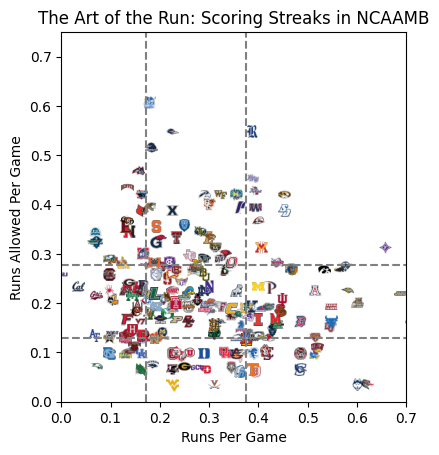

In [144]:
import matplotlib.pyplot as plt
import urllib
from PIL import Image
import io
# Create a figure and axes object
fig, ax = plt.subplots()

# Iterate through the points and plot each one with its respective image
for index, team in df_runs_sorted.iterrows():
    # Download the image using urllib
    with urllib.request.urlopen(team['logo'][0]) as url_response:
        img_data = url_response.read()

    # Open the image using Pillow
    img = Image.open(io.BytesIO(img_data))

    # Plot the image at the x,y coordinates
    ax.imshow(img, extent=((team['runs_per_game'])-.0125, (team['runs_per_game'])+.0125, (team['runs_against_per_game'])-.0125, (team['runs_against_per_game'])+.0125))

# Set the limits of the plot
ax.set_xlim(0, 0.7)
ax.set_ylim(0, 0.75)
ax.axvline(x=0.375000, color='gray', linestyle='--')
ax.axvline(x=0.170977, color='gray', linestyle='--')
ax.axhline(y=0.129032, color='gray', linestyle='--')
ax.axhline(y=0.277209, color='gray', linestyle='--')

# Show the plot

plt.xlabel('Runs Per Game')
plt.ylabel('Runs Allowed Per Game')
plt.title('The Art of the Run: Scoring Streaks in NCAAMB')
fig.savefig('2023_runs.png', dpi=300)
plt.show()


In [142]:
#descriptors
print(df_runs_sorted['runs_per_game'].quantile([0.25,.5,.75]))
print(df_runs_sorted['runs_against_per_game'].quantile([0.25,.5,.75]))

0.25    0.170977
0.50    0.258065
0.75    0.375000
Name: runs_per_game, dtype: float64
0.25    0.129032
0.50    0.203448
0.75    0.277209
Name: runs_against_per_game, dtype: float64
